In [103]:
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np
from PyPDF2 import PdfMerger
import csv
import lineid_plot
import matplotlib.patches as mpatches
# import pandas as pd

#smoothing function definition

def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

def map_DEG_to_RA(deg_list):
    RA_list=[]
    coord=0
    for i in range(0,len(deg_list)):
        hour= (deg_list[i]//1)*(1/15) #get the integer part of the float degree value and convert to hours. (1/15 hours per degree)
        minute= (hour-hour//1)*4.0 #decimal part of the degree float converted to minutes (4 minutes per degree)
        second= (minute-minute//1)*60 #decimal part of the minute coordinate, converted to seconds coordinate (60 sec per minute)
        coord=hour//1+(minute//1)/100+((second//1)//1)/10000
        RA_list.append(coord)
    return(RA_list)

def pickles_Plot(PName):
    with open('uvi_data.csv') as f:
        reader = csv.reader(f, delimiter=',')
        for row in reader:
    #         print(row)
            dat=fits.open(str(row[0]))
            if(str(row[0])==PName):

                #sort the names and spectral types using delimiter
                name=row[0][0:-5]
                SpecT=row[1]

                #Get the header info and curve data
                hdr = dat[0].header
                data=dat[1].data
                s1=[]

                wav=[]
                for i in range(540,1655):
                    s1.append(data[i][1])
                    wav.append(data[i][0])
#                     print(i,data[i][0])
#                 print(s1)

                s1max=max(s1)
                for i in range(0,len(s1)):
                    s1[i]=s1[i]/s1max


                plt.plot(wav, s1, label="Pickles type "+str(SpecT), linewidth=0.9, color="teal")
        #         break
    f.close()
    


In [20]:
print(map_DEG_to_RA([22.2565,23]))

[1.0151000000000001, 1.0207]


0
ZZ_GDB1.fits


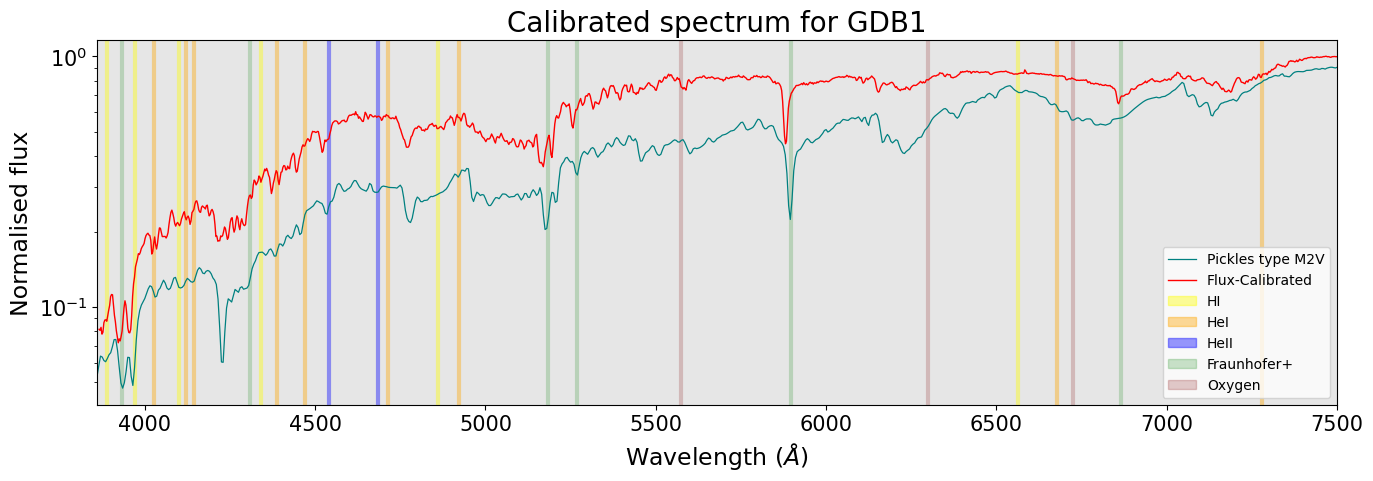

1
ZZ_GDB2.fits


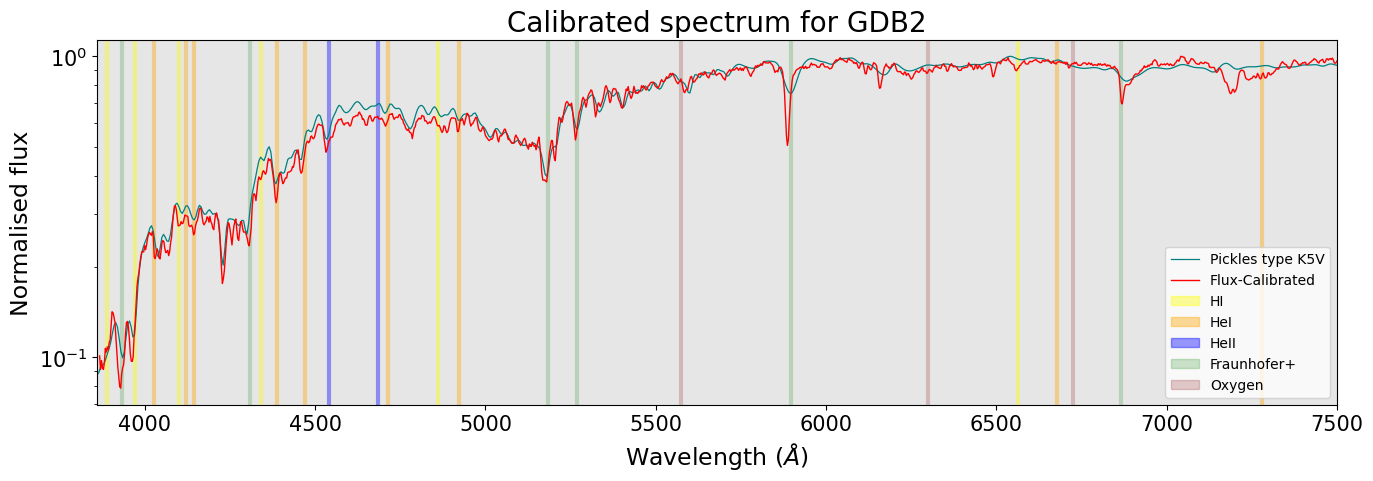

2
ZZ_GDB3.fits


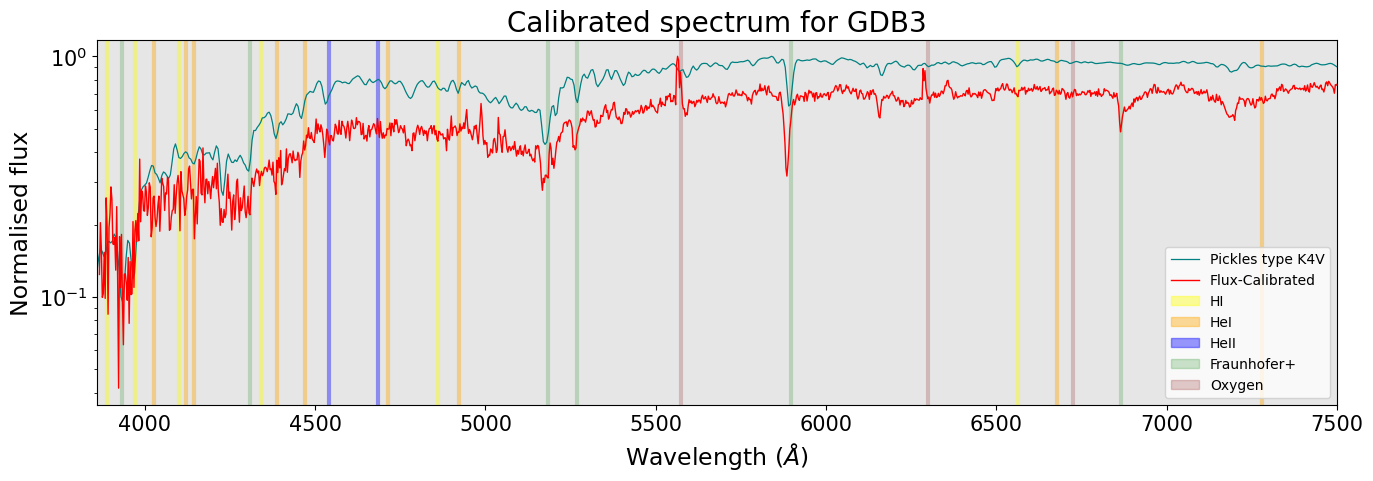

3
ZZ_GDB4.fits


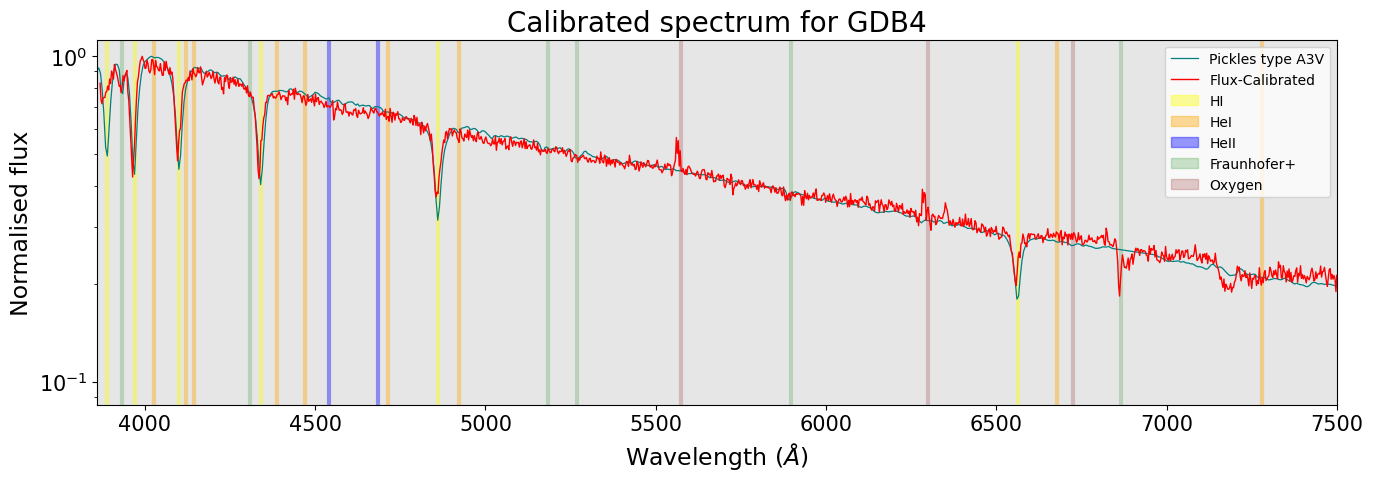

4
ZZ_GDB5.fits


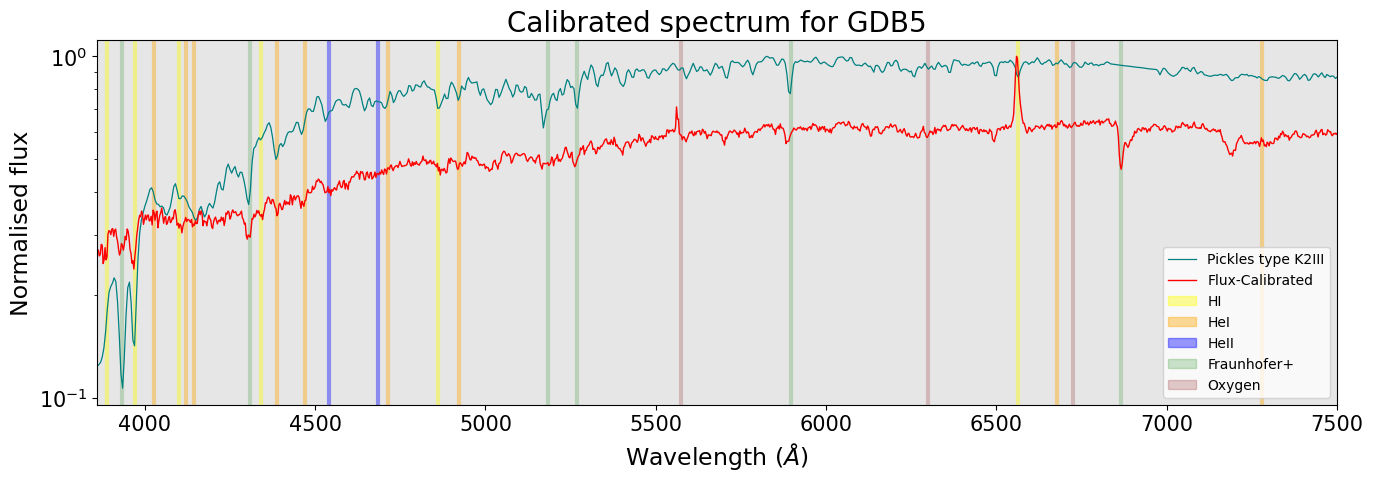

5
ZZ_GDB6.fits


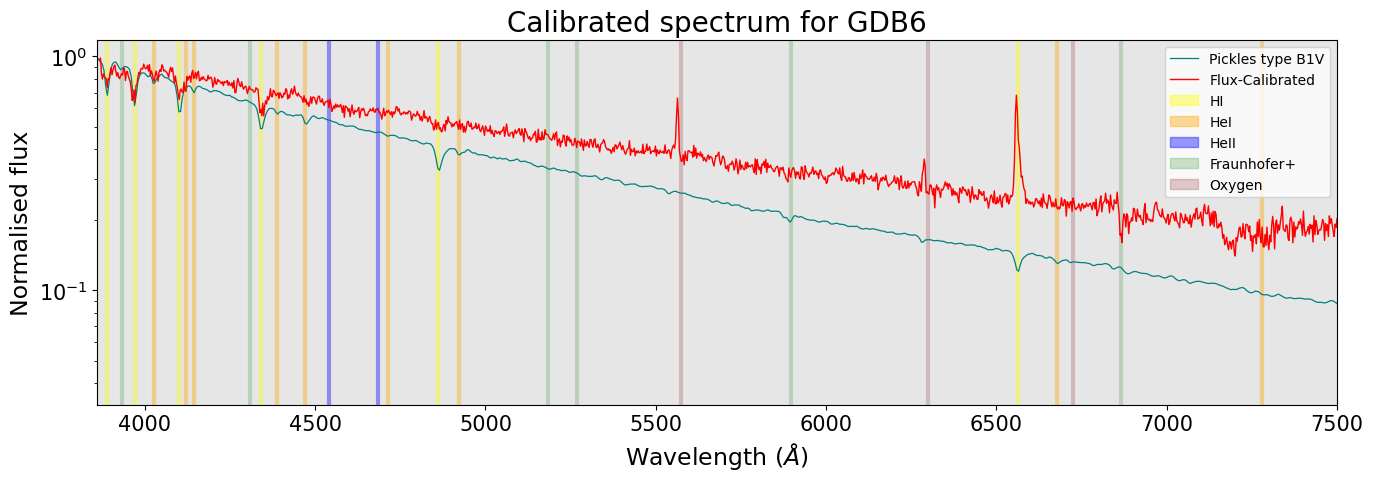

6
ZZ_GDB7.fits


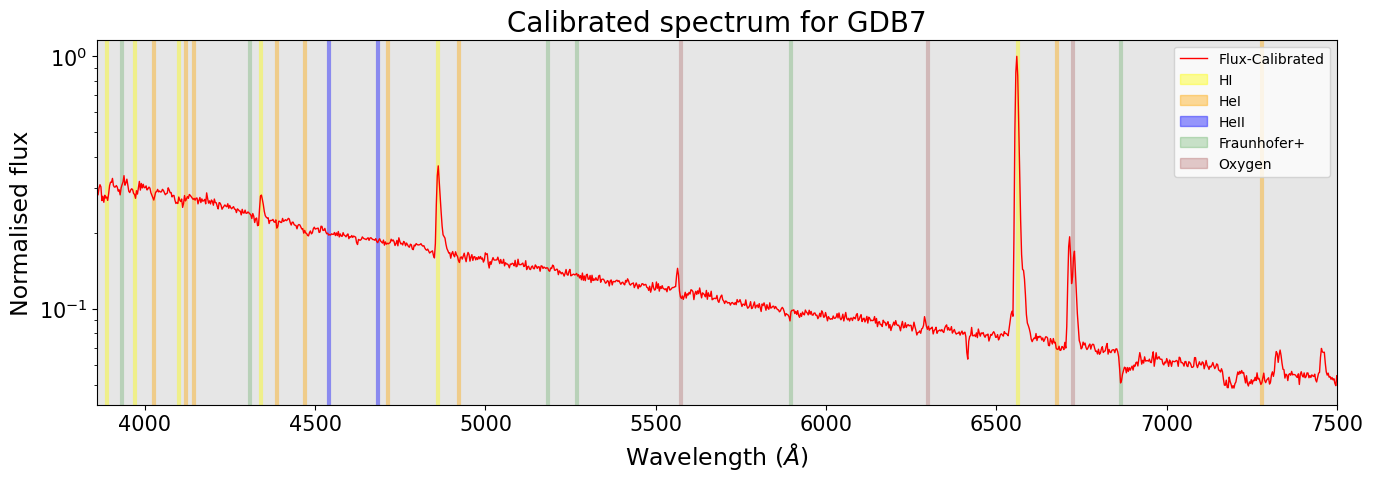

7
ZZ_GDB8.fits


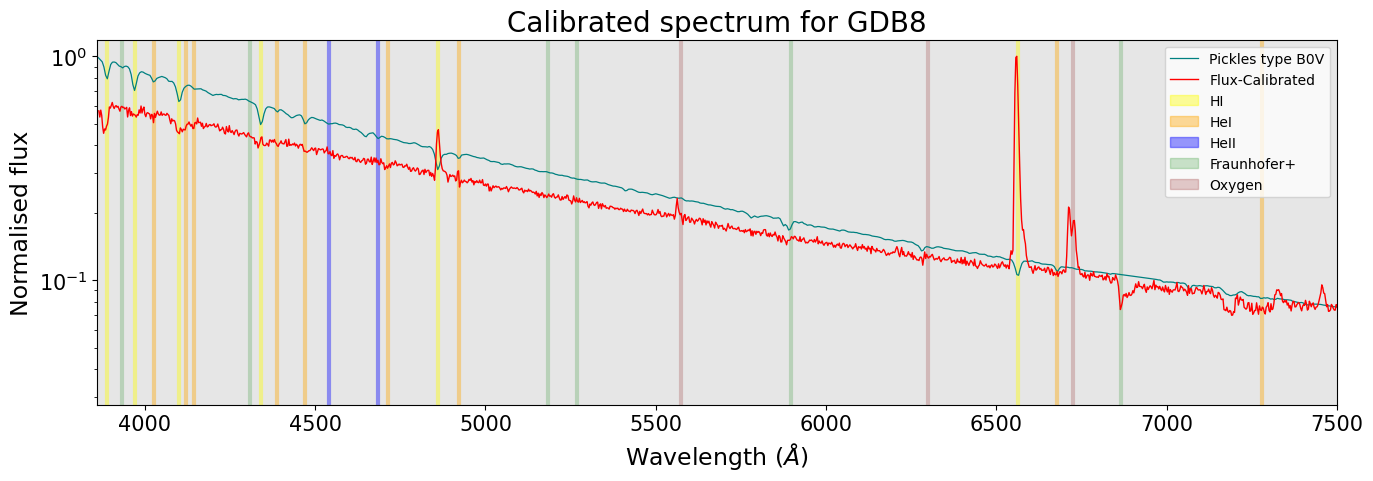

8
ZZ_GDB9.fits


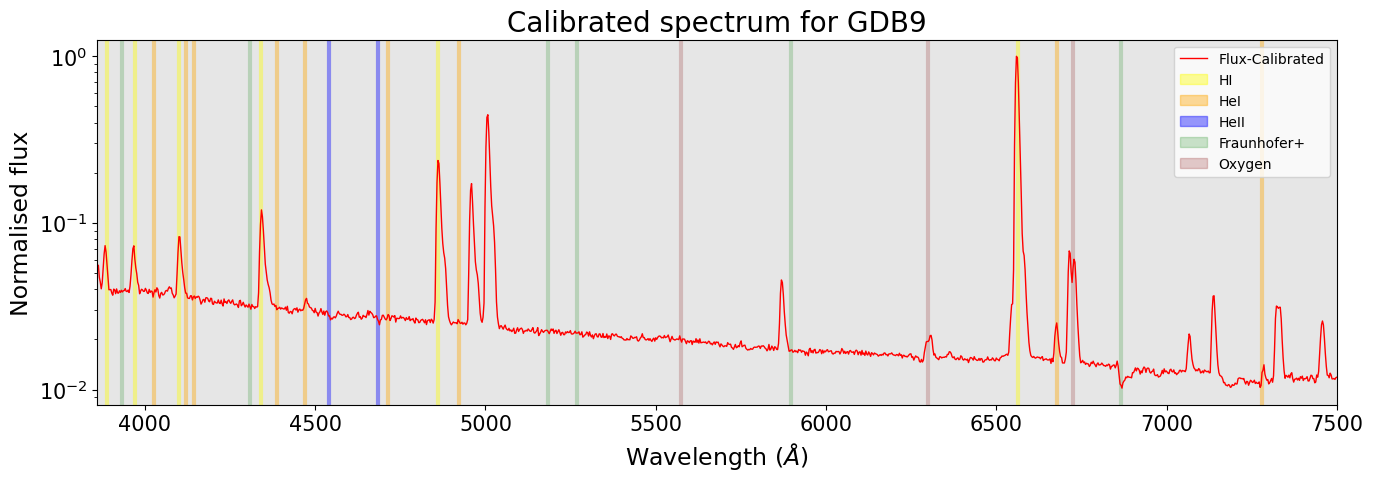

9
ZZ_GDB10.fits


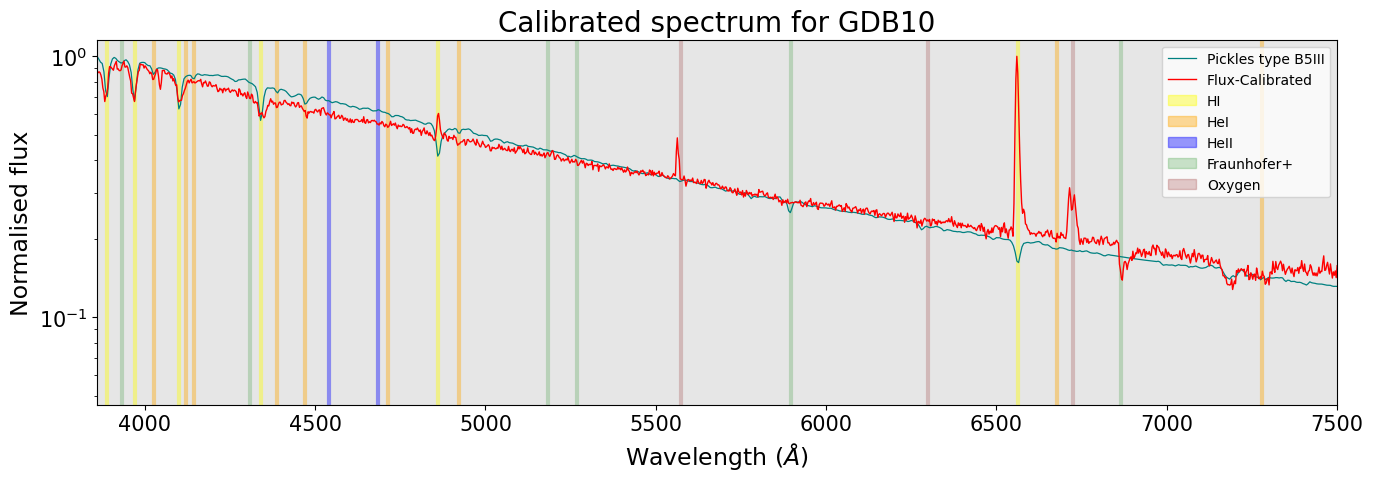

10
ZZ_GDB13.fits


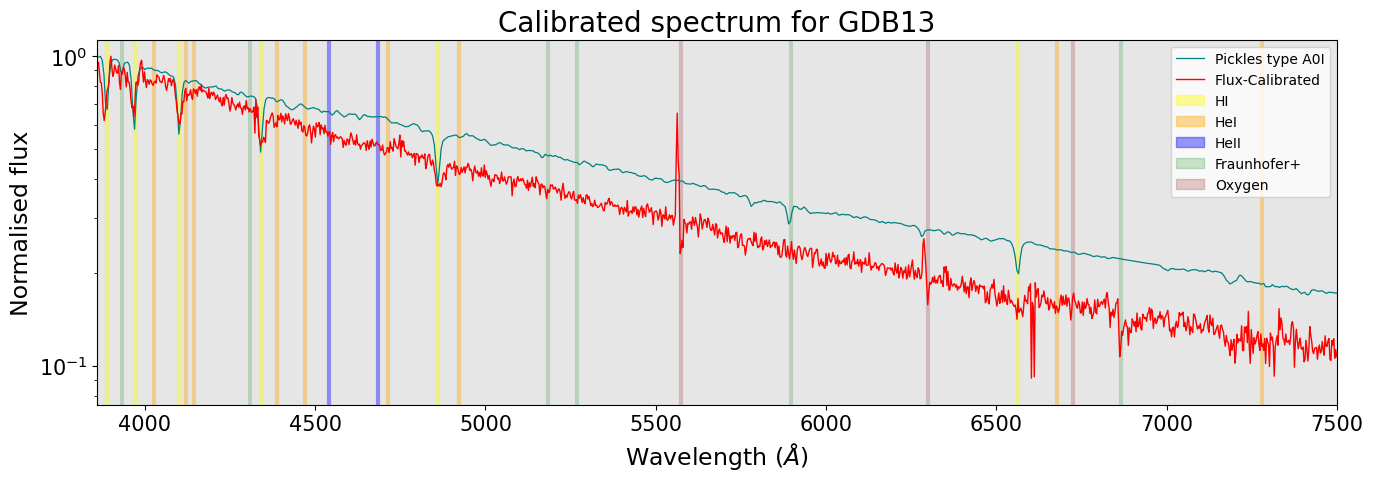

11
ZZ_GDB14.fits


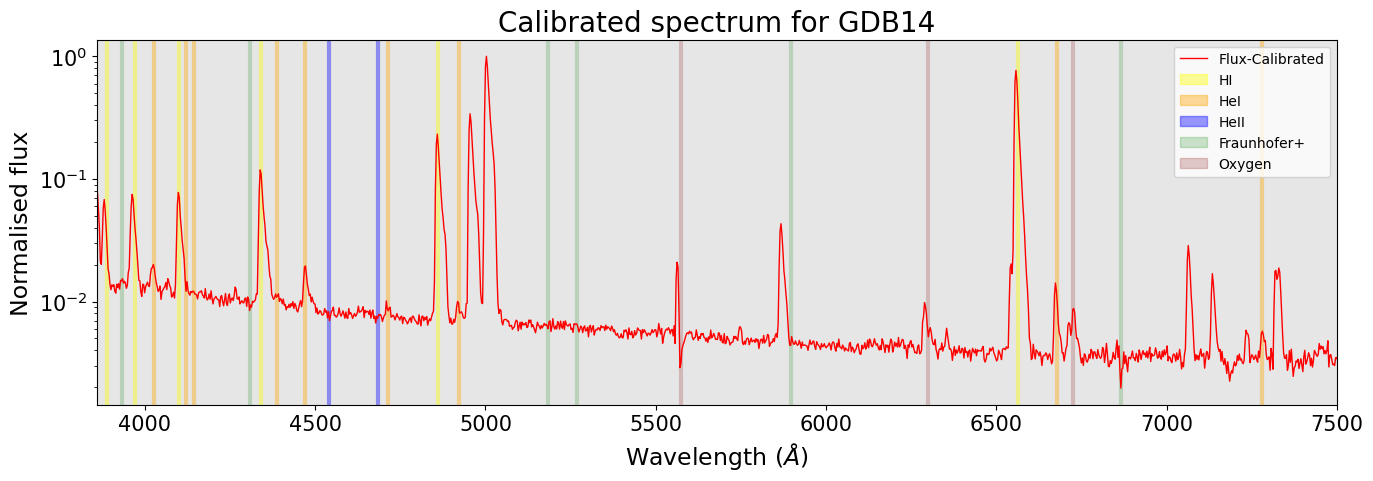

12
ZZ_GDB21.fits


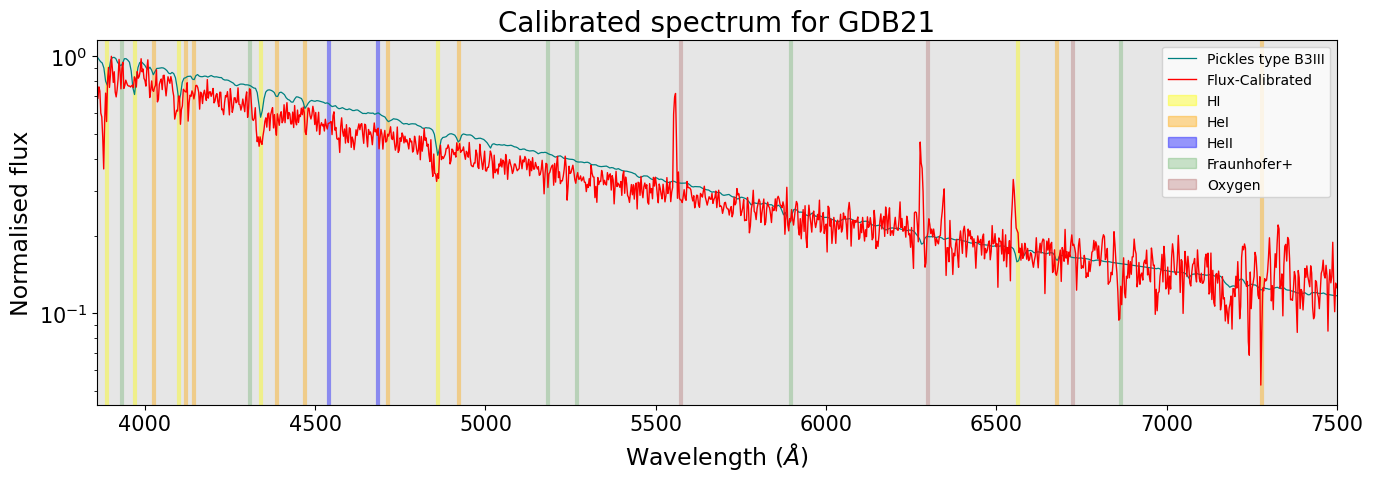

13
ZZ_GDB23.fits


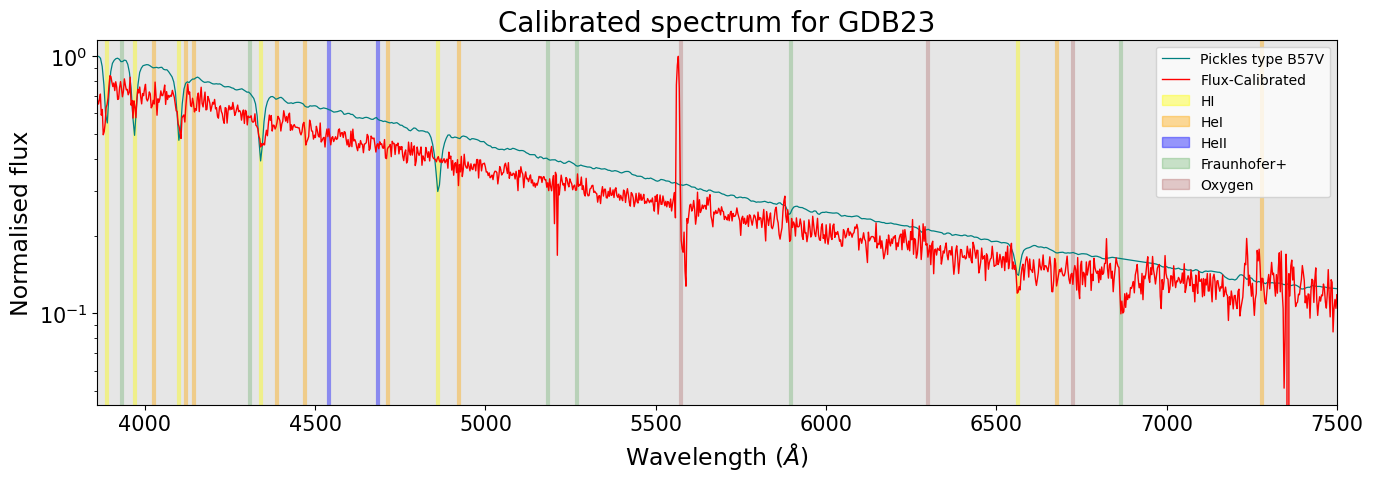

14
ZZ_GDB25.fits


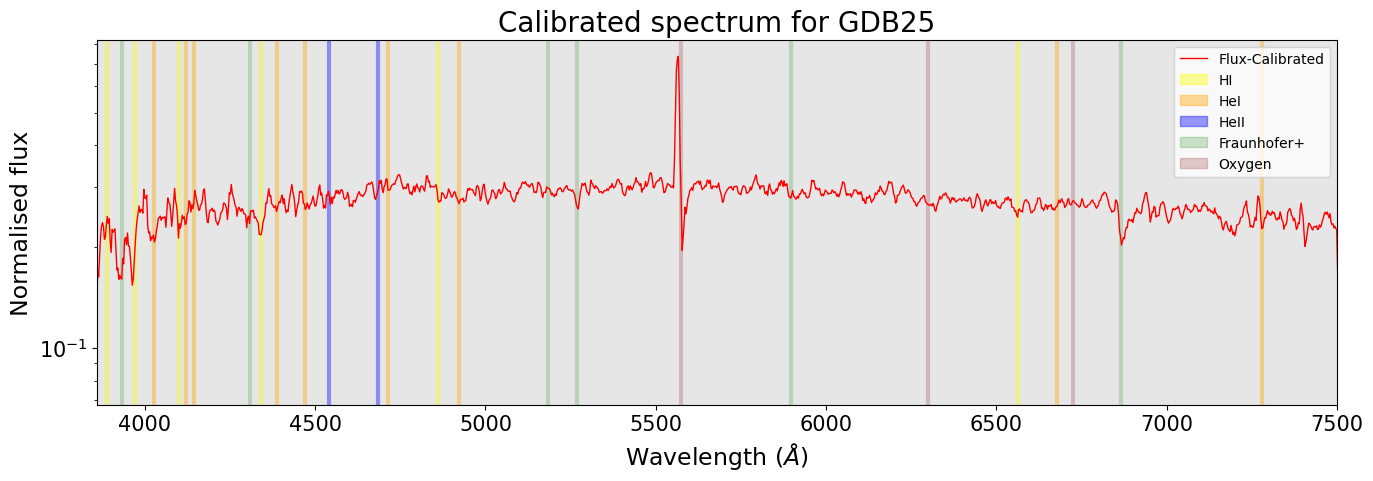

15
ZZ_GDB27.fits


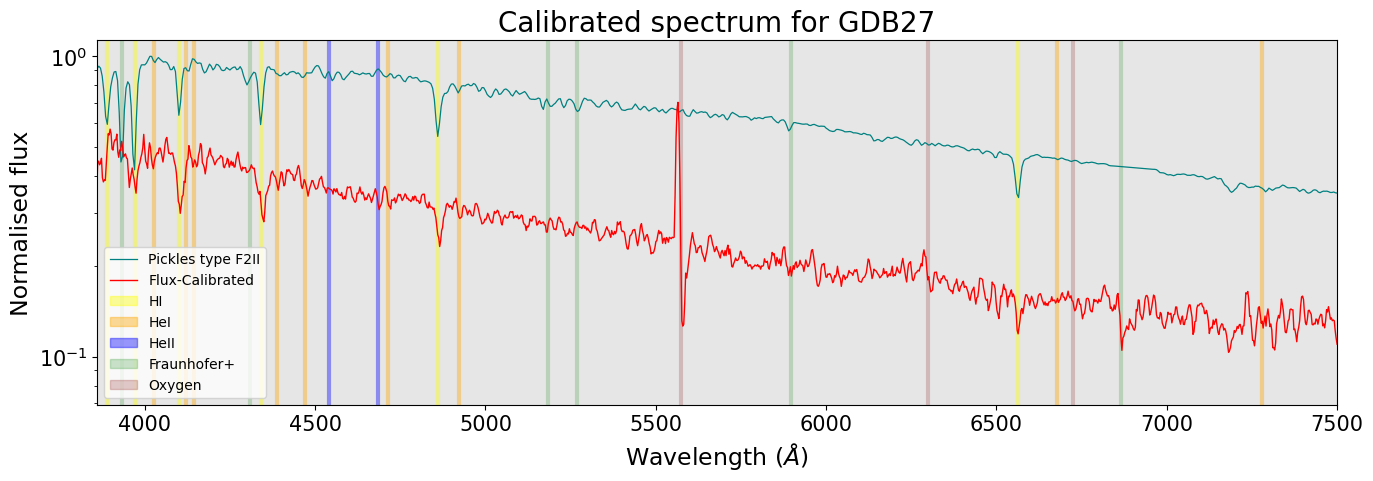

16
ZZ_GDB30.fits


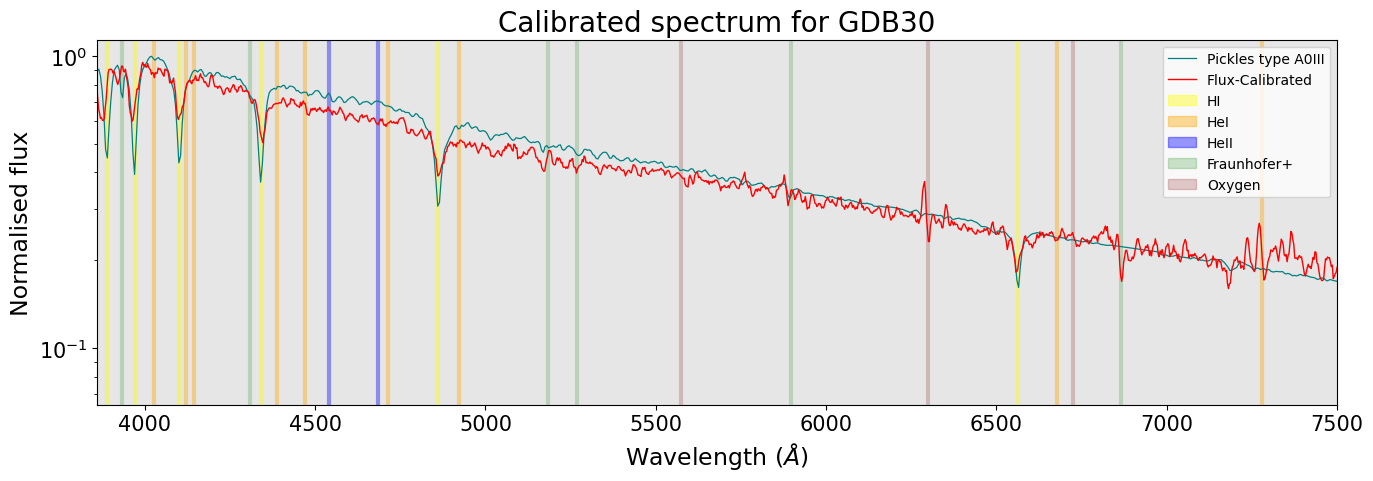

17
ZZ_GDB32.fits


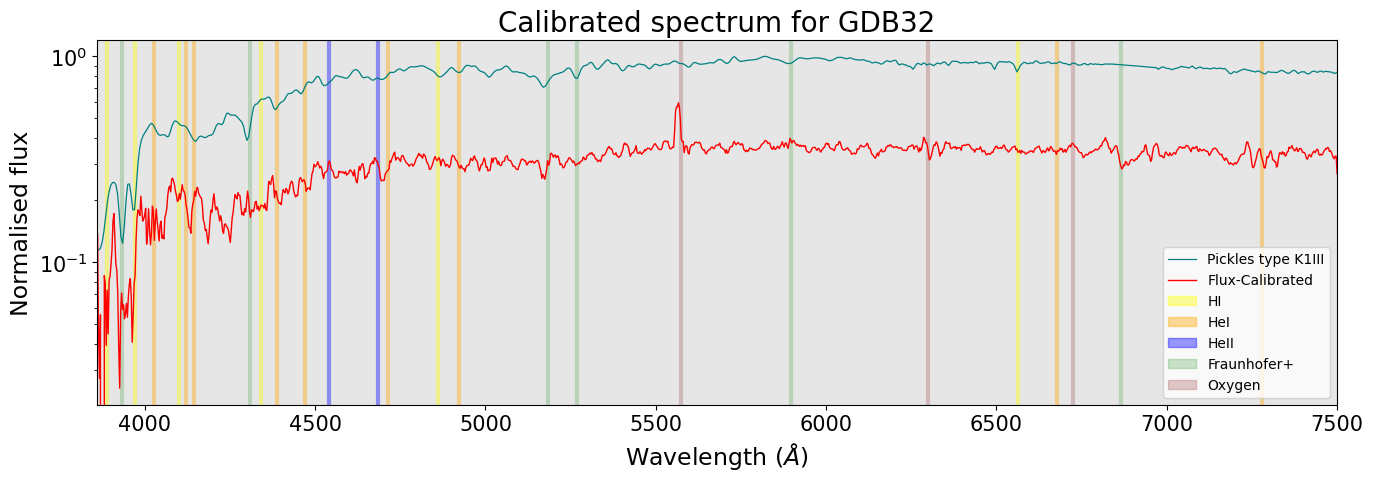

18
ZZ_GDB34.fits


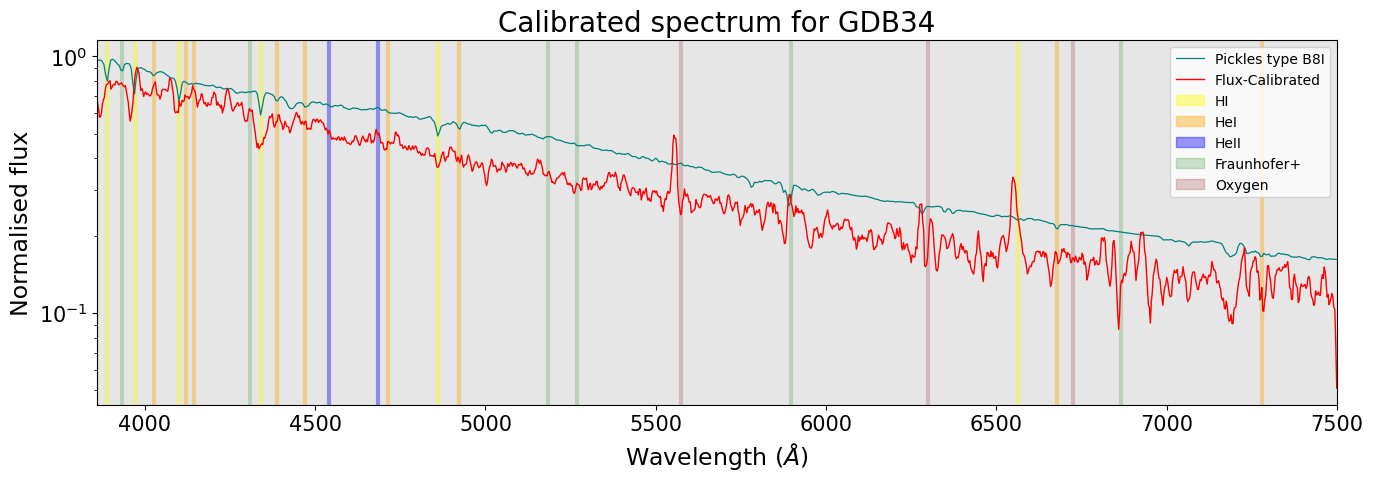

19
ZZ_GDB37.fits


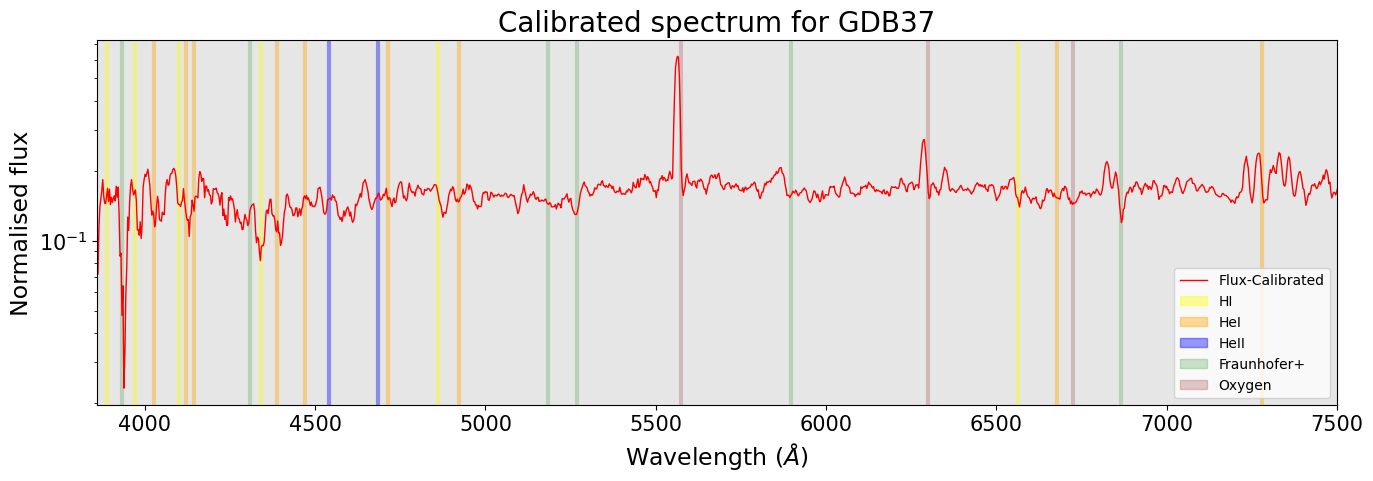

20
ZZ_GDB38.fits


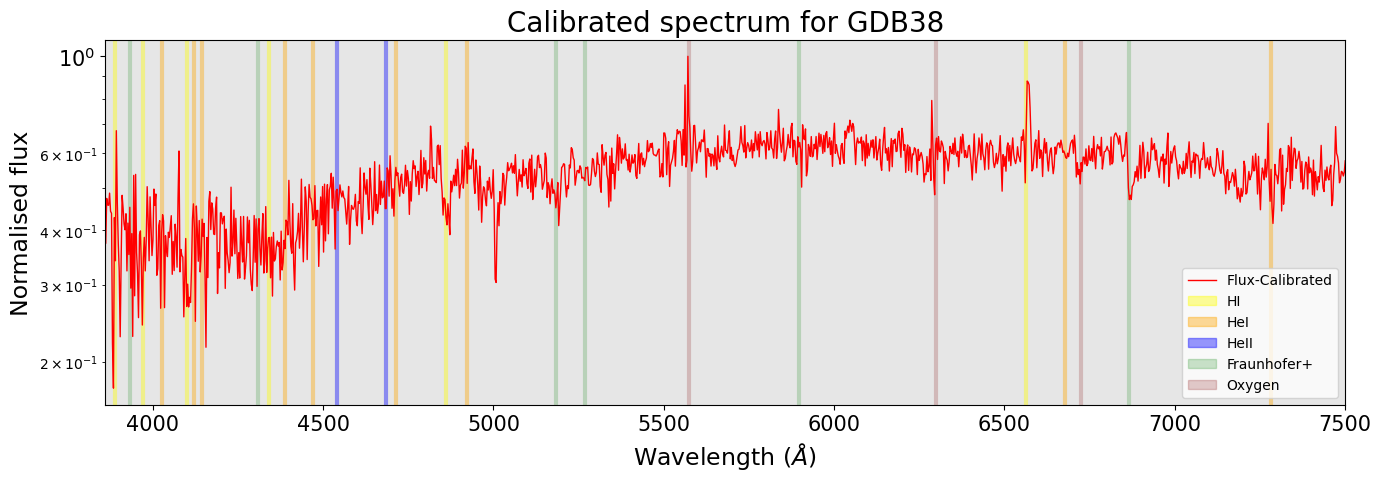

21
ZZ_GDB40.fits


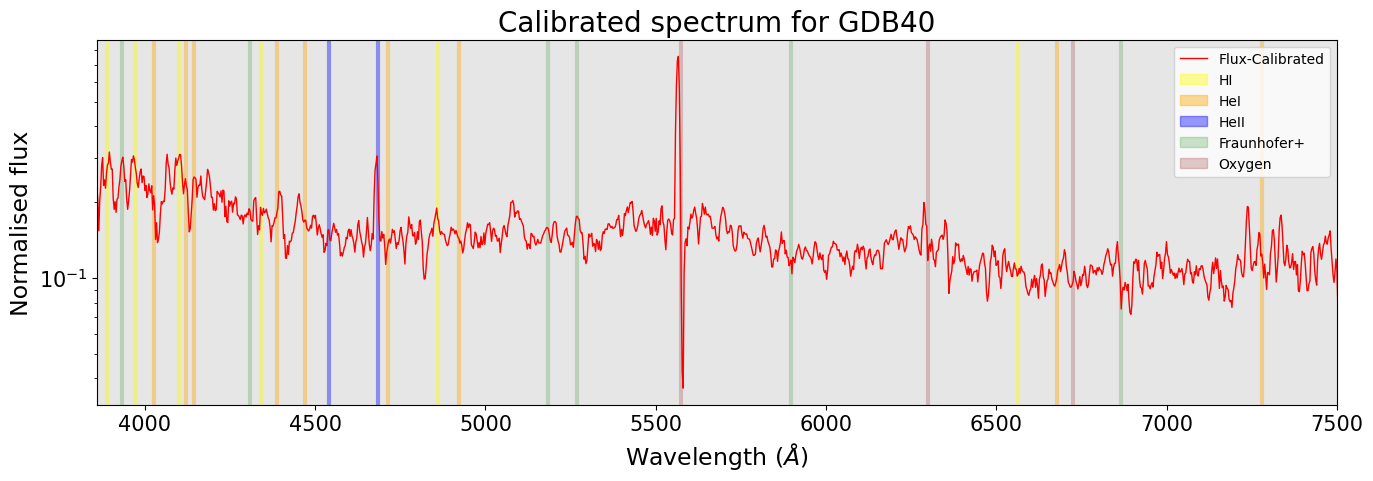

22
ZZ_GDB41.fits


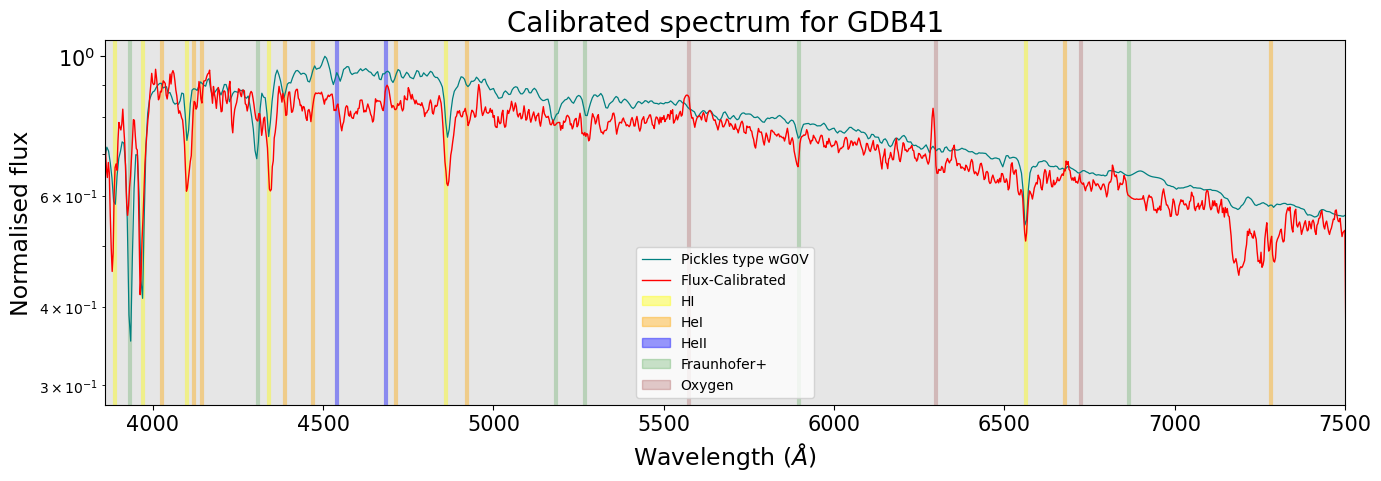

23
ZZ_LTT1020_21112023.fits


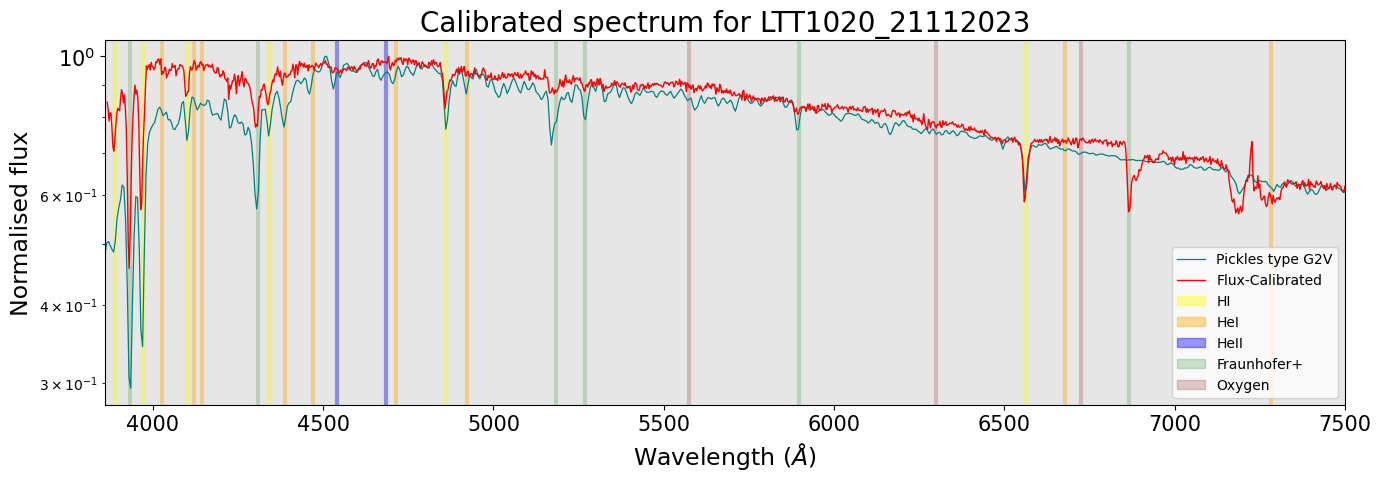

merges happened



In [41]:


#Get the pdf merger ready for later
merger = PdfMerger()
Merge_files=[]

# Load data from CSV for the line locations to identify HI, HeI and HeII with
f_lines=open("Be_line_list(copy).txt", "r")

Be_name= []
Be_line= []
Be_color= []
count=0
for line in f_lines:
    row_data = line.strip("\n").split(',')
    Be_name.append(row_data[0])
    Be_line.append(float(row_data[1]))
    Be_color.append(row_data[2])
# print(Be_name,Be_line)
f_lines.close()

# Load data from CSV for the Fraunhofer lines
f_lines=open("Be_Fraunhofer_line_list.txt", "r")

FH_name= []
FH_line= []
FH_color= []
count=0
for line in f_lines:
    row_data = line.strip("\n").split(',')
    FH_name.append(row_data[0])
    FH_line.append(float(row_data[1]))
    FH_color.append(row_data[2])
# print(FH_name,FH_line)
f_lines.close()

f = open("all.csv", "r")
f_c = open("My_cal_files.csv", "r")
f_a = open("Arc_compare.csv", "r")

# Instansiate lists for file names of unclaibrated (files) and calibrated (files_cali) files.
files=[]
files_cali=[]
files_arc=[]

# Read first line for files and populate list
line=f.readline()
# print(f.readline())
while line!='':
    files.append(line[0:-1])
    line=f.readline()
#     print(line)
f.close()

# Read first line for files_cali and populate list
line=f_c.readline()
Smooth_Fac=[]
pickles_Match=[]
pickles_Type=[]
label_Y=[]
while line!='':
    row_data = line.strip("\n").split(',')
    
    files_cali.append(row_data[0])
    Smooth_Fac.append(row_data[1])
    pickles_Match.append(row_data[2])
    pickles_Type.append(row_data[3])
    label_Y.append(row_data[4])
    line=f_c.readline()
#     print(line)
f_c.close()

line=f_a.readline()
# print(f_a.readline())
while line!='':
    files_arc.append(line[0:-1])
    line=f_a.readline()
#     print(line)
f_a.close()

###########This is for the arc comparison with arcs that have been wavelength calibrated by 20231121/a5231077,
# comment out if not needed.##################

# plt.figure(figsize=(16, 9))
# plt.title("arc spectra comparison")
# plt.xlim(7600,7800)
# plt.xlabel("Wavelength (Angstroms)")
# plt.ylabel("Counts (unclalibrated)")
# plt.axvline(x = 7635.106, color = 'black', label = 'correct position of 7635 angstrom line', linewidth=0.8)
# plt.axvline(x = 7503.8691, color = 'black', label = 'correct position of 7503 angstrom line', linewidth=0.8)
# plt.axvline(x = 7724.2072, color = 'black', label = 'correct position of 7724 angstrom line', linewidth=0.8)
# for i in range(0,len(files_arc)): 
#     print(i)
#     col="blue"
#     labeln="21st late"
#     if i==0:
#         col="orange"
#         labeln="16th early"
#     if i==1:
#         col="red"
#         labeln="21st early"
#     #get the spectrum data from fits file from list of fits files
#     dat_arc=fits.open(str(files_arc[i]))
#     name=files_arc[i]
#     print(name)
    
#     hdr = dat_arc[0].header
# #     print(hdr)
#     data=dat_arc[0].data
#     s1=data[0,0]
    
    
#     # calculate the wavelength axis:
#     crval1 = hdr['CRVAL1']
# #     print(crval1)
#     cd11 = hdr['CD1_1']
# #     print(cd11)
#     wav = crval1 +np.arange(len(s1))*cd11
# #     print(max(wav))
    
#     plt.plot(wav, s1, label=labeln, linewidth=0.8, color=col)
    
#     plt.legend(loc='best')
    
# plt.show()

#################This is for the spectra to pdf generation ###################

for i in range(0,len(files)):
    print(i)
    #get the spectrum data from fits file from list of fits files
    dat=fits.open(str(files[i]))
    dat_cal=fits.open(str(files_cali[i]))
    name=files[i]
    print(name)
    
    hdr = dat[0].header
    hdr_cal=dat_cal[0].header
    
    data=dat[0].data
    data_cal=dat_cal[0].data
    
    s1=data[0,0][2:1301]
    n_s1=s1/max(s1)
    s1_cal=data_cal[0,0][2:1301]
    n_s1_cal=s1_cal/max(s1_cal)
    
    
    # calculate the wavelength axis:
    crval1 = hdr['CRVAL1']
#     print(crval1)
    cd11 = hdr['CD1_1']
#     print(cd11)
    wav = crval1 +np.arange(len(s1))*cd11
#     print(max(wav))
    
    crval1 = hdr_cal['CRVAL1']
    cd11 = hdr_cal['CD1_1']
    wav_cal = crval1 +np.arange(len(s1_cal))*cd11
#     for l in range(0,len(wav_cal)):
#         print(l,wav_cal[l])
#     break
    
#     ak = lineid_plot.initial_annotate_kwargs()
#     ak
#     {'arrowprops': {'arrowstyle': '-', 'relpos': (0.5, 0.0)},
#     'horizontalalignment': 'center',
#     'rotation': 90,
#     'textcoords': 'data',
#     'verticalalignment': 'center',
#     'xycoords': 'data'}
#     ak['arrowprops']['arrowstyle'] = "-"

#     pk = lineid_plot.initial_plot_kwargs()
#     pk
#     {'color': 'k', 'linestyle': '--'}
#     pk['color'] = "black"
    
    
    
    
    fig=plt.figure(figsize=(16, 5)) #create the figure


    ax = fig.add_subplot(1, 1, 1) #this is for background color formating
    ax.set_facecolor((0.90, 0.90, 0.90))
    
    #Code borrowed from Lara to plot nice annotiations for lines
#     lineid_plot.plot_line_ids(wav_cal, smooth(n_s1_cal,int(Smooth_Fac[i])), Be_line, Be_name, color='black', annotate_kwargs=ak, plot_kwargs=pk)
    
    
    plt.xlim(left=3860,right=7500) #Set x axis limits, max to 7500 if wish is to cut off section with no identifyable lines
    plt.yticks(fontsize=15)
    plt.xticks(fontsize=15)
    #plot the lines for ID Hydrogen and Helium lines
    handles, labels = plt.gca().get_legend_handles_labels()
    
    for j in range(0,len(Be_line)):

        plt.axvline(x = Be_line[j], color = Be_color[j], linewidth=3, alpha=0.4)
#         plt.annotate(Be_name[j], (Be_line[j], float(label_Y[i])), rotation="vertical", fontsize=7,weight='bold')
    

    #plot the lines for ID Fraunhofer lines

    for j in range(0,len(FH_line)):

        plt.axvline(x = FH_line[j], color = FH_color[j], linewidth=3, alpha=0.2)
#         plt.annotate(FH_name[j], (FH_line[j], float(label_Y[i])), rotation="vertical", fontsize=7,weight='bold')
    #Plot the pickles spectrum if matched to one:
    if(pickles_Match[i]!=''):
        Pickles_Plot=pickles_Plot(pickles_Match[i])
    
    #Plot the calibrated spectra
    plt.plot(wav_cal[4:1298], smooth(n_s1_cal[4:1298],int(Smooth_Fac[i])), label='Flux-Calibrated', linewidth=1, color='red')
    handles, labels = plt.gca().get_legend_handles_labels()
    plt.xlabel('Wavelength ($\AA$)', fontsize=17)
    plt.ylabel('Normalised flux', fontsize=17)
    

    HydrogenI_patch = mpatches.Patch(color='yellow',alpha=0.4, label='HI')
    HeliumI_patch = mpatches.Patch(color='orange',alpha=0.4, label='HeI')
    HeliumII_patch = mpatches.Patch(color='blue',alpha=0.4, label='HeII')
    Fraunhofer_patch = mpatches.Patch(color='green',alpha=0.2, label='Fraunhofer+')
    FeO_patch = mpatches.Patch(color='maroon',alpha=0.2, label='Oxygen')
    
    handles.extend([HydrogenI_patch, HeliumI_patch, HeliumII_patch, Fraunhofer_patch, FeO_patch])
    labels.extend([HydrogenI_patch, HeliumI_patch, HeliumII_patch, Fraunhofer_patch, FeO_patch])
    
#     print(handles)
#     print(labels)
    plt.legend(handles=handles,loc='best')
    plt.subplots_adjust(bottom=0.15) #Because the plt.savefig crops the bottom for some reason.

#     plt.legend(handles=[Hydrogen_patch, Helium_patch,Fraunhofer_patch],loc='best')
    plt.yscale("log") #set y scale to log to correctly display the spectra
#     plt.suptitle("Calibrated spectra for "+str(name[3:-5]), size=20, y=0.955)
    plt.title("Calibrated spectrum for "+str(name[3:-5]), size=20)
#     plt.title("Calibrated spectra for "+str(name[3:-5]))
    
    Merge_files.append("./spectra_pdfs/"+str(name[3:-5])+'.pdf')
    
    plt.savefig(r"./spectra_pdfs/"+str(name[3:-5])+'.pdf', dpi=1600, orientation='landscape')
    plt.show()
    plt.close()
    
#     break


# now merge all pdfs into one pdf for conveniece
for pdf in Merge_files:
    merger.append(pdf)
merger.write("./spectra_pdfs/"+'All_Spectra.pdf')
merger.close()
print("merges happened")

#     plt.plot(wav,s1,'k-',alpha=0.5)
    
#     break

print()

0
ZZ_GDB1.fits
3854.69140625
2.81012177467346
9418.732520103451


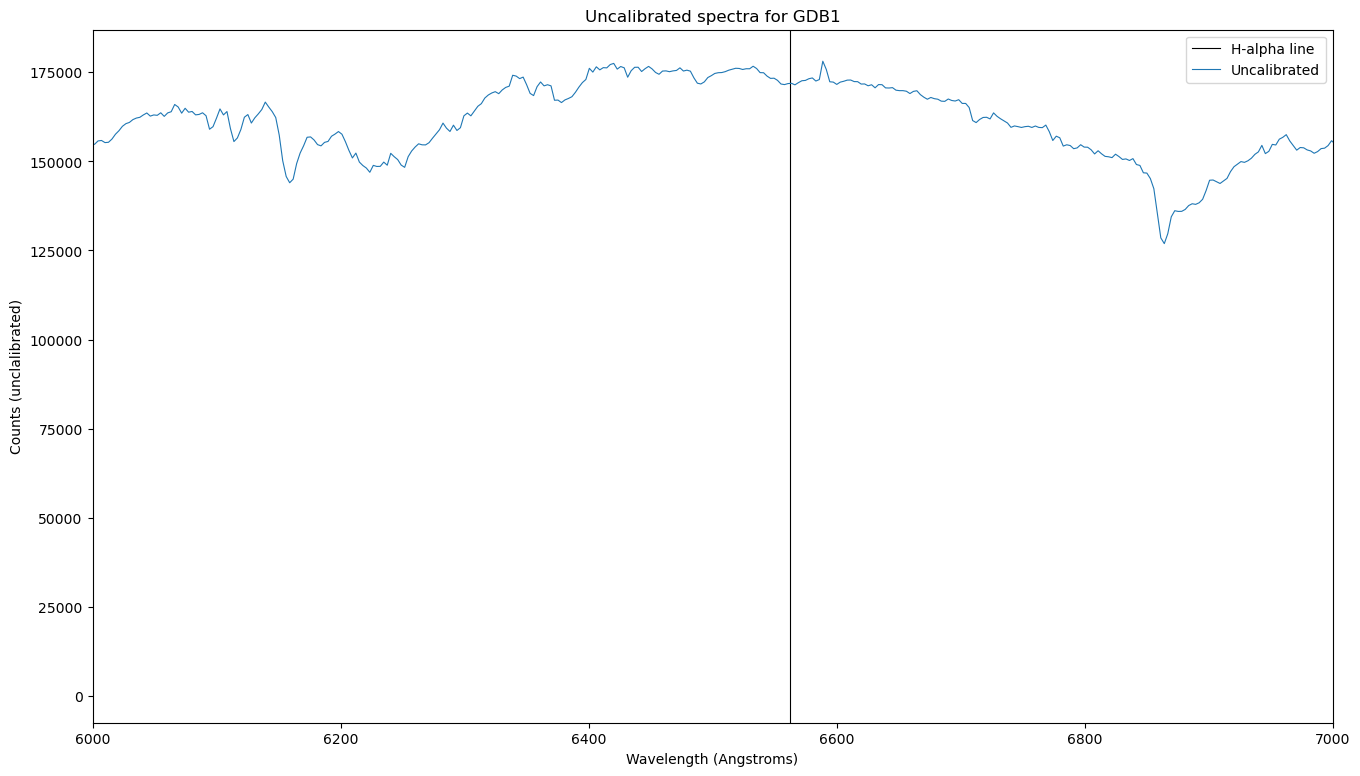

1
ZZ_GDB2.fits
3856.0748205185
2.81603145599365
9431.817103385927


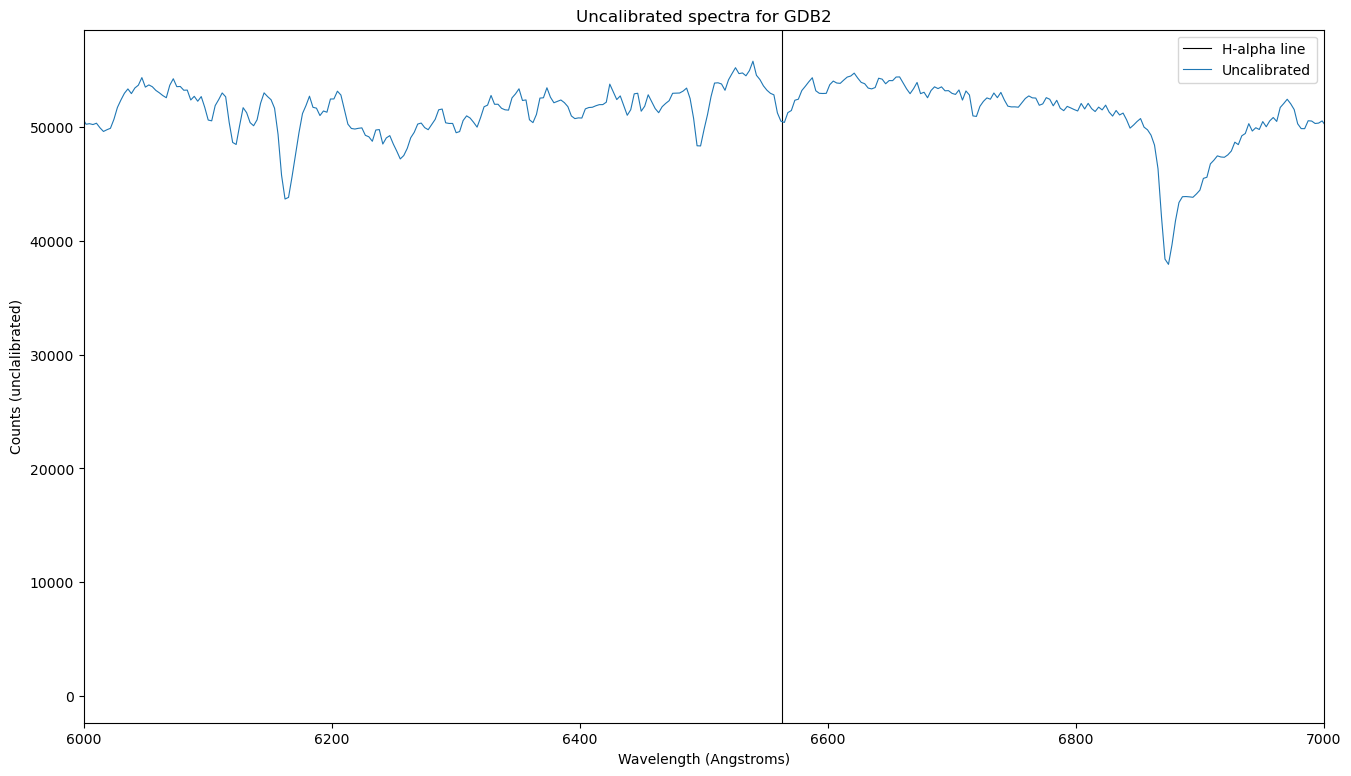

2
ZZ_GDB3.fits
3855.60218667984
2.81458902359009
9428.488453388218


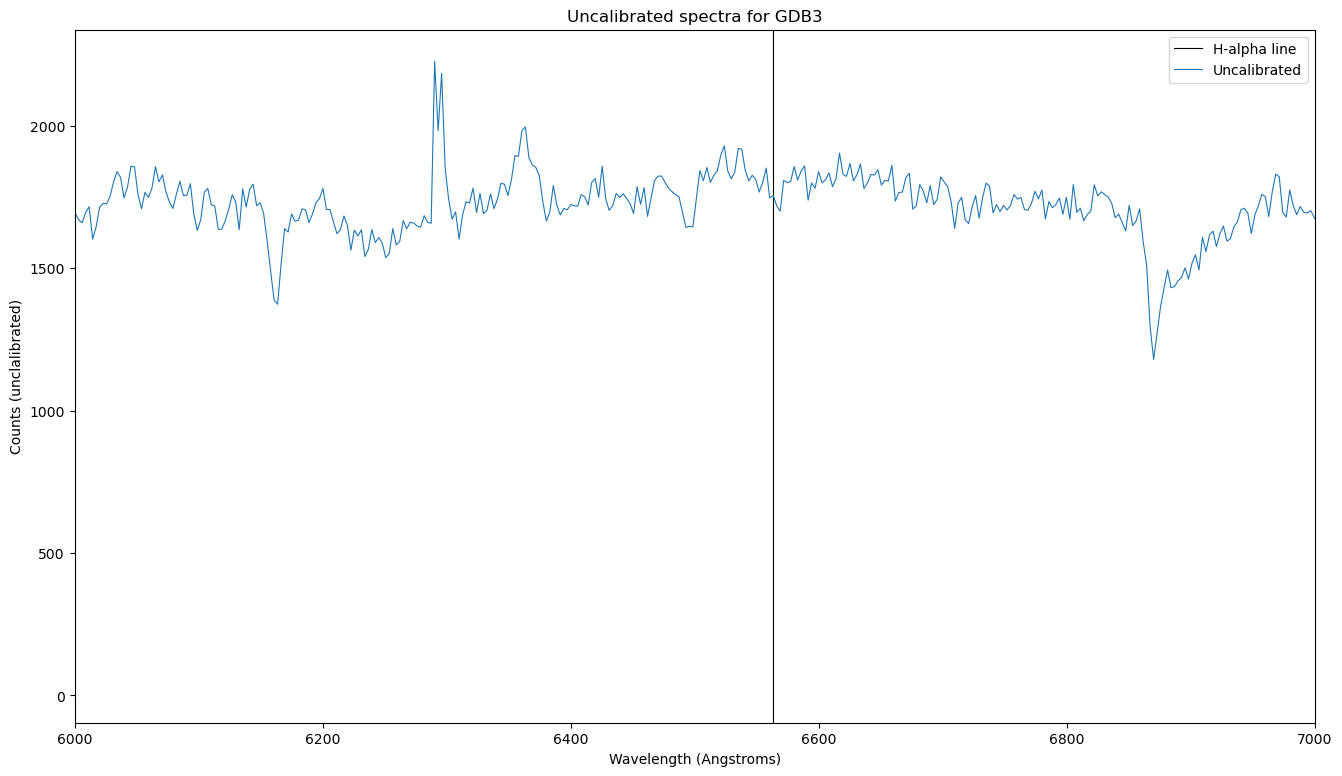

3
ZZ_GDB4.fits
3857.50152802468
2.81012177467346
9421.542641878132


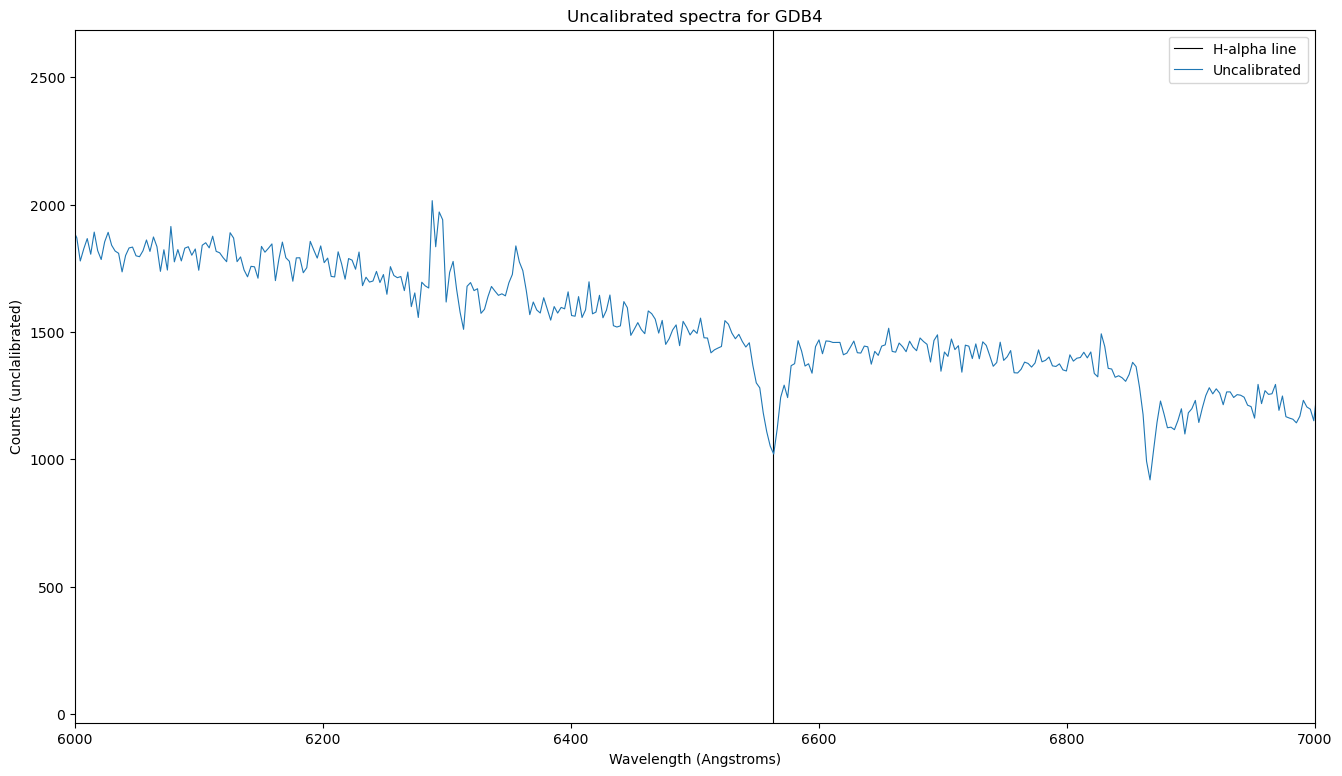

4
ZZ_GDB5.fits
3849.6047179699
2.81931757926941
9431.853524923332


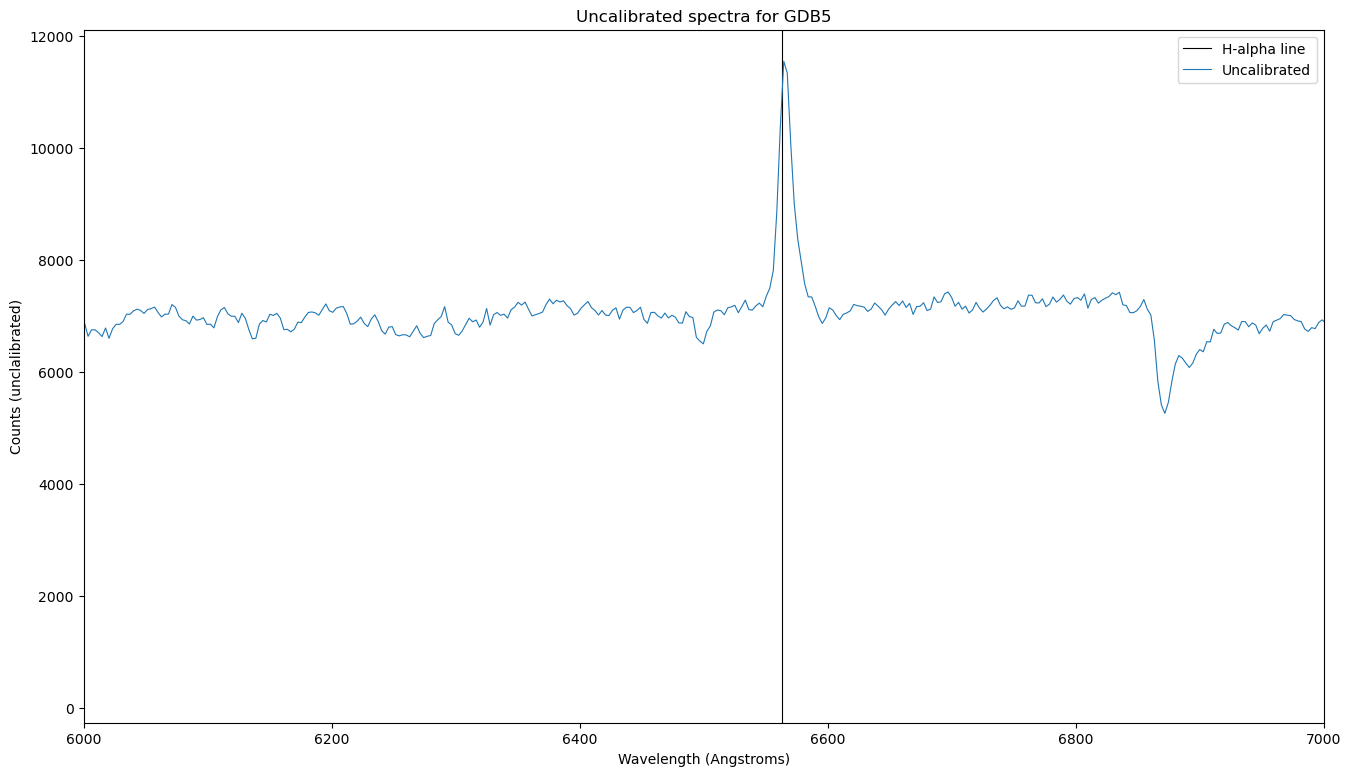

5
ZZ_GDB6.fits
3855.89924550057
2.81819081306458
9435.917055368438


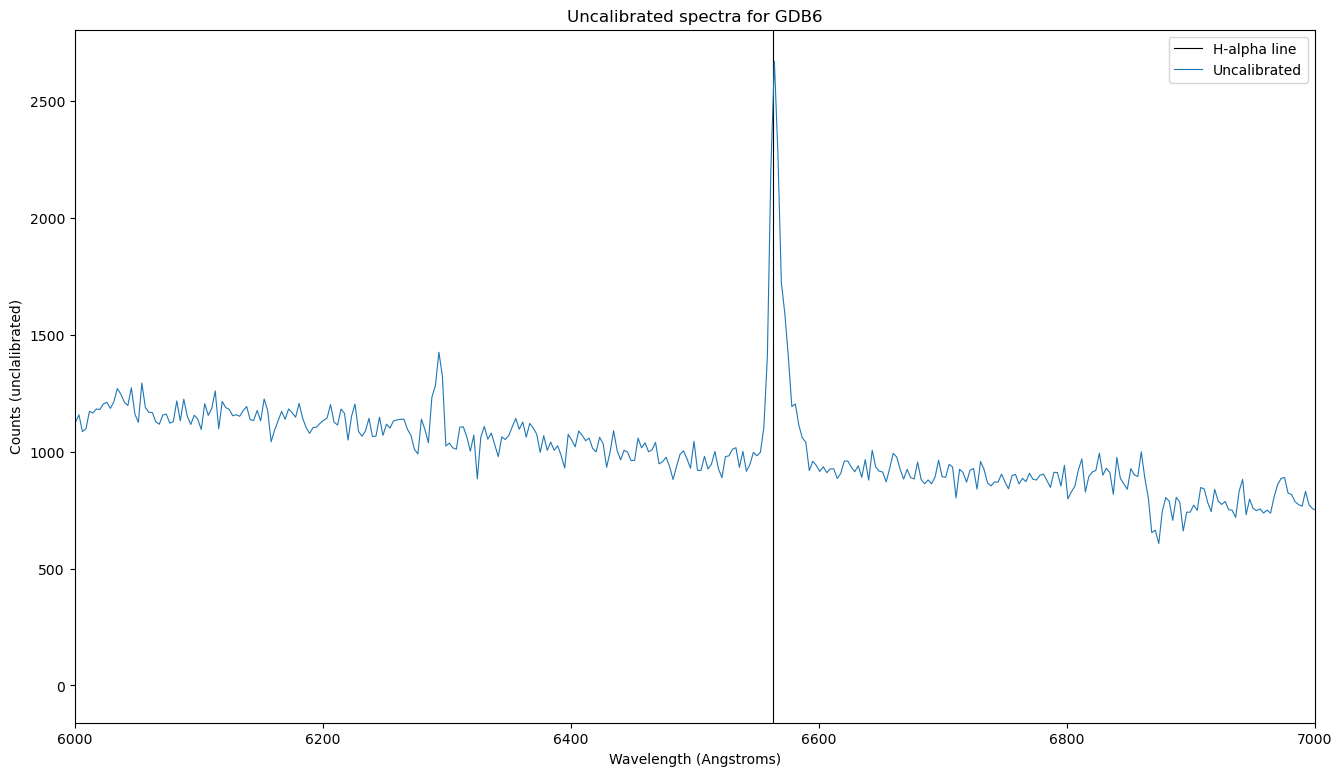

6
ZZ_GDB7.fits
3845.8743057251
2.82108306884766
9431.618782043466


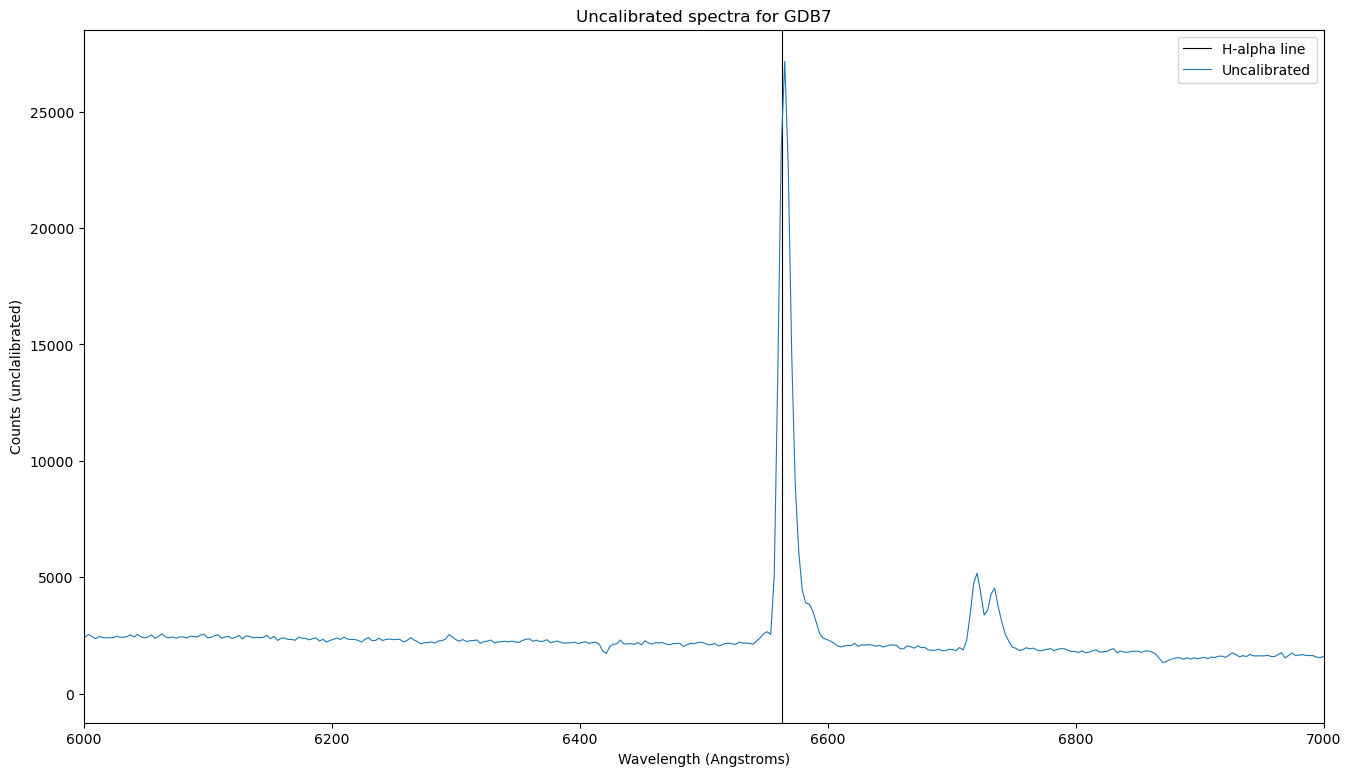

7
ZZ_GDB8.fits
3853.85526227951
2.8157114982605
9428.9640288353


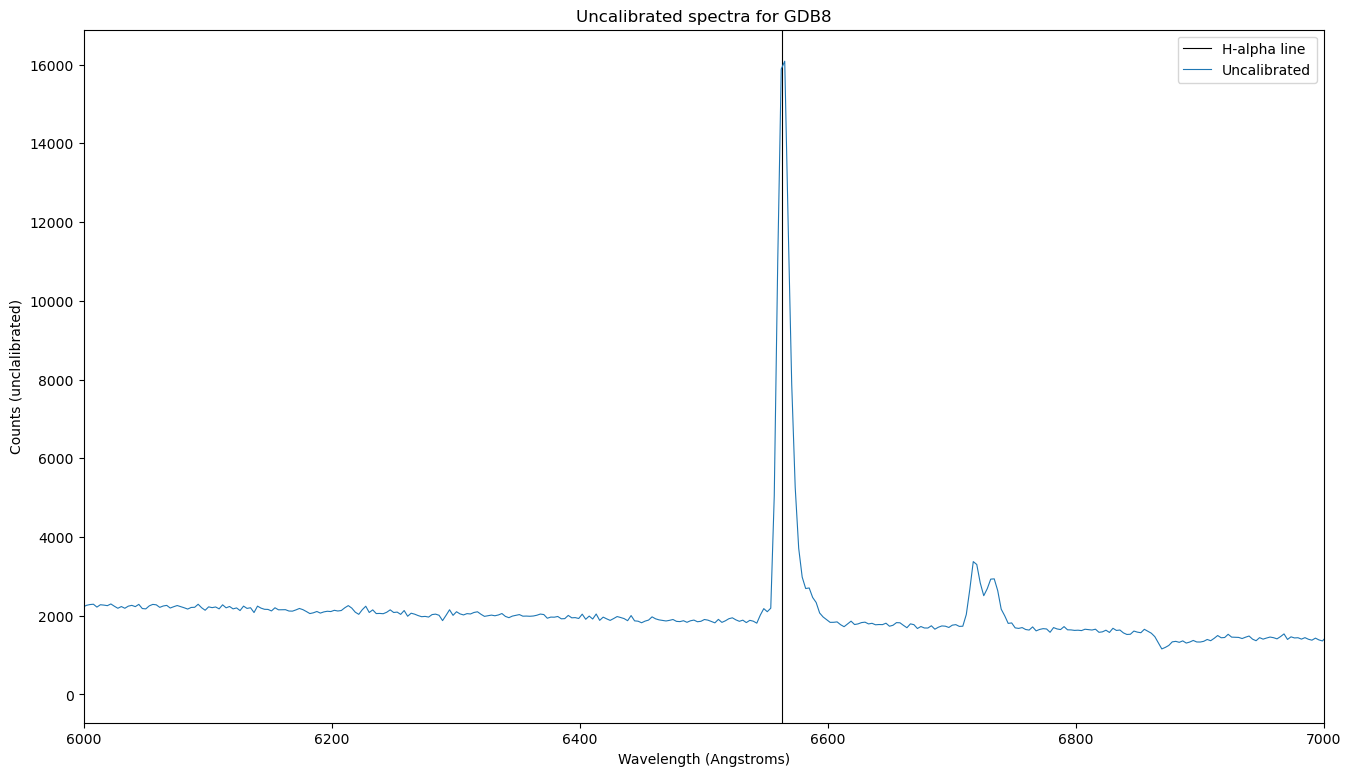

8
ZZ_GDB9.fits
3852.48501515389
2.81606984138489
9428.303301095972


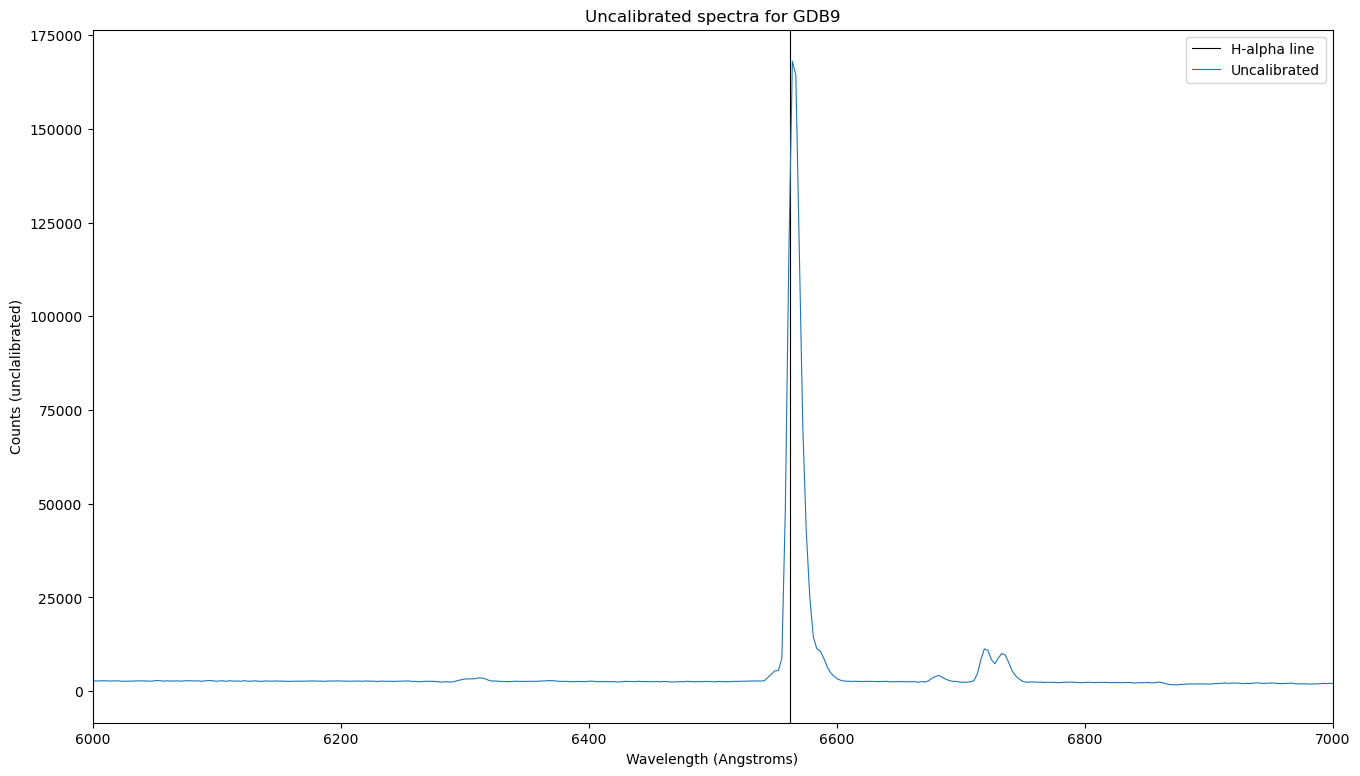

9
ZZ_GDB10.fits
3851.56091117859
2.81530570983887
9425.866216659553


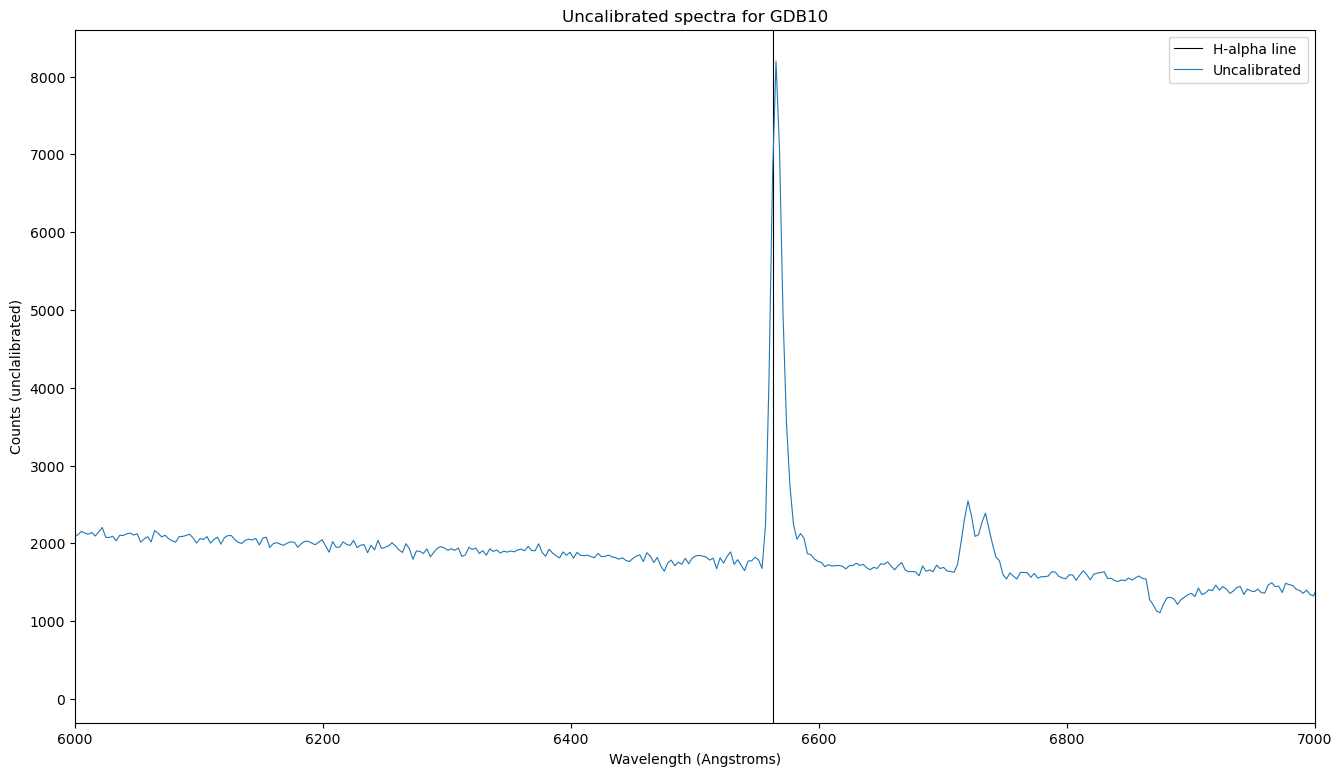

10
ZZ_GDB13.fits
3852.66263079644
2.8176600933075
9431.629615545291


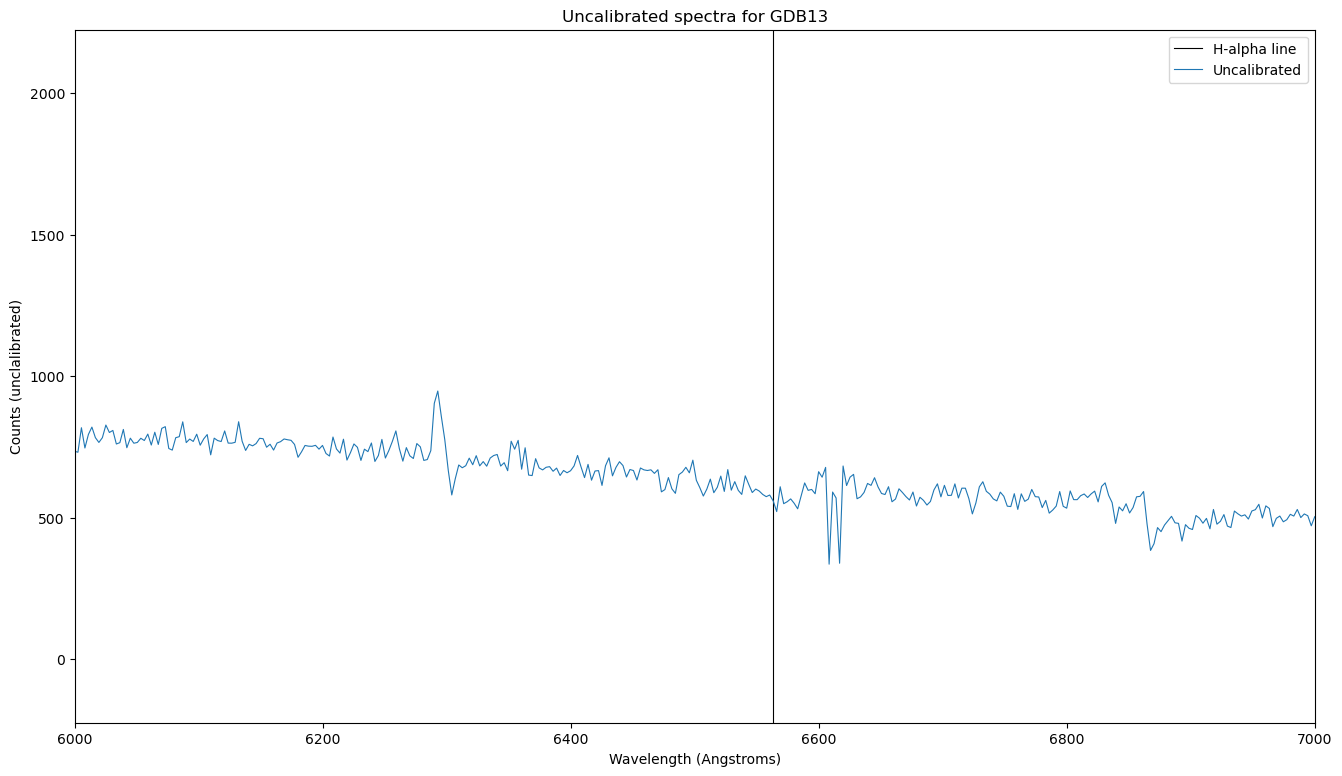

11
ZZ_GDB14.fits
3841.32520270348
2.82617926597595
9437.160149335861


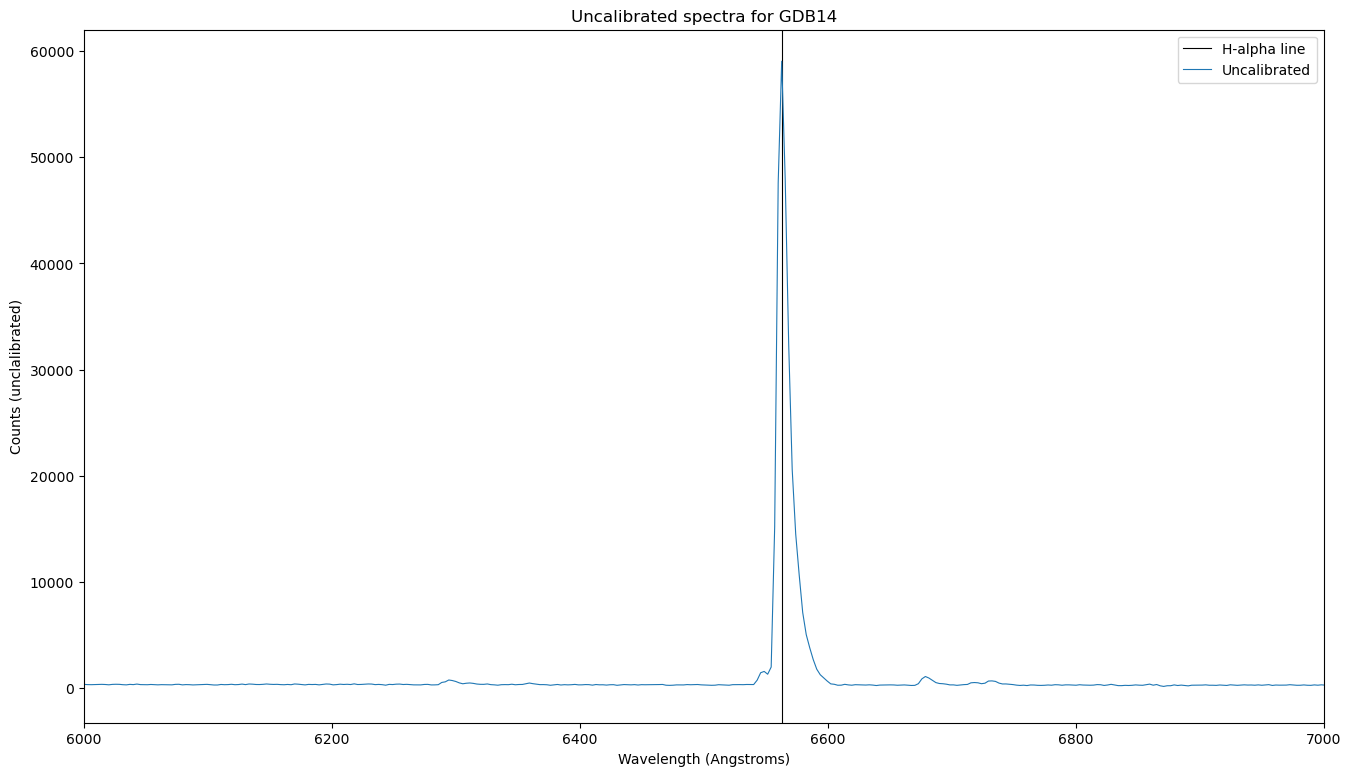

12
ZZ_GDB21.fits
3848.40265941621
2.81647777557373
9425.028655052196


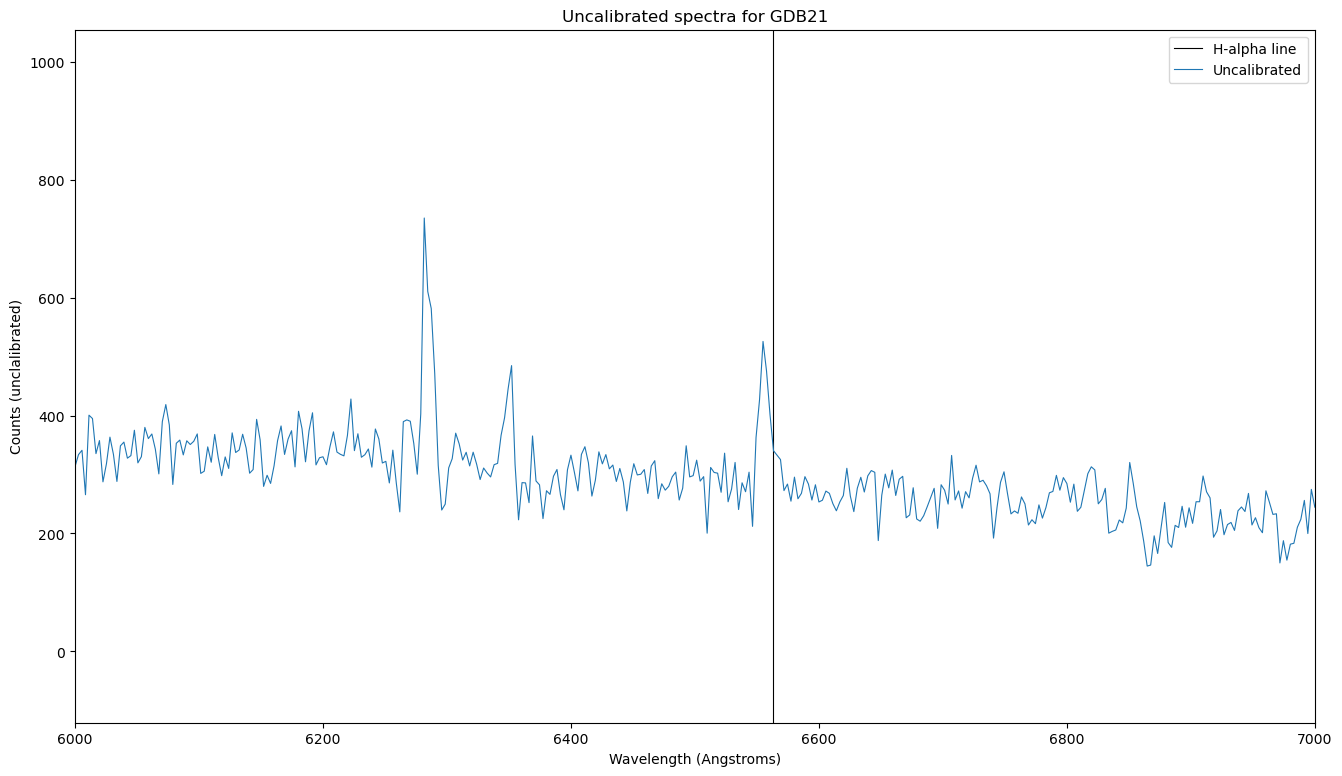

13
ZZ_GDB23.fits
3847.05451822281
2.81819009780884
9427.070911884313


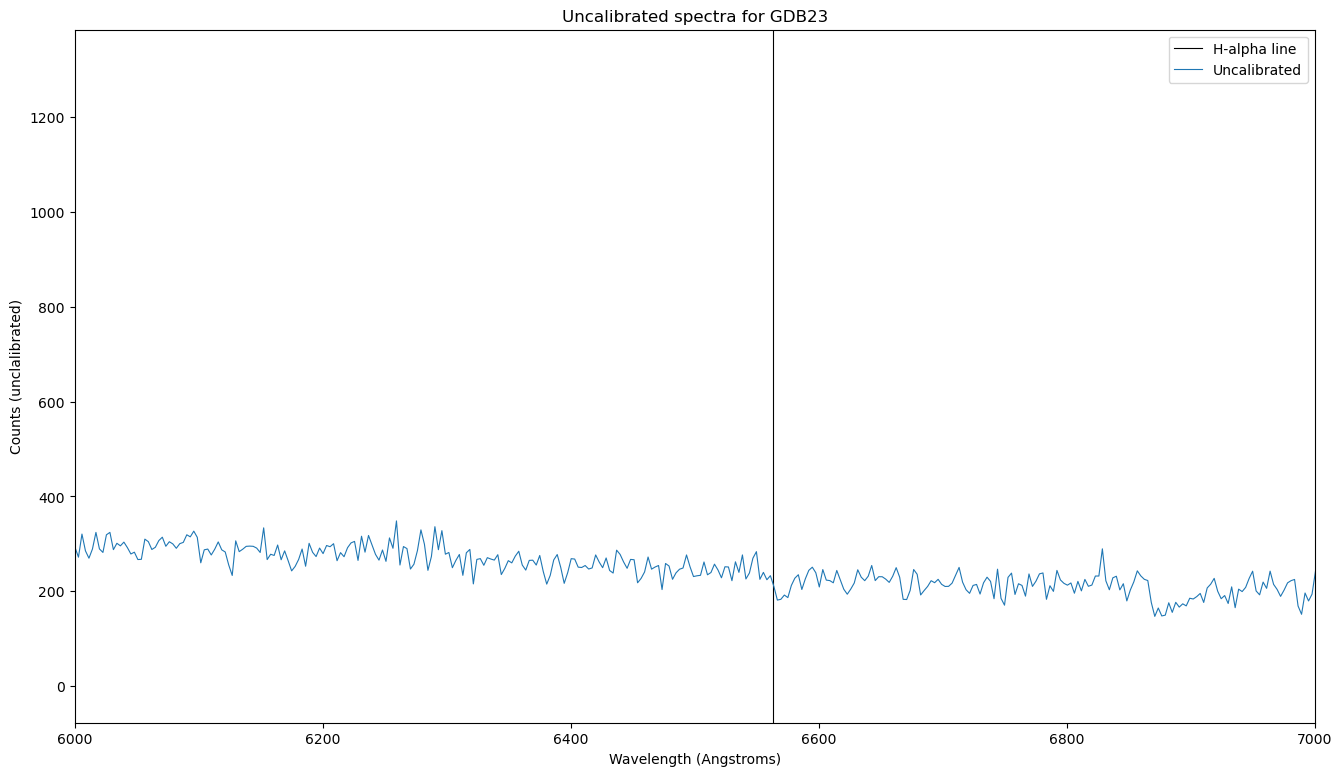

14
ZZ_GDB25.fits
3841.99587535859
2.82180309295654
9429.165999412538


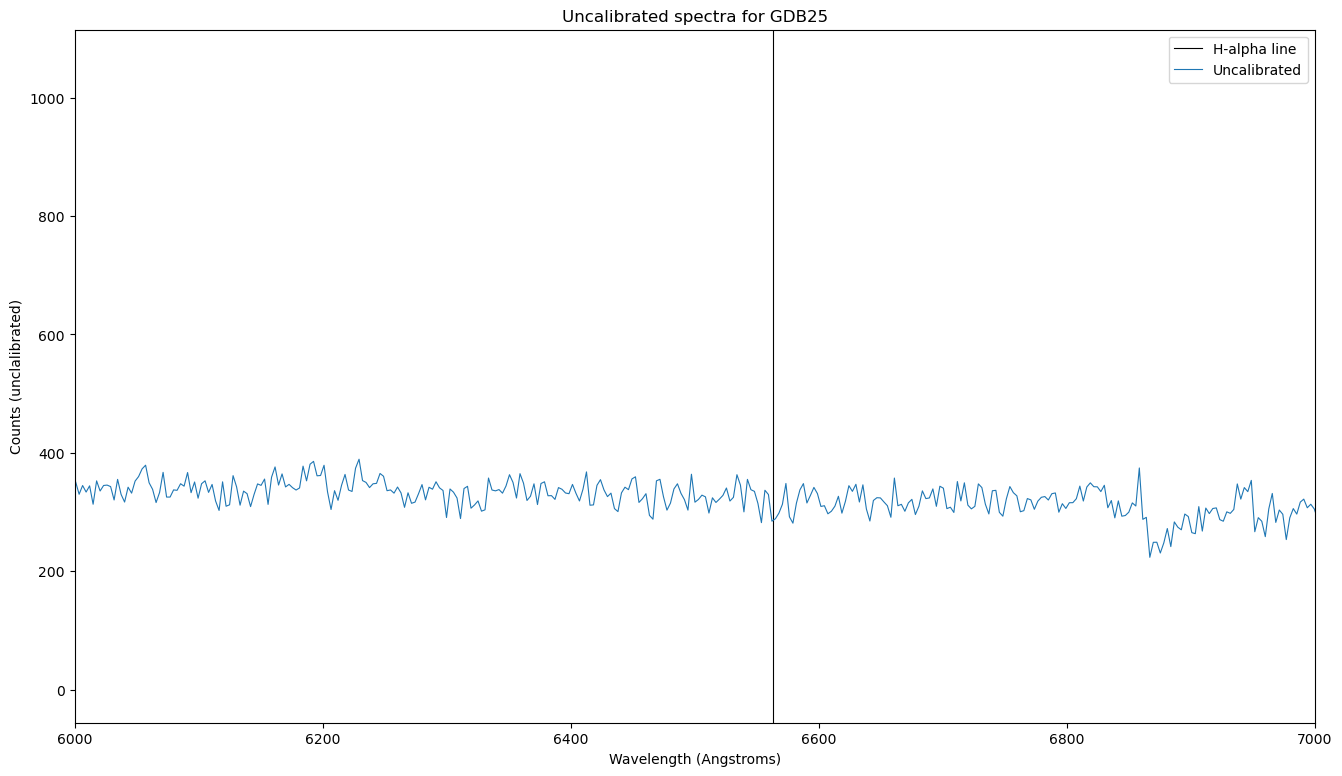

15
ZZ_GDB27.fits
3844.63404464722
2.8205680847168
9429.358852386484


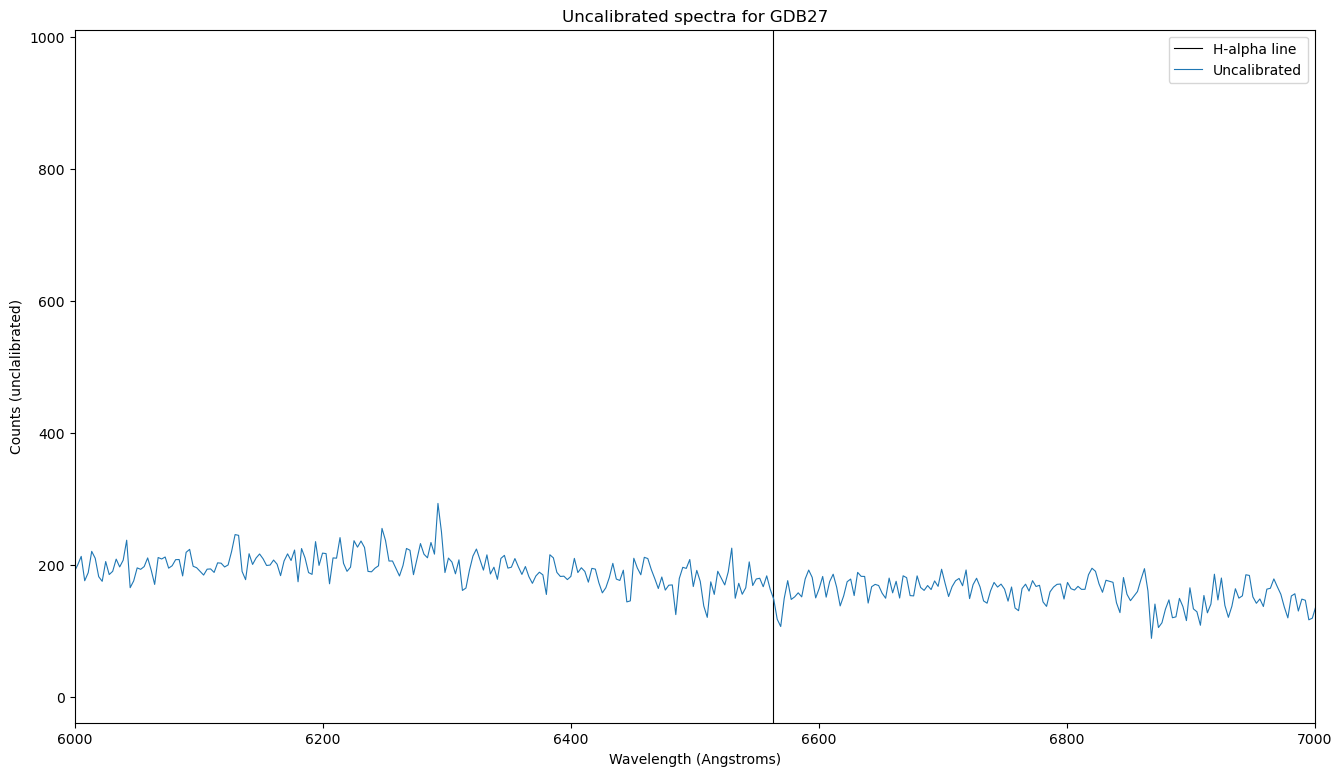

16
ZZ_GDB30.fits
3841.65435338021
2.82281041145325
9430.818968057645


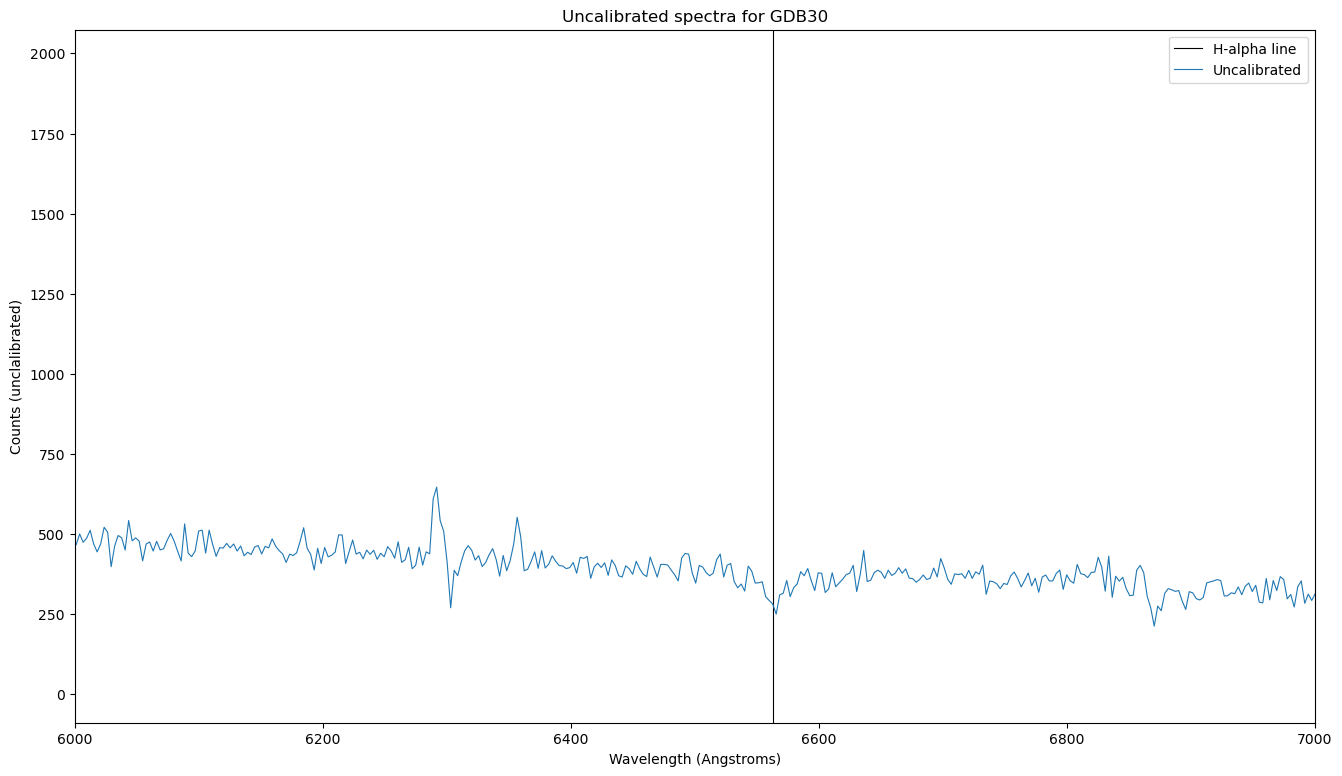

17
ZZ_GDB32.fits
3841.66689109803
2.82289695739746
9431.002866745


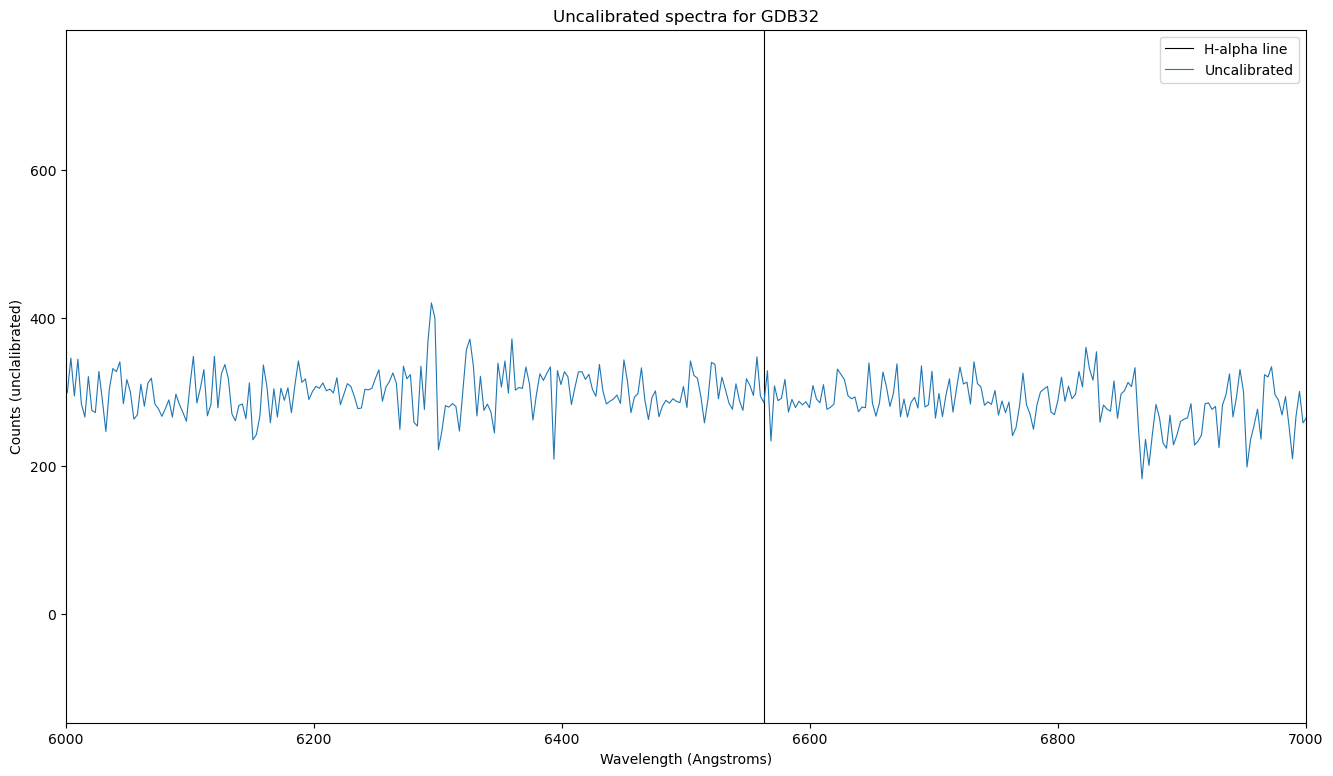

18
ZZ_GDB34.fits
3841.65719723702
2.81979489326477
9424.851085901264


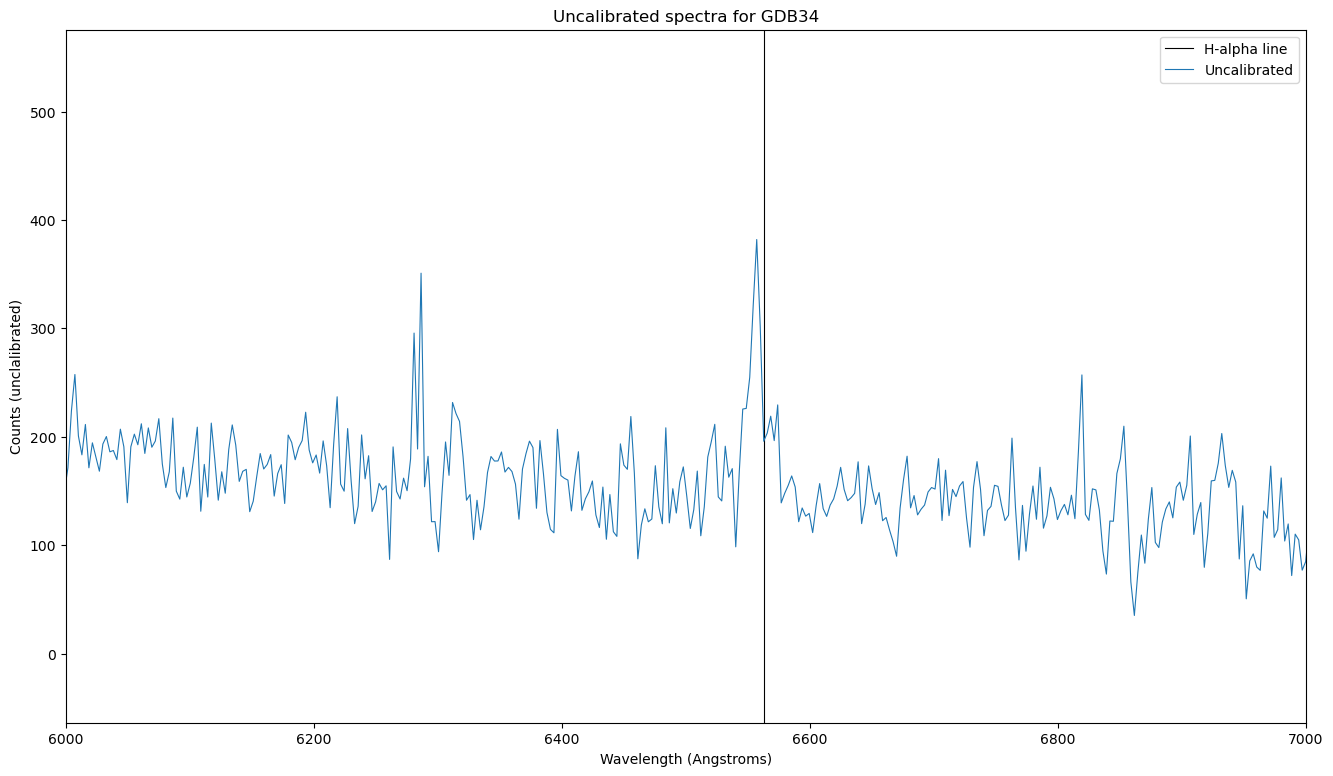

19
ZZ_GDB37.fits
3851.23559570313
2.8209969997406
9436.809655189518


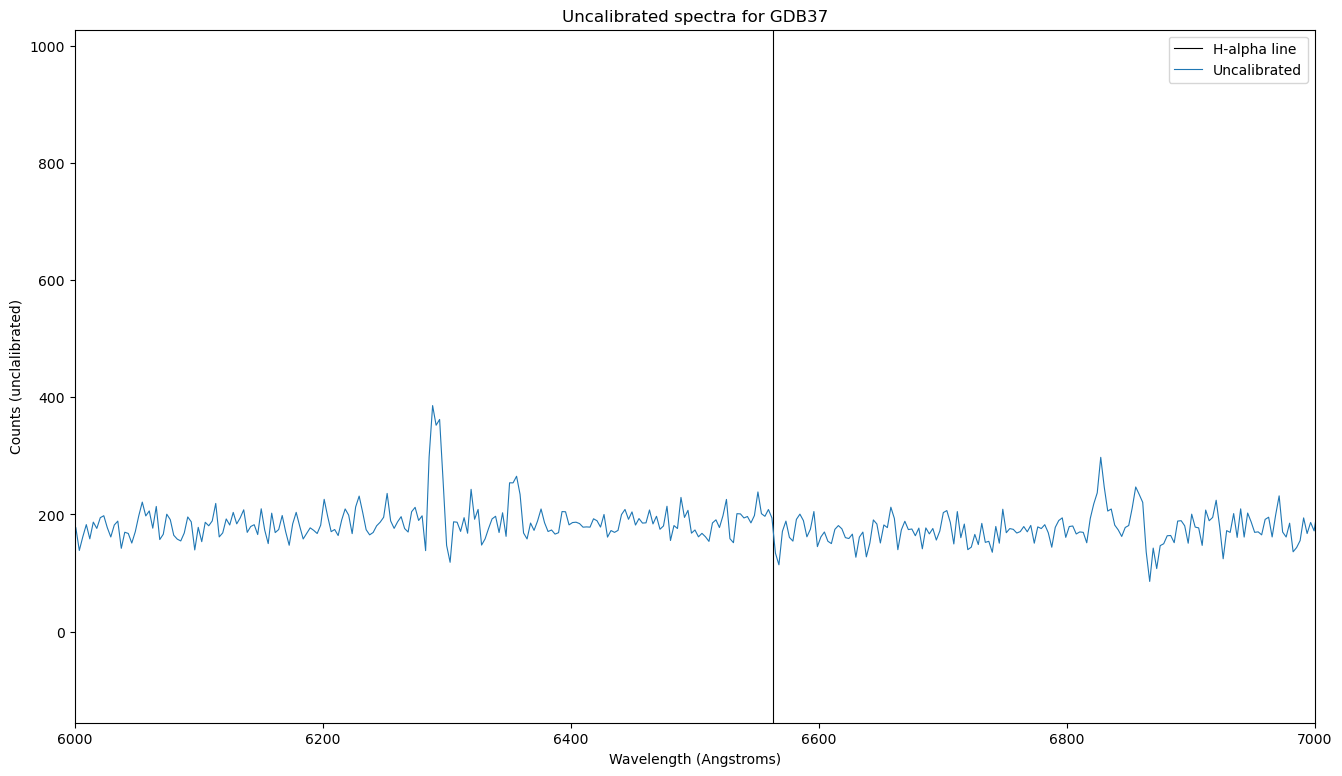

20
ZZ_GDB38.fits
3836.29570341111
2.82939481735229
9438.497441768644


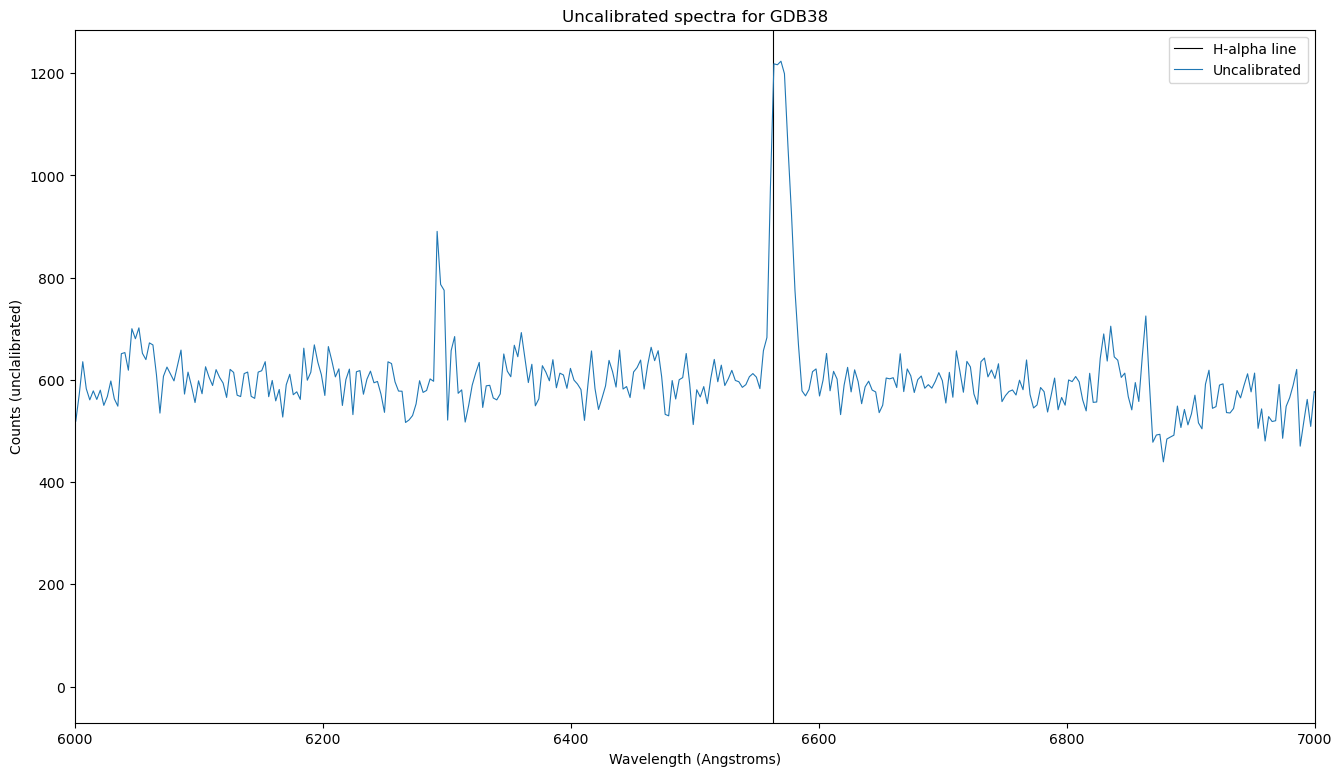

21
ZZ_GDB40.fits
3836.64506673813
2.82621908187866
9432.558848857876


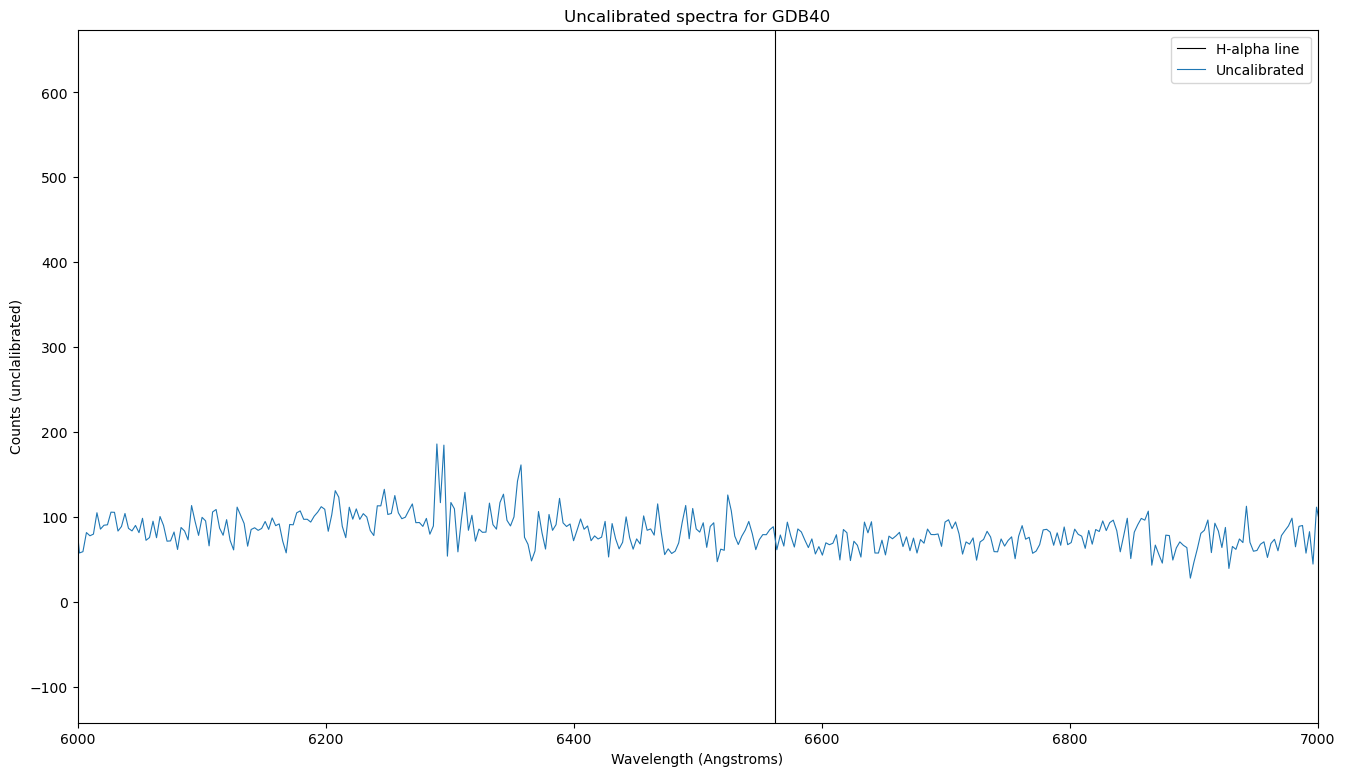

22
ZZ_GDB41.fits
3829.71459317208
2.83153653144836
9436.156925439833


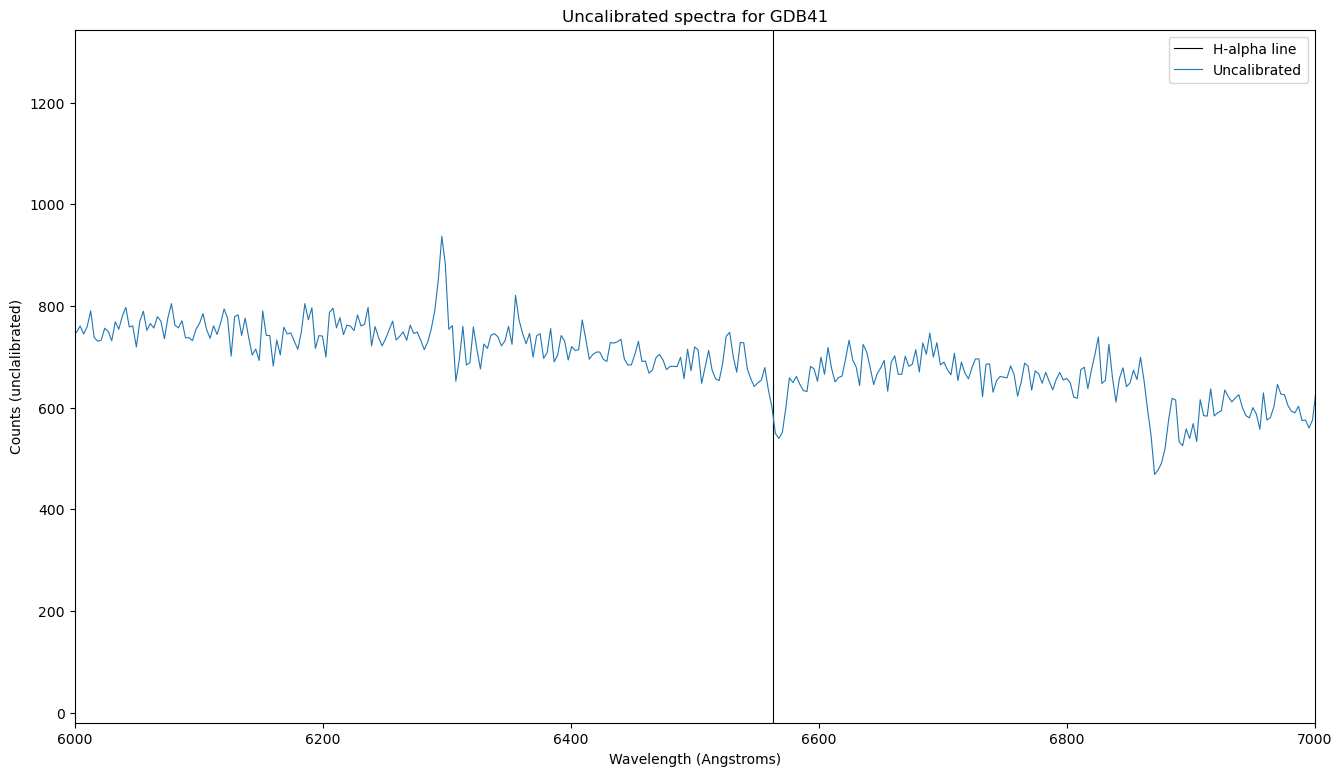

23
ZZ_LTT1020_21112023.fits
3854.69140625
2.81012177467346
9418.732520103451


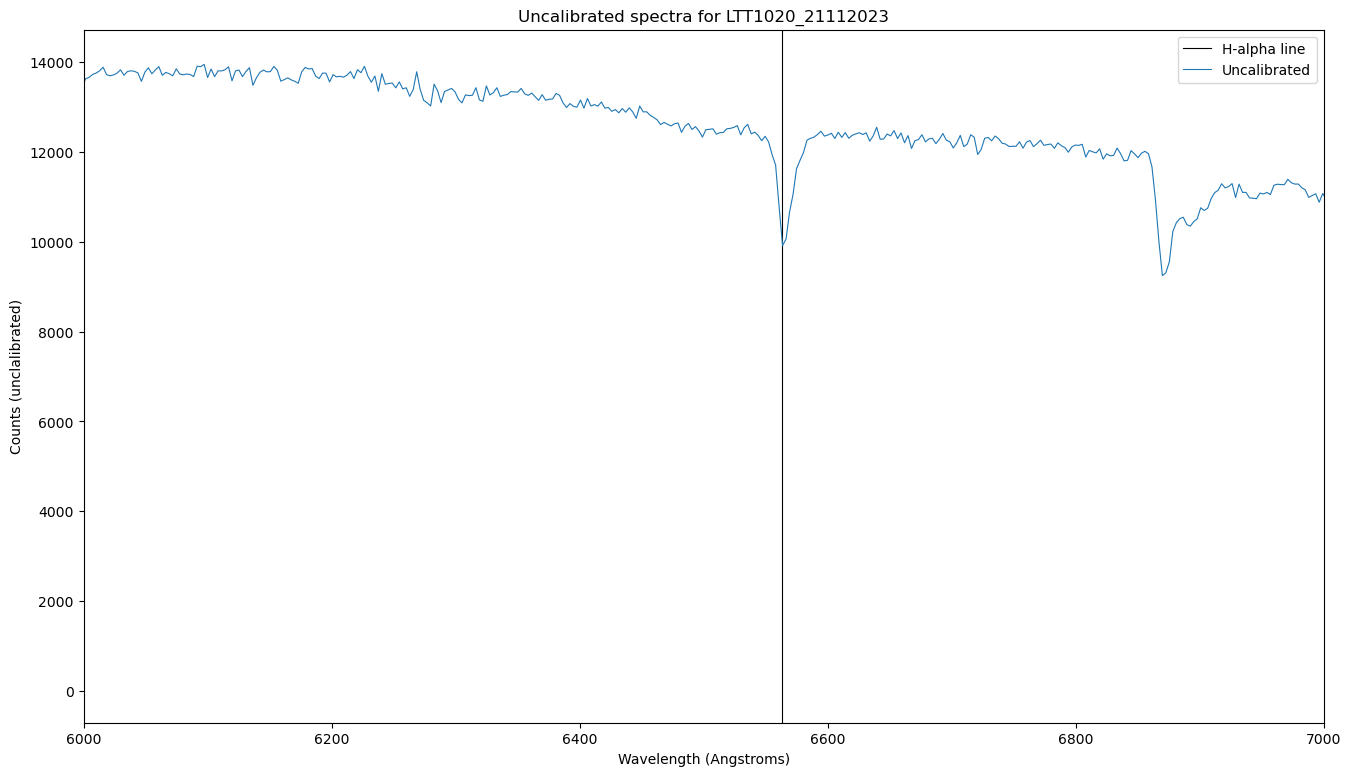

In [3]:
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np
# import pandas as pd



# Load data from CSV
f = open("all.csv", "r")

# Instansiate lists for file names of unclaibrated (files) and calibrated (files_cali) files.
files=[]

# Read first line for files and populate list
line=f.readline()
# print(f.readline())
while line!='':
    files.append(line[0:-1])
    line=f.readline()
#     print(line)
f.close()

#################This is for the spectra to pdf generation ###################


for i in range(0,len(files)):
    print(i)
    plt.figure(figsize=(16, 9))
    plt.title("H-alpha region plot")
    plt.xlim(6000,7000)
    plt.xlabel("Wavelength (Angstroms)")
    plt.ylabel("Counts (unclalibrated)")
    plt.axvline(x = 6562.8, color = 'black', label = 'H-alpha line', linewidth=0.8)
    #get the spectrum data from fits file from list of fits files
    dat=fits.open(str(files[i]))
    name=files[i]
    print(name)
    
    hdr = dat[0].header
    
    data=dat[0].data
    
    s1=data[0,0]
    
    # calculate the wavelength axis:
    crval1 = hdr['CRVAL1']
    print(crval1)
    cd11 = hdr['CD1_1']
    print(cd11)
    wav = crval1 +np.arange(len(s1))*cd11
    print(max(wav))

    plt.plot(wav, s1, label='Uncalibrated', linewidth=0.8)

    plt.legend(loc='best')
    plt.title("Uncalibrated spectra for "+str(name[3:-5]))

#     plt.close()
    plt.show()
#     break

print()

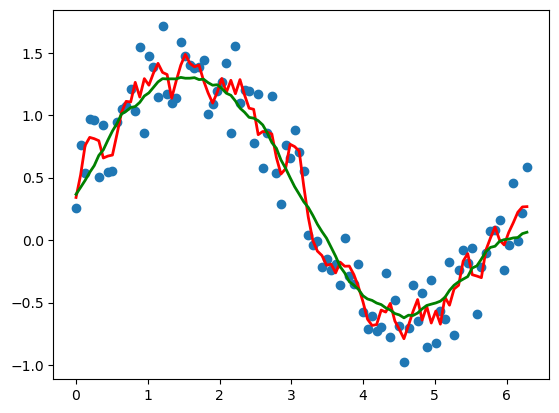

In [11]:
#Smoothing code
x = np.linspace(0,2*np.pi,100)
y = np.sin(x) + np.random.random(100) * 0.8

def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

plt.plot(x, y,'o')
# plt.show()
# plt.close()
plt.plot(x, smooth(y,3), 'r-', lw=2)
# plt.show()
# plt.close()
plt.plot(x, smooth(y,19), 'g-', lw=2)
plt.show()
plt.close()

Cal_ZZ_GDB1.fits
3854.69140625 Angstrom 7507.849713325499 Angstrom
Spectrum1D (length=1110)
flux:             [ 1.9374e-14 erg / (Angstrom cm2 s2), ..., 1.6887e-13 erg / (Angstrom cm2 s2) ],  mean=1.3327e-13 erg / (Angstrom cm2 s2)
spectral axis:    [ 3967.1 Angstrom, ..., 7083.5 Angstrom ],  mean=5525.3 Angstrom


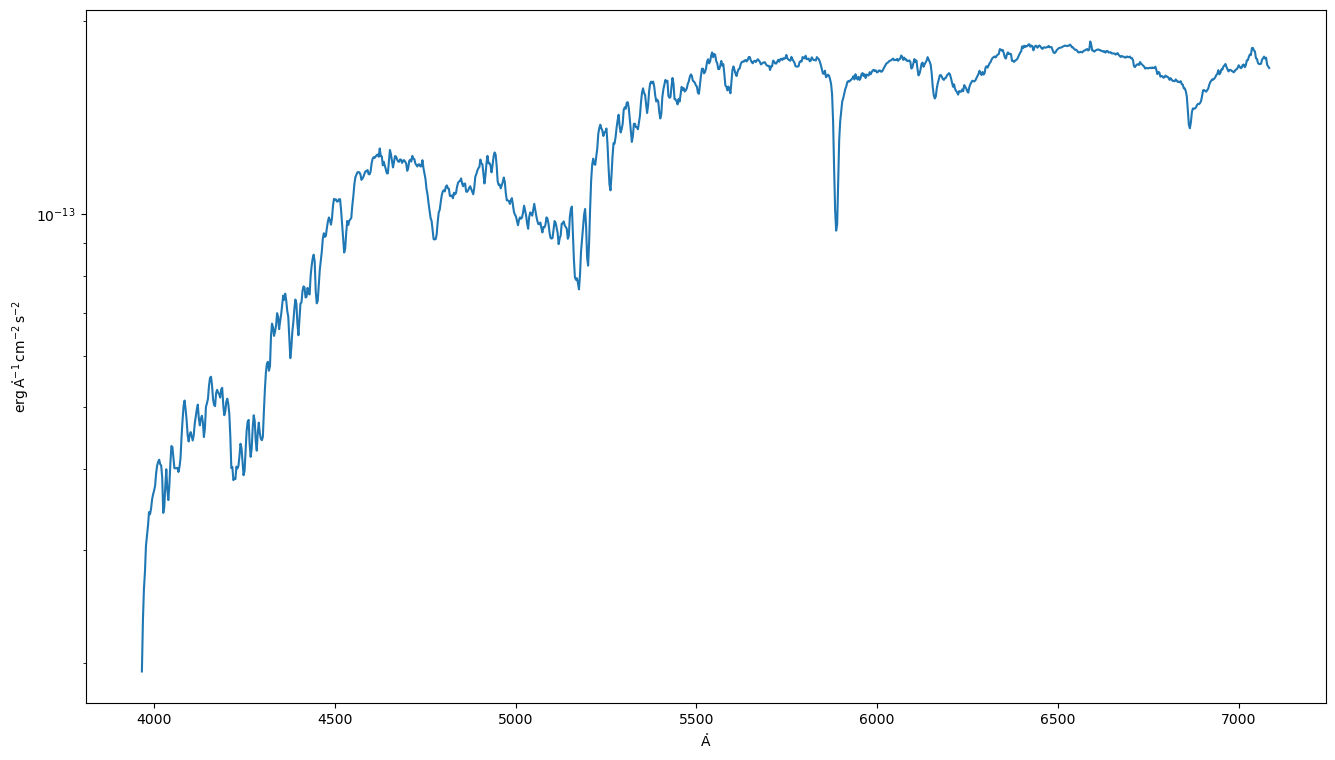

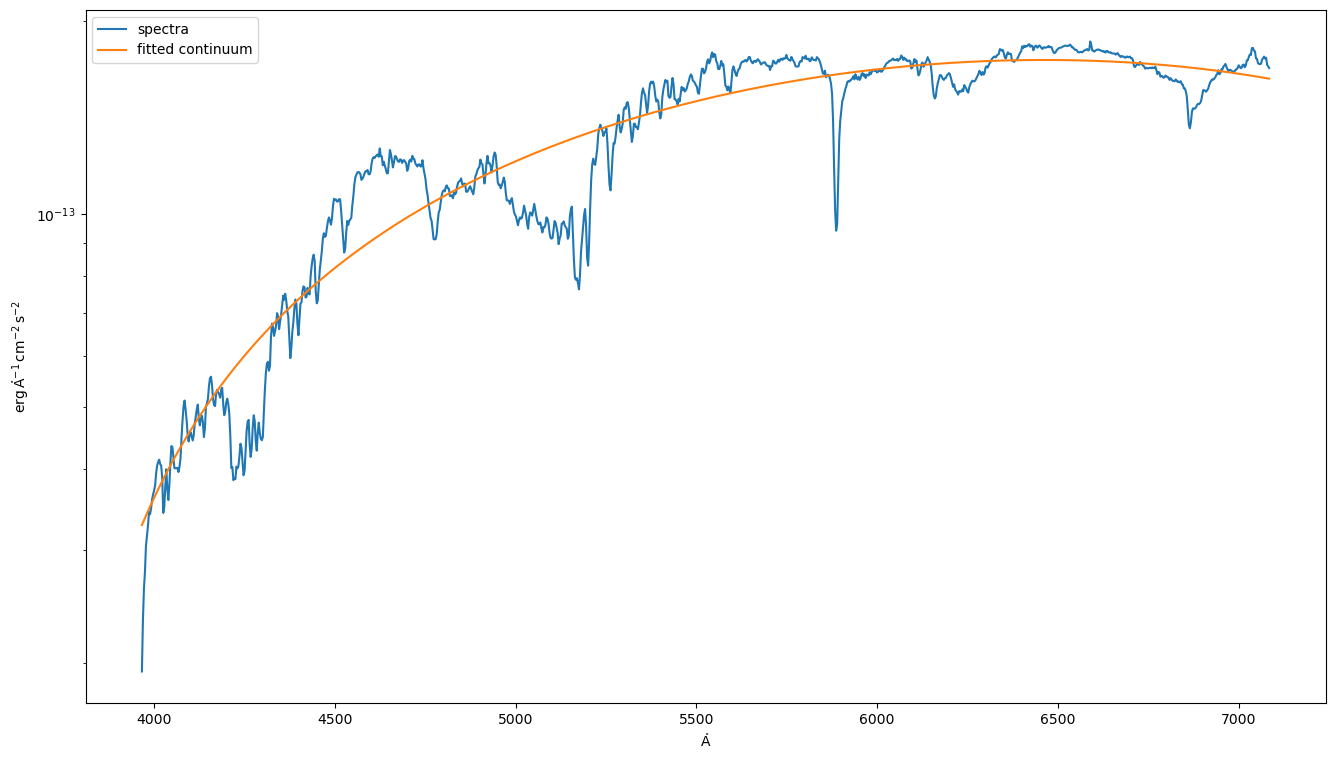

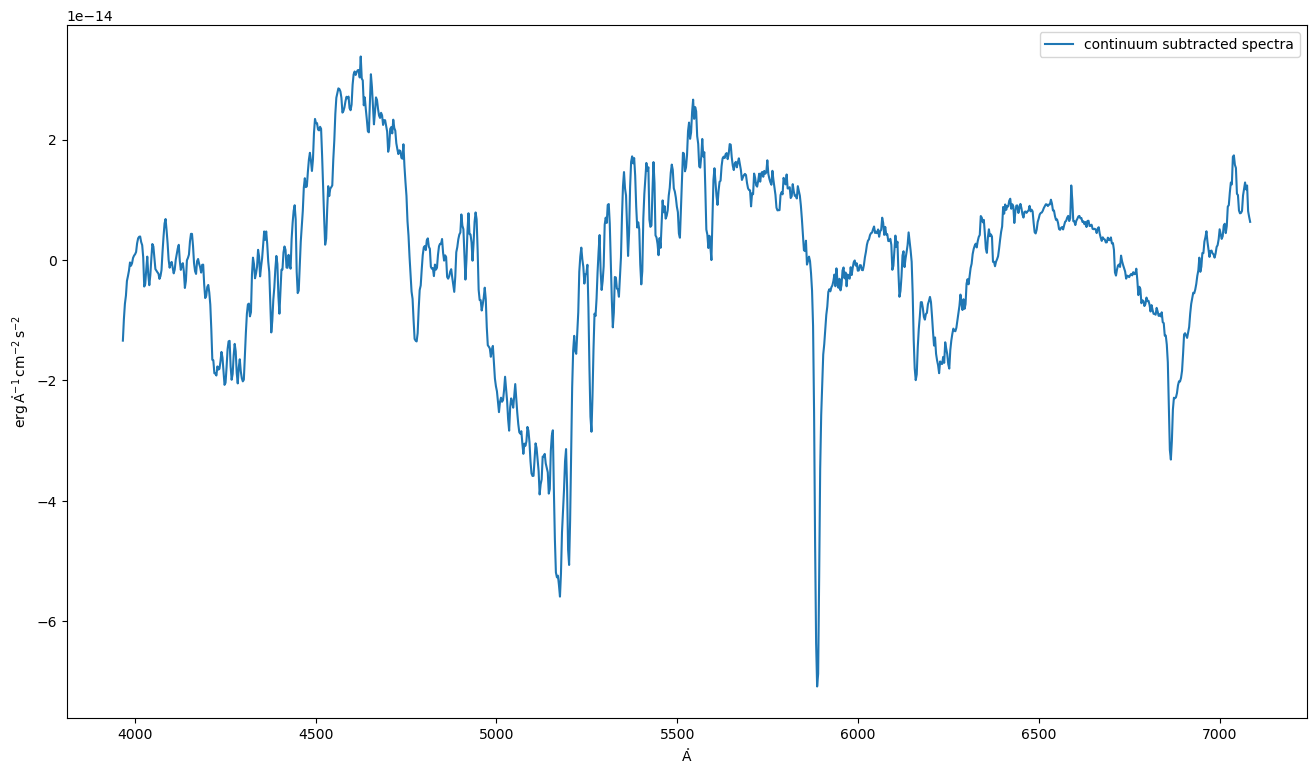

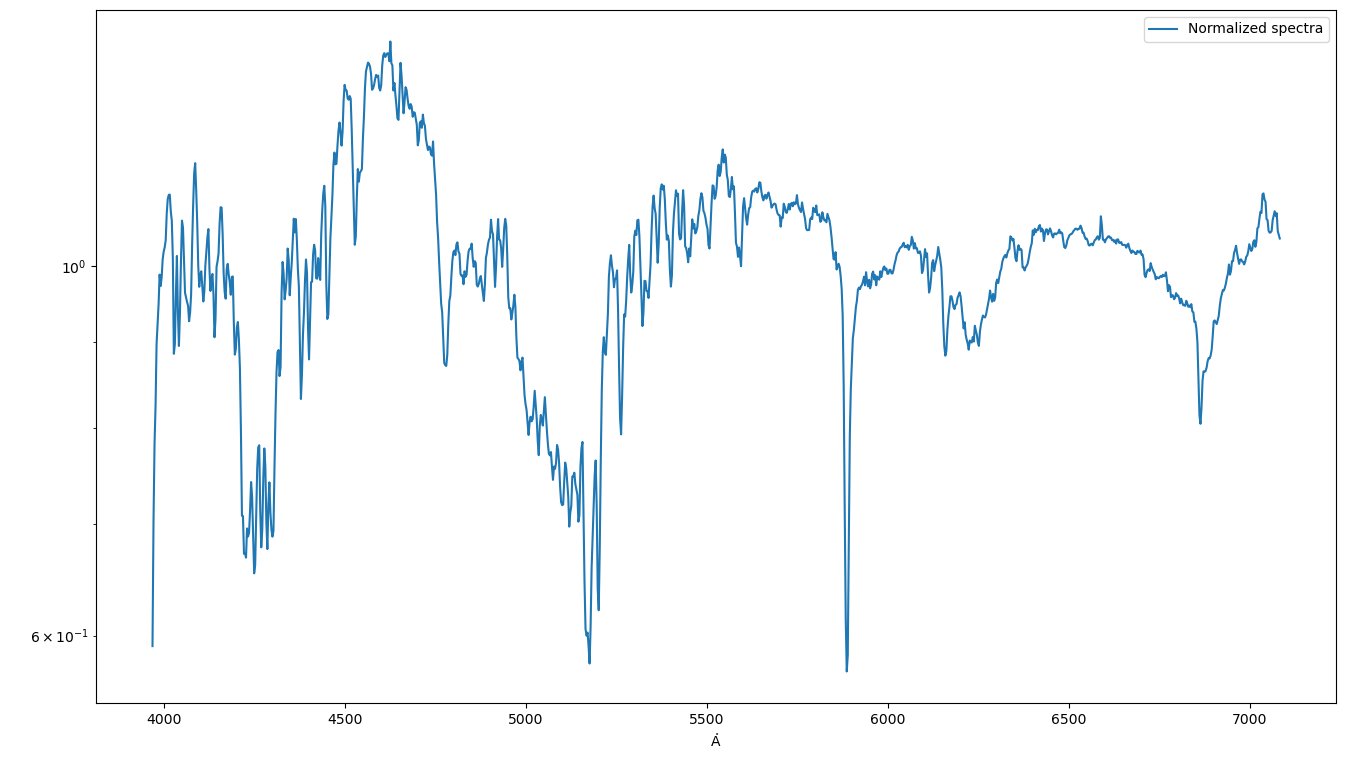

1


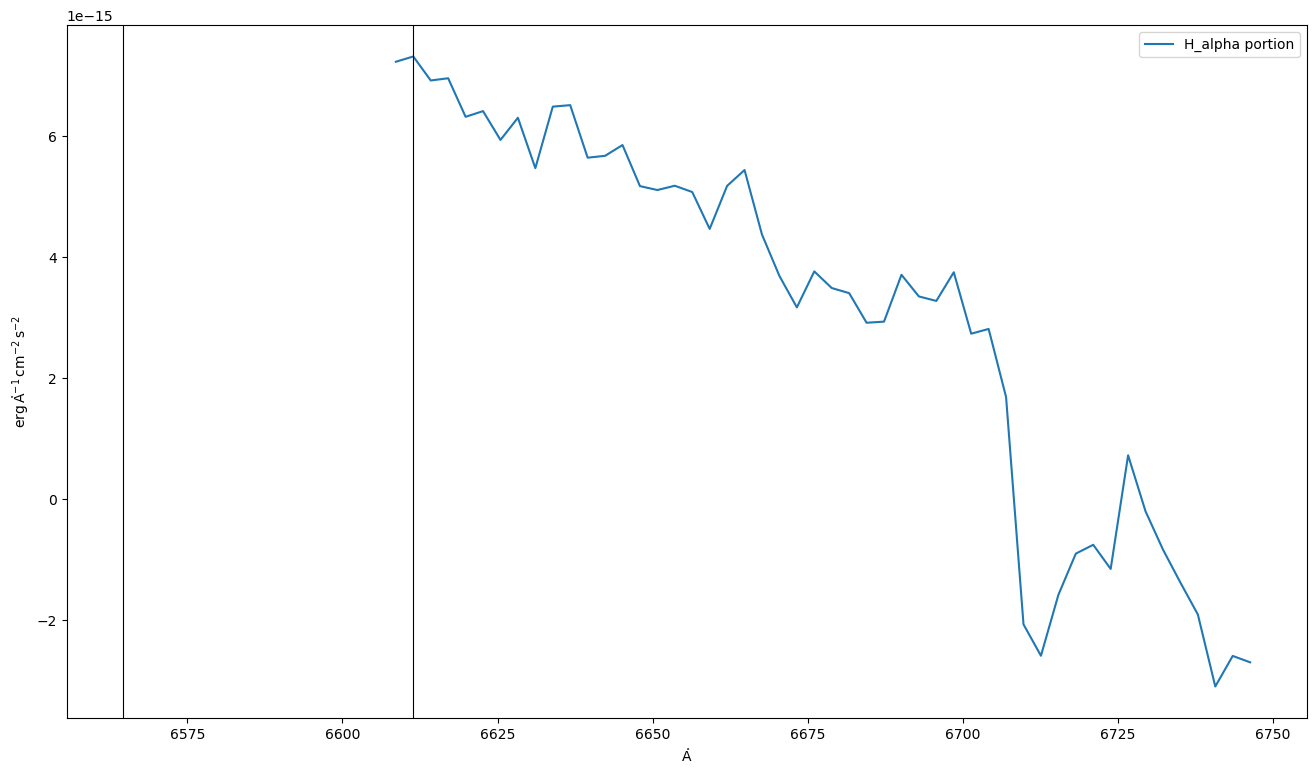

redshift of  Cal_ZZ_GDB1.fits  is  0.0071307918070783564
hence velocity of  Cal_ZZ_GDB1.fits  is  2137.7543374276347 km / s
The SNR of whole spectrum is:  97.62654391968297


NameError: name 'FWHM1' is not defined

In [90]:
# %matplotlib widget
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np
from specutils import Spectrum1D
from specutils.fitting import fit_generic_continuum as fgc
from scipy.signal import find_peaks
from specutils.analysis import snr_derived
from specutils.analysis import gaussian_fwhm
from specutils.analysis import equivalent_width

from astropy import units as u
from astropy.visualization import quantity_support
quantity_support()

f_c = open("My_cal_files.csv", "r")
f_SNR = open("My_SNR_vals.csv", "w")
f_SNR.writelines(['Name',',','SNR','\n'])
files_cali=[]
line=f_c.readline()
while line!='':
    row_data = line.strip("\n").split(',') # split the csv data columns
    files_cali.append(row_data[0]) #add the name of the file into the file names list
    line=f_c.readline() #read the next line
#     print(line)
f_c.close()

for i in range(0,len(files_cali)):

    dat_cal=fits.open(str(files_cali[i]))
    name=files_cali[i]
    print(name)
    
    hdr_cal=dat_cal[0].header
    data_cal=dat_cal[0].data
    
    
    s1_cal=data_cal[0,0]*u.Unit('erg cm-2 s-2 AA-1') #flux data
    n_s1_cal=s1_cal/max(s1_cal) #normalised flux
#     print(s1_cal)
    
    crval1 = hdr_cal['CRVAL1']
    cd11 = hdr_cal['CD1_1']
    wav_cal = (crval1 +np.arange(len(s1_cal))*cd11)*u.AA #wavelength data
#     print(len(wav_cal))
    
    spec=Spectrum1D(spectral_axis=wav_cal[40:1150],flux=s1_cal[40:1150])
    print(wav_cal[0],wav_cal[1300])
    print(spec)
    
    
    #plot the specctra alone
    fig=plt.figure(figsize=(16, 9)) #create the figure
    plt.yscale("log") #set y scale to log to correctly display the spectra
    plt.plot(spec.spectral_axis, spec.flux)
    plt.show()
    plt.close()
#     break
    #now calculate and plot the generic continuum with the specctra
    s_fit=fgc(spec)
    y_cont_fitted=s_fit(wav_cal[40:1150])
    fig=plt.figure(figsize=(16, 9)) #create the figure
    plt.yscale("log") #set y scale to log to correctly display the spectra
    plt.plot(spec.spectral_axis, spec.flux, label='spectra')
    plt.plot(wav_cal[40:1150], y_cont_fitted, label='fitted continuum')
    plt.legend()
    plt.show()
    plt.close()
    
    #plot continuum subtracted spectra
    fig=plt.figure(figsize=(16, 9)) #create the figure

    plt.plot(spec.spectral_axis, spec.flux-y_cont_fitted, label='continuum subtracted spectra')
    plt.legend()
#     plt.yscale("log") #set y scale to log to correctly display the spectra
    plt.show()
    plt.close()
    
    #now plot normalised spectra
    fig=plt.figure(figsize=(16, 9)) #create the figure

    plt.plot(spec.spectral_axis, spec.flux/y_cont_fitted, label='Normalized spectra')
    plt.legend()
    plt.yscale("log") #set y scale to log to correctly display the spectra
    plt.show()
    plt.close()
    
    #now redshift
    
    
    
    fig=plt.figure(figsize=(16, 9)) #create the figure
    x_cut=spec.spectral_axis[940:990]
    y_cut=spec.flux[940:990]-y_cont_fitted[940:990]
    plt.plot(x_cut, y_cut, label='H_alpha portion')

    plt.legend()
#     plt.yscale("log") #set y scale to log to correctly display the spectra

    
    i_peaks,_=find_peaks(y_cut)
    i_max_peak=i_peaks[np.argmax(y_cut[i_peaks])]
    print(i_max_peak)
    
    xmax=x_cut[i_max_peak]
    z=(xmax-6564.61*u.AA)/(6564.61*u.AA) #H-Alpha rest wavelength is 6564 angstrom
    
    plt.axvline(x = xmax, color = 'black', label = 'H-alpha line', linewidth=0.8)
    plt.axvline(x = 6564.61, color = 'black', label = 'H-alpha line', linewidth=0.8)
    plt.show()
    plt.close()
    
    print('redshift of ',name,' is ',z)
    print('hence velocity of ',name,' is ',z*299792*u.Unit('km s-1'))
    
    #now  SNR calculations
    spec_con_subbed=Spectrum1D(spectral_axis=wav_cal[40:1150],flux=spec.flux-y_cont_fitted)
    SNR1=snr_derived(spec)
#     FWHM1=gaussian_fwhm(spec_con_subbed,regions=[940,990])
    print('The SNR of whole spectrum is: ',SNR1)
    print('The FWHM of Halpha is: ',FWHM1)
    
    f_SNR.writelines([str(name[7:-5]),',',str(np.round(SNR1,1)),'\n'])
#     f_SNR.write(',')
#     f_SNR.write(str(SNR1))
#     f_SNR.write('\n')
    break
f_c.close()
f_SNR.close()
    
    
#     break


In [ ]:
d=10**(0.2*(m-M+5)) #(distance in Parsec)

In [2]:
# from astropy.io import fits
# from astropy.coordinates import SkyCoord
# from pyvo.dal import imagesearch

# pos = SkyCoord.from_name('M17')
# table = imagesearch('https://irsa.ipac.caltech.edu/cgi-bin/2MASS/IM/nph-im_sia?type=at&ds=asky&',
#                    pos, size=0.25).to_table()
# table = table[(table['band'].astype('S') == 'K') & (table['format'].astype('S') == 'image/fits')]

# m17_hdus =  [fits.open(url)[0] for url in table['download'].astype('S')]

print(pos)





<SkyCoord (ICRS): (ra, dec) in deg
    (275.1958, -16.1717)>


In [136]:
def Plot_Cont_Norm_Pic(PName):
    with open('uvi_data.csv') as f:
        reader = csv.reader(f, delimiter=',')
        for row in reader:
    #         print(row)
            dat=fits.open(str(row[0]))
            if(str(row[0])==PName):

                #sort the names and spectral types using delimiter
                name=row[0][0:-5]
                SpecT=row[1]

                #Get the header info and curve data
                hdr = dat[0].header
                data=dat[1].data
                s1=[]

                wav=[]
                for i in range(540,1655):#(540,1655)
                    s1.append(data[i][1])
                    wav.append(data[i][0])
    #                     print(i,data[i][0])
    #                 print(s1)

                #Continuum fitting 
                    #get objects in 'Quantity' format
                s1_cal=s1*u.Unit('erg cm-2 s-2 AA-1')
                print("s1_cal:",s1_cal)
                crval1 = s1_cal[0]
                cd11 = s1_cal[1]-s1_cal[0]
                wav_cal = wav*u.AA

                spec=Spectrum1D(spectral_axis=wav_cal,flux=s1_cal)
#                 print(spec)
                s_fit=fgc(spec,median_window=109)
                y_cont_fitted=s_fit(wav_cal)
                #Testing fitted continuum:
#                 print("cont_fitted",y_cont_fitted)
#                 fig=plt.figure(figsize=(16, 9)) #create the figure
#                 plt.yscale("log") #set y scale to log to correctly display the spectra
#                 plt.plot(spec.spectral_axis, spec.flux, label='spectra')
#                 plt.plot(wav_cal, y_cont_fitted, label='fitted continuum')
#                 plt.legend()
#                 plt.show()
#                 plt.close()

                #plotting
                s1max=max(s1)
                for i in range(0,len(s1)):
                    s1[i]=s1_cal[i]/y_cont_fitted[i]

#                 plt.yscale("log")
#                 plt.xlim(3968.6,7500)
                plt.plot(wav, s1, label="Pickles type "+str(SpecT), linewidth=0.5, color="teal")
        #         break
    f.close()

def Plot_Cont_Norm_MrKT(PName):
    f_c = open("My_cal_files.csv", "r")
    files_cali=[]
    line=f_c.readline()
    while line!='':
        row_data = line.strip("\n").split(',') # split the csv data columns
        files_cali.append(row_data[0]) #add the name of the file into the file names list
        line=f_c.readline() #read the next line
    #     print(line)
    f_c.close()

    dat_cal=fits.open(PName)
    name=PName
    print(name)

    hdr_cal=dat_cal[0].header
    data_cal=dat_cal[0].data

    s1_cal=data_cal[0,0]*u.Unit('erg cm-2 s-2 AA-1') #flux data
    n_s1_cal=s1_cal/max(s1_cal) #normalised flux

    crval1 = hdr_cal['CRVAL1']
    cd11 = hdr_cal['CD1_1']
    wav_cal = (crval1 +np.arange(len(s1_cal))*cd11)*u.AA #wavelength data


    spec=Spectrum1D(spectral_axis=wav_cal[0:1300],flux=s1_cal[0:1300])
    print(spec)
    s_fit=fgc(spec,median_window=109)
    y_cont_fitted=s_fit(wav_cal[0:1300])
    s1=[]

    for i in range(0,len(spec.flux)):
        s1.append(s1_cal[i]/y_cont_fitted[i])


#     fig=plt.figure(figsize=(16, 9)) #create the figure
#     plt.yscale("log")
    plt.plot(wav_cal[0:1300], s1, label="Target", linewidth=0.5, color="red")
    plt.legend()



In [137]:

# Plot_Cont_Norm_MrKT("Cal_ZZ_GDB6.fits")
# Plot_Cont_Norm_Pic("pickles_4.fits")


0
ZZ_GDB1.fits
Spectrum1D (length=1300)
flux:             [ 1317.8 erg / (Angstrom cm2 s2), ..., 1.6608e+05 erg / (Angstrom cm2 s2) ],  mean=1.1067e+05 erg / (Angstrom cm2 s2)
spectral axis:    [ 3854.7 Angstrom, ..., 7505.0 Angstrom ],  mean=5679.9 Angstrom
s1_cal: [5.3566218e-10 4.8377680e-10 4.5443016e-10 ... 8.3306881e-09 8.1770919e-09
 8.0422193e-09] erg / (Angstrom cm2 s2)


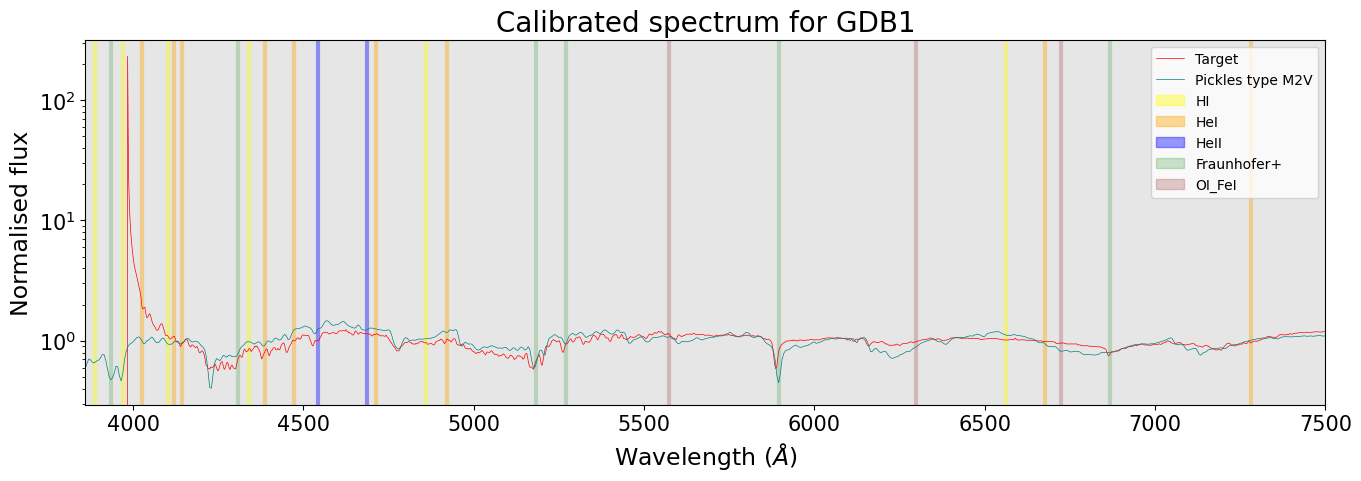

1
ZZ_GDB2.fits
Spectrum1D (length=1300)
flux:             [ 423.75 erg / (Angstrom cm2 s2), ..., 4.4051e+04 erg / (Angstrom cm2 s2) ],  mean=3.4195e+04 erg / (Angstrom cm2 s2)
spectral axis:    [ 3856.1 Angstrom, ..., 7514.1 Angstrom ],  mean=5685.1 Angstrom
s1_cal: [4.5314083e-10 4.3340598e-10 4.1334866e-10 ... 3.3828520e-09 3.2970853e-09
 3.2301379e-09] erg / (Angstrom cm2 s2)


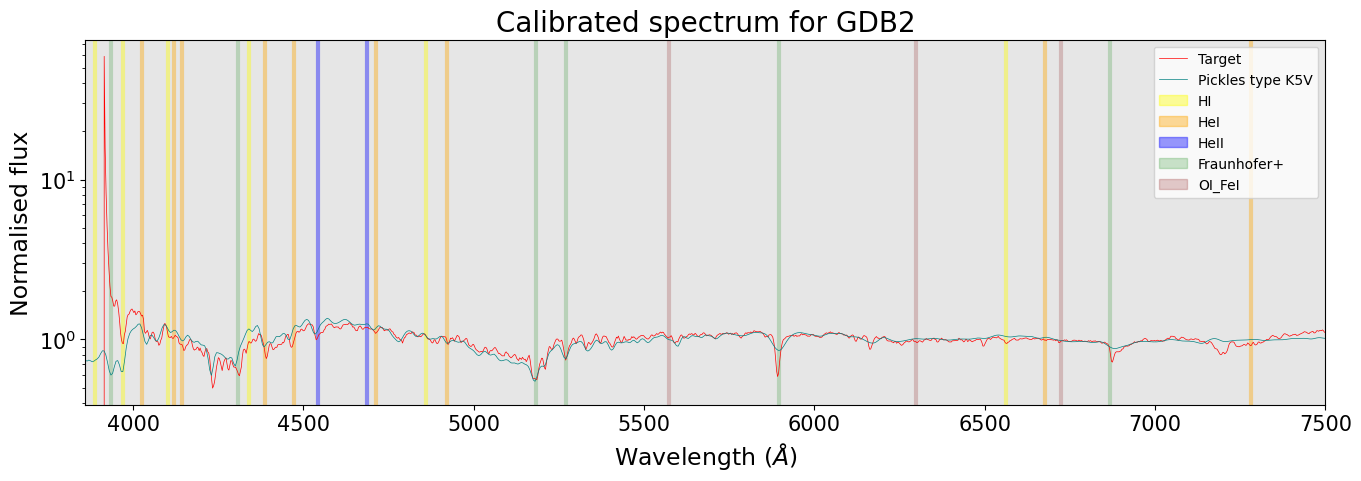

2
ZZ_GDB3.fits
Spectrum1D (length=1300)
flux:             [ 40.961 erg / (Angstrom cm2 s2), ..., 1564.9 erg / (Angstrom cm2 s2) ],  mean=1170.5 erg / (Angstrom cm2 s2)
spectral axis:    [ 3855.6 Angstrom, ..., 7511.8 Angstrom ],  mean=5683.7 Angstrom
s1_cal: [7.0195189e-10 5.9517358e-10 5.6147498e-10 ... 3.0004399e-09 2.9048759e-09
 2.8130869e-09] erg / (Angstrom cm2 s2)


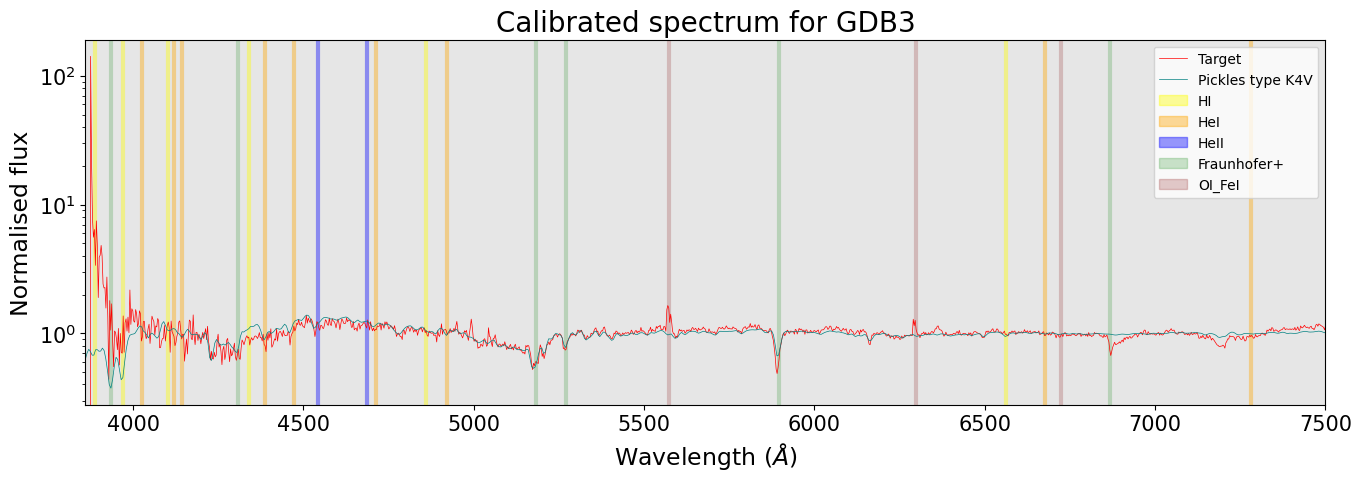

3
ZZ_GDB4.fits
Spectrum1D (length=1300)
flux:             [ 435.25 erg / (Angstrom cm2 s2), ..., 872.63 erg / (Angstrom cm2 s2) ],  mean=1572.0 erg / (Angstrom cm2 s2)
spectral axis:    [ 3857.5 Angstrom, ..., 7507.8 Angstrom ],  mean=5682.7 Angstrom
s1_cal: [6.3352861e-09 6.8609789e-09 7.1147088e-09 ... 8.0574702e-10 7.8567886e-10
 7.7038853e-10] erg / (Angstrom cm2 s2)


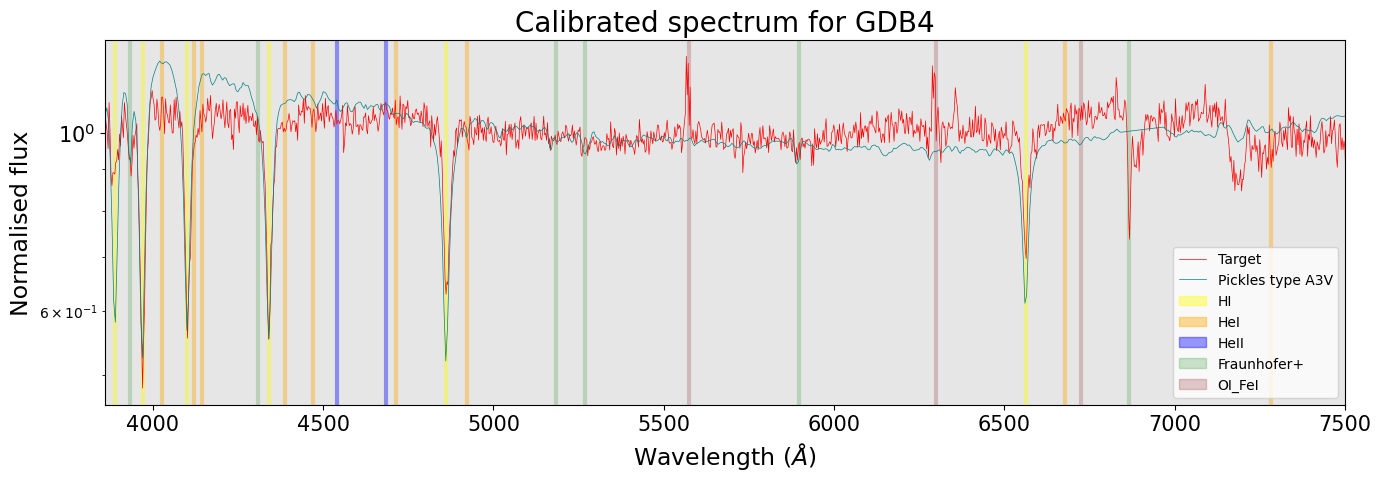

4
ZZ_GDB5.fits
Spectrum1D (length=1300)
flux:             [ 303.26 erg / (Angstrom cm2 s2), ..., 5752.9 erg / (Angstrom cm2 s2) ],  mean=4899.8 erg / (Angstrom cm2 s2)
spectral axis:    [ 3849.6 Angstrom, ..., 7511.9 Angstrom ],  mean=5680.8 Angstrom
s1_cal: [5.2351518e-10 5.1350302e-10 5.0576737e-10 ... 2.7490223e-09 2.6135312e-09
 2.5397353e-09] erg / (Angstrom cm2 s2)


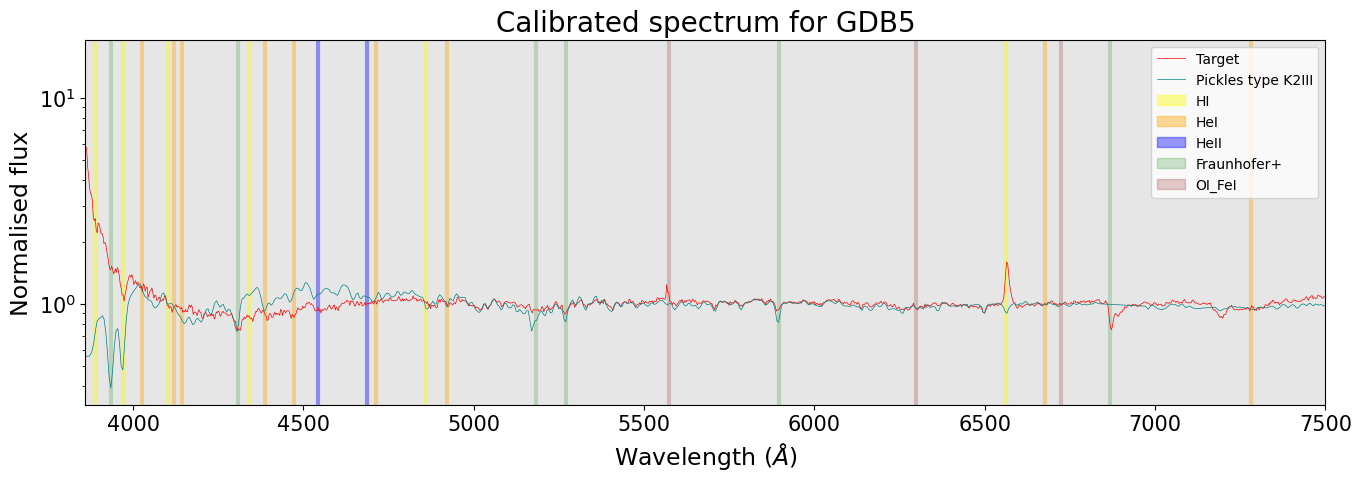

5
ZZ_GDB6.fits
Spectrum1D (length=1300)
flux:             [ 344.56 erg / (Angstrom cm2 s2), ..., 577.58 erg / (Angstrom cm2 s2) ],  mean=1050.0 erg / (Angstrom cm2 s2)
spectral axis:    [ 3855.9 Angstrom, ..., 7516.7 Angstrom ],  mean=5686.3 Angstrom
s1_cal: [1.2881474e-08 1.3109511e-08 1.2989170e-08 ... 5.8442395e-10 5.7672056e-10
 5.5965016e-10] erg / (Angstrom cm2 s2)


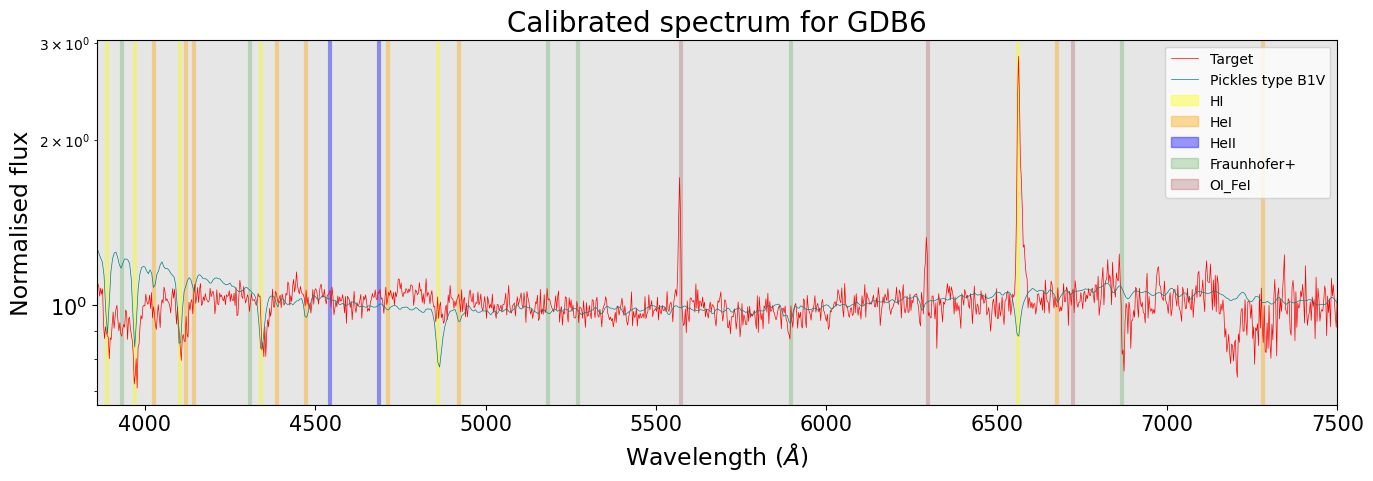

6
ZZ_GDB7.fits
Spectrum1D (length=1300)
flux:             [ 834.93 erg / (Angstrom cm2 s2), ..., 1162.0 erg / (Angstrom cm2 s2) ],  mean=2382.9 erg / (Angstrom cm2 s2)
spectral axis:    [ 3845.9 Angstrom, ..., 7510.5 Angstrom ],  mean=5678.2 Angstrom


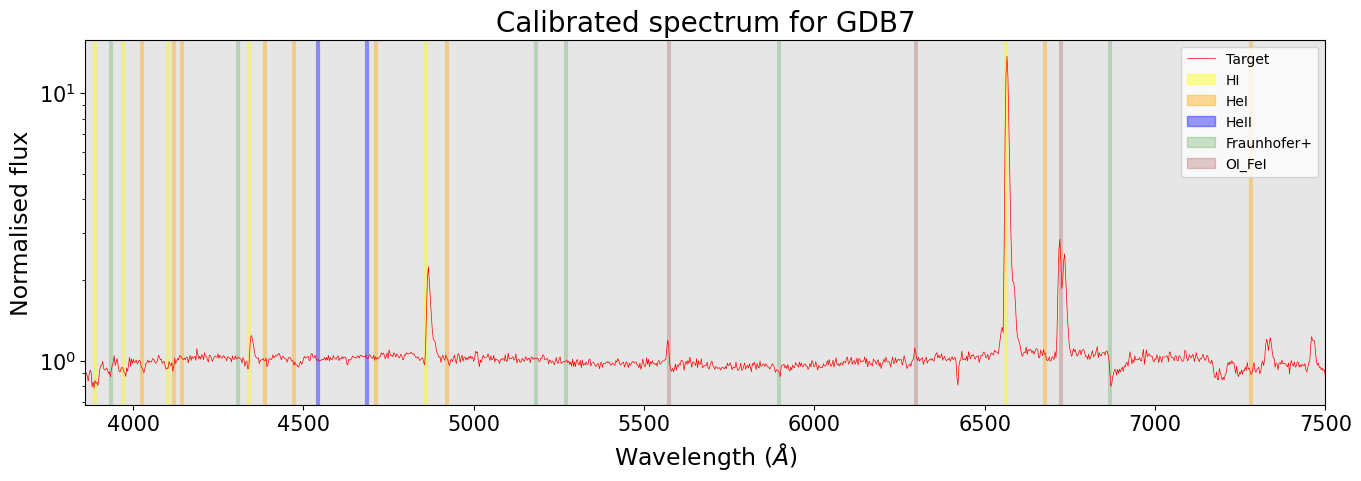

7
ZZ_GDB8.fits
Spectrum1D (length=1300)
flux:             [ 961.67 erg / (Angstrom cm2 s2), ..., 991.68 erg / (Angstrom cm2 s2) ],  mean=2262.3 erg / (Angstrom cm2 s2)
spectral axis:    [ 3853.9 Angstrom, ..., 7511.5 Angstrom ],  mean=5682.7 Angstrom


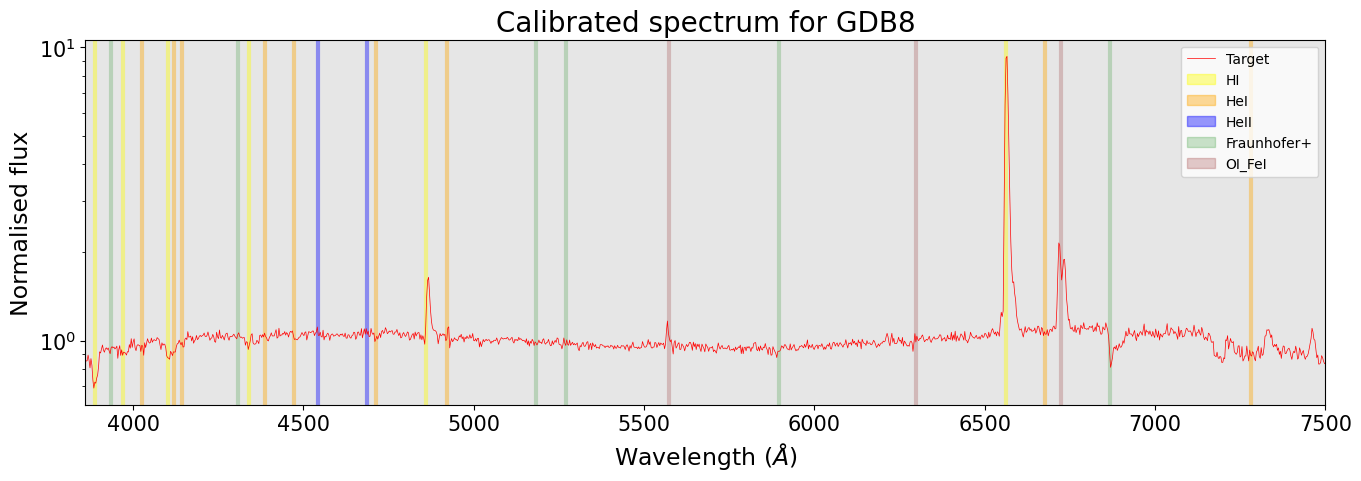

8
ZZ_GDB9.fits
Spectrum1D (length=1300)
flux:             [ 577.93 erg / (Angstrom cm2 s2), ..., 1624.6 erg / (Angstrom cm2 s2) ],  mean=3473.5 erg / (Angstrom cm2 s2)
spectral axis:    [ 3852.5 Angstrom, ..., 7510.6 Angstrom ],  mean=5681.5 Angstrom


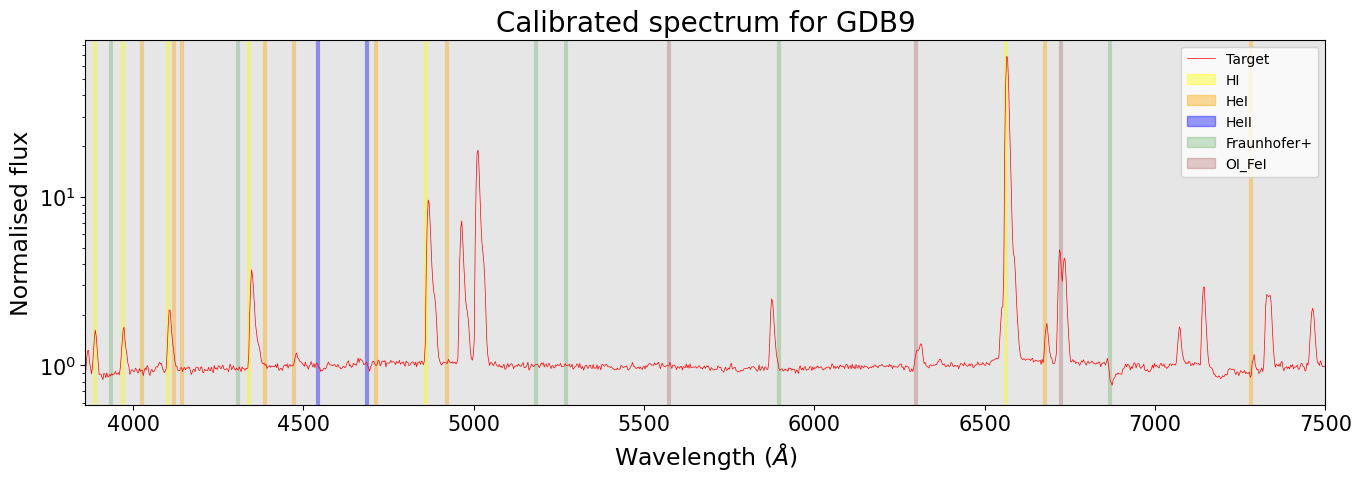

9
ZZ_GDB10.fits
Spectrum1D (length=1300)
flux:             [ 728.81 erg / (Angstrom cm2 s2), ..., 1031.2 erg / (Angstrom cm2 s2) ],  mean=1963.3 erg / (Angstrom cm2 s2)
spectral axis:    [ 3851.6 Angstrom, ..., 7508.6 Angstrom ],  mean=5680.1 Angstrom
s1_cal: [9.7689776e-09 1.0022476e-08 1.0038783e-08 ... 7.0767442e-10 6.9005740e-10
 6.6558847e-10] erg / (Angstrom cm2 s2)


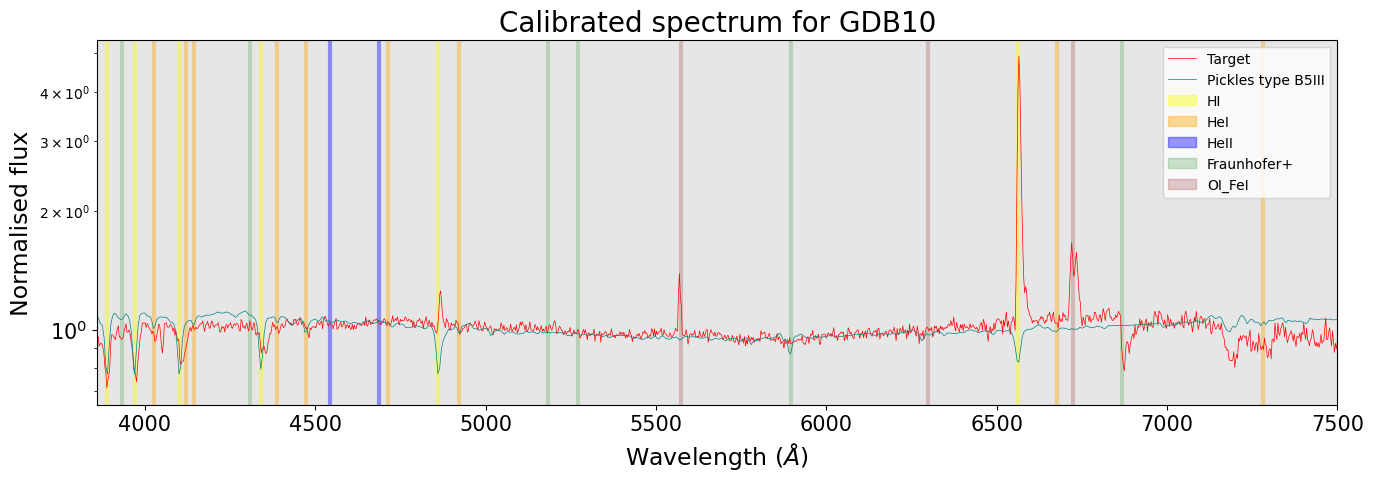

10
ZZ_GDB13.fits
Spectrum1D (length=1300)
flux:             [ 308.26 erg / (Angstrom cm2 s2), ..., 324.3 erg / (Angstrom cm2 s2) ],  mean=760.94 erg / (Angstrom cm2 s2)
spectral axis:    [ 3852.7 Angstrom, ..., 7512.8 Angstrom ],  mean=5682.7 Angstrom
s1_cal: [8.7266541e-09 8.7796437e-09 8.7532532e-09 ... 8.8333074e-10 8.8051538e-10
 8.7164242e-10] erg / (Angstrom cm2 s2)


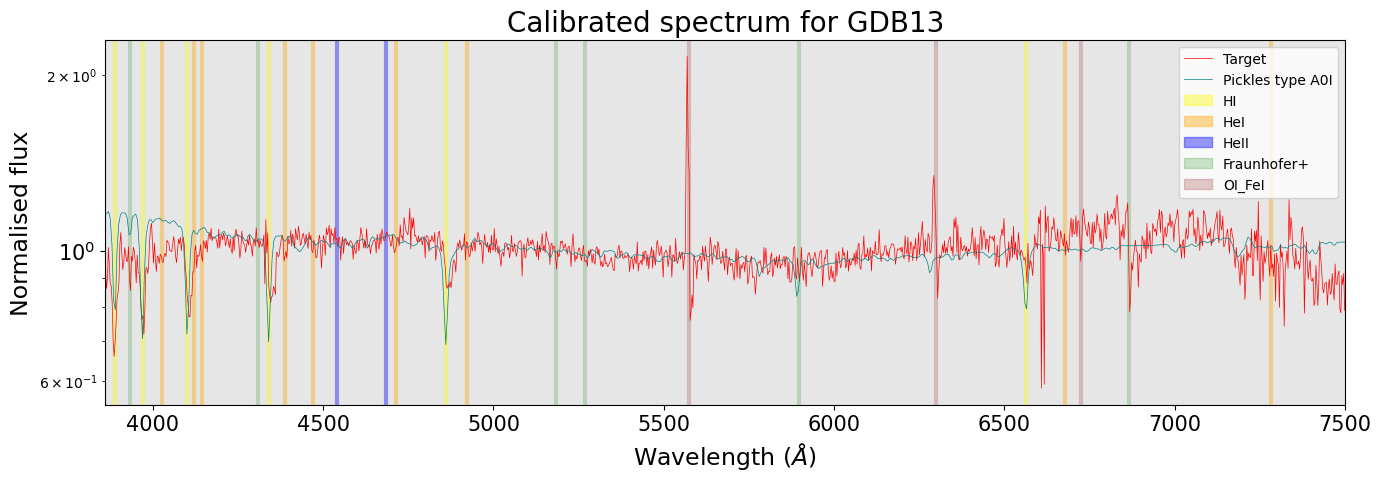

11
ZZ_GDB14.fits
Spectrum1D (length=1300)
flux:             [ 103.52 erg / (Angstrom cm2 s2), ..., 237.66 erg / (Angstrom cm2 s2) ],  mean=894.16 erg / (Angstrom cm2 s2)
spectral axis:    [ 3841.3 Angstrom, ..., 7512.5 Angstrom ],  mean=5676.9 Angstrom


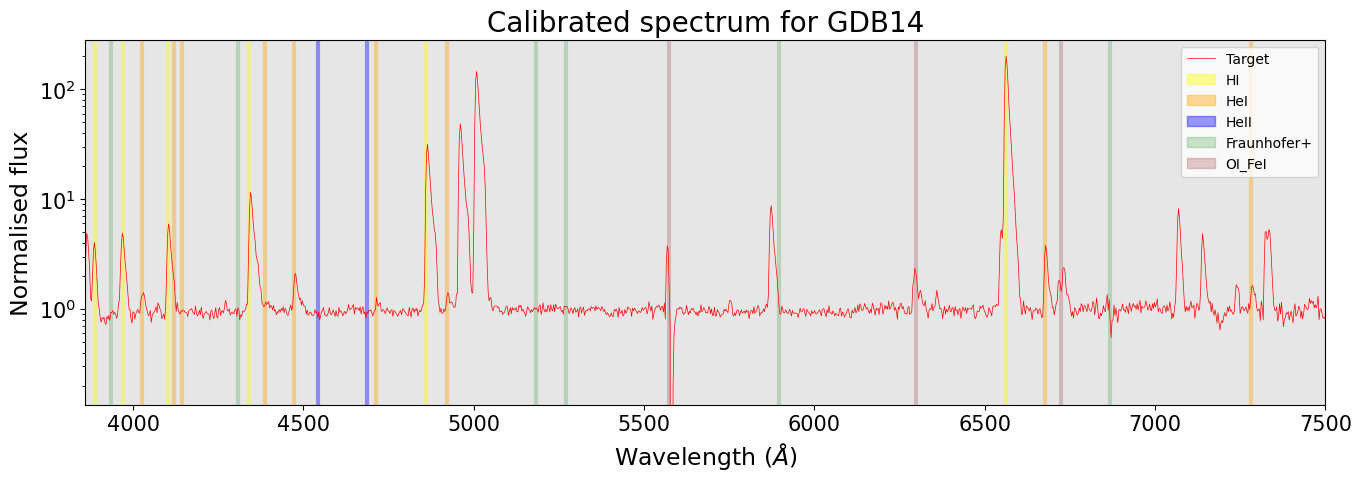

12
ZZ_GDB21.fits
Spectrum1D (length=1300)
flux:             [ 138.53 erg / (Angstrom cm2 s2), ..., 168.49 erg / (Angstrom cm2 s2) ],  mean=331.92 erg / (Angstrom cm2 s2)
spectral axis:    [ 3848.4 Angstrom, ..., 7507.0 Angstrom ],  mean=5677.7 Angstrom
s1_cal: [1.0612915e-08 1.0621923e-08 1.0580438e-08 ... 6.2490108e-10 6.0224209e-10
 5.8621269e-10] erg / (Angstrom cm2 s2)


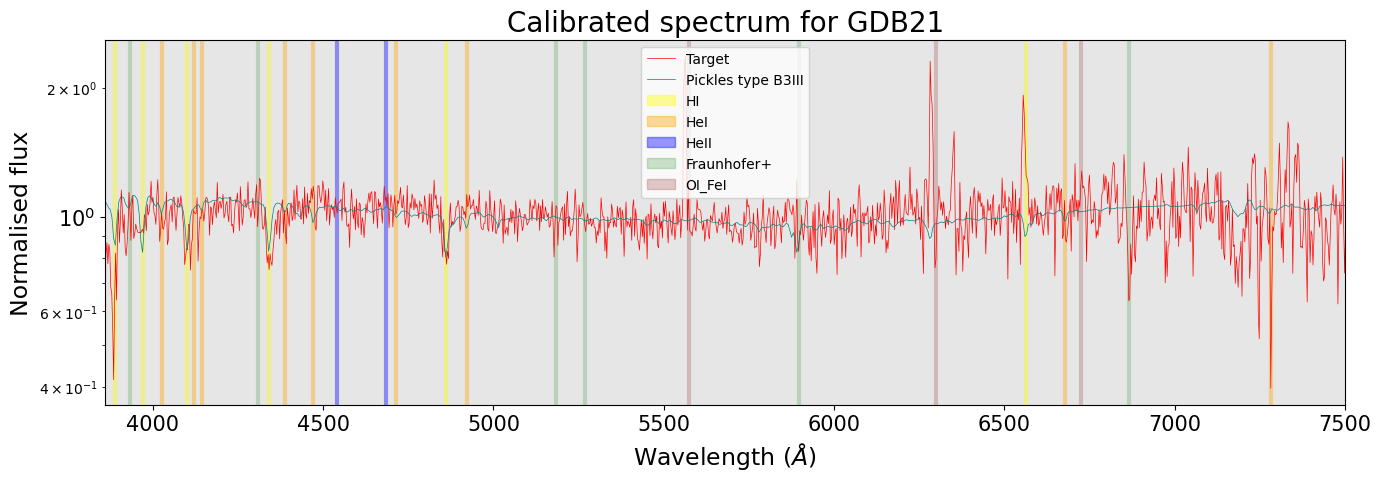

13
ZZ_GDB23.fits
Spectrum1D (length=1300)
flux:             [ 98.088 erg / (Angstrom cm2 s2), ..., 142.09 erg / (Angstrom cm2 s2) ],  mean=282.85 erg / (Angstrom cm2 s2)
spectral axis:    [ 3847.1 Angstrom, ..., 7507.9 Angstrom ],  mean=5677.5 Angstrom
s1_cal: [1.0132342e-08 1.0520693e-08 1.0738688e-08 ... 6.8860923e-10 6.7613642e-10
 6.6542249e-10] erg / (Angstrom cm2 s2)


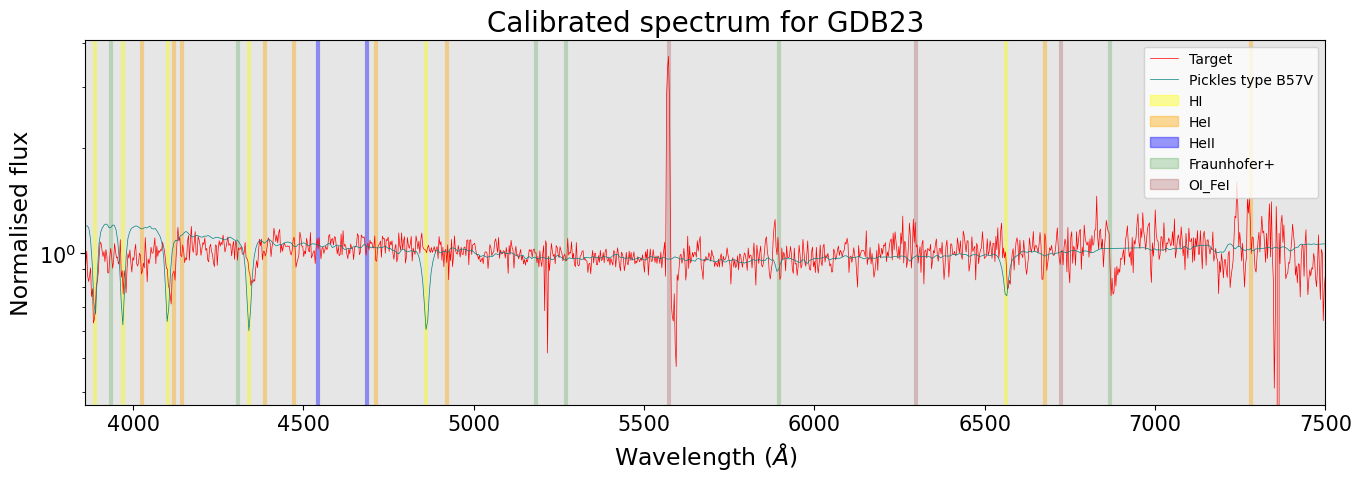

14
ZZ_GDB25.fits
Spectrum1D (length=1300)
flux:             [ 19.189 erg / (Angstrom cm2 s2), ..., 220.27 erg / (Angstrom cm2 s2) ],  mean=252.92 erg / (Angstrom cm2 s2)
spectral axis:    [ 3842.0 Angstrom, ..., 7507.5 Angstrom ],  mean=5674.8 Angstrom


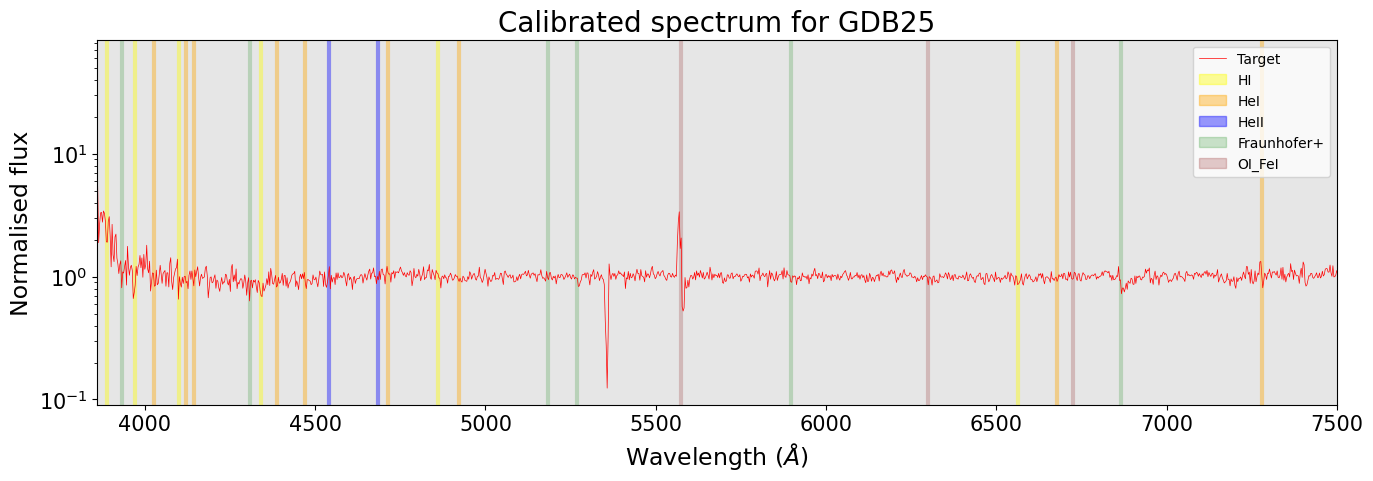

15
ZZ_GDB27.fits
Spectrum1D (length=1300)
flux:             [ 44.023 erg / (Angstrom cm2 s2), ..., 93.343 erg / (Angstrom cm2 s2) ],  mean=181.16 erg / (Angstrom cm2 s2)
spectral axis:    [ 3844.6 Angstrom, ..., 7508.6 Angstrom ],  mean=5676.6 Angstrom
s1_cal: [4.5661213e-09 4.7966240e-09 4.9462230e-09 ... 1.2614000e-09 1.2605444e-09
 1.2285766e-09] erg / (Angstrom cm2 s2)


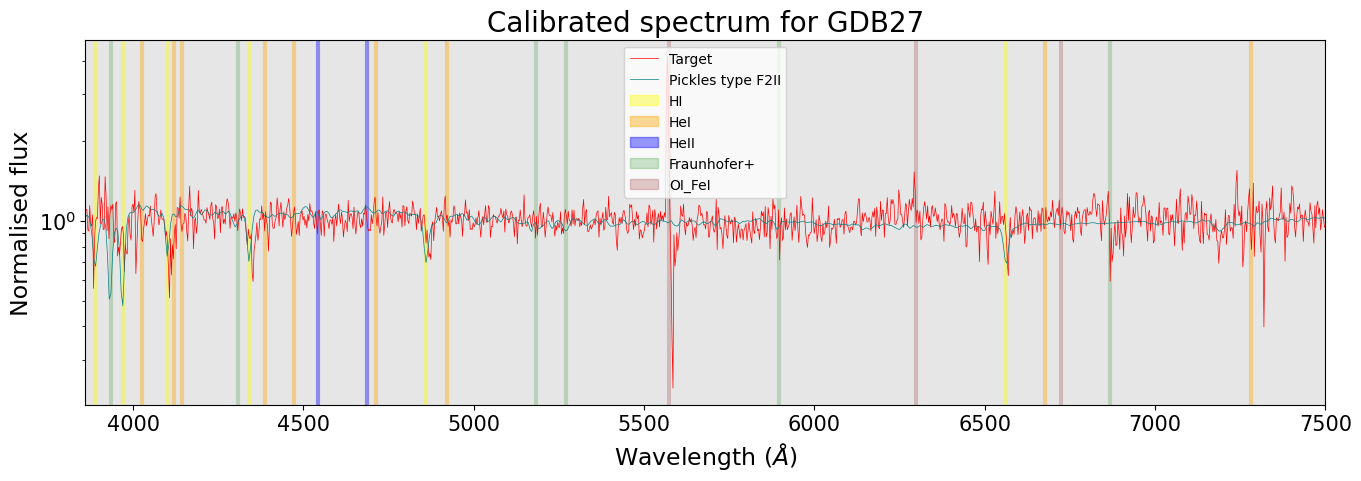

16
ZZ_GDB30.fits
Spectrum1D (length=1300)
flux:             [ 136.49 erg / (Angstrom cm2 s2), ..., 230.51 erg / (Angstrom cm2 s2) ],  mean=419.58 erg / (Angstrom cm2 s2)
spectral axis:    [ 3841.7 Angstrom, ..., 7508.5 Angstrom ],  mean=5675.1 Angstrom
s1_cal: [6.7925257e-09 7.2395094e-09 7.5022815e-09 ... 8.9034613e-10 8.8850832e-10
 8.6279106e-10] erg / (Angstrom cm2 s2)


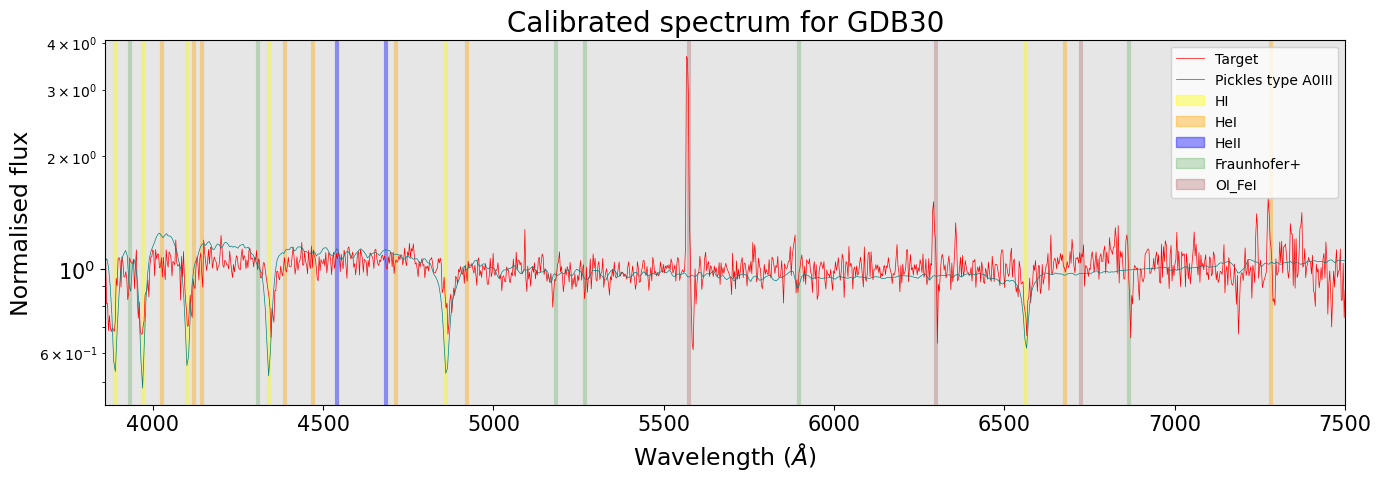

17
ZZ_GDB32.fits
Spectrum1D (length=1300)
flux:             [ 11.41 erg / (Angstrom cm2 s2), ..., 239.3 erg / (Angstrom cm2 s2) ],  mean=212.62 erg / (Angstrom cm2 s2)
spectral axis:    [ 3841.7 Angstrom, ..., 7508.6 Angstrom ],  mean=5675.1 Angstrom
s1_cal: [4.7177673e-10 4.6773646e-10 4.6010298e-10 ... 2.4247804e-09 2.3661788e-09
 2.3242912e-09] erg / (Angstrom cm2 s2)


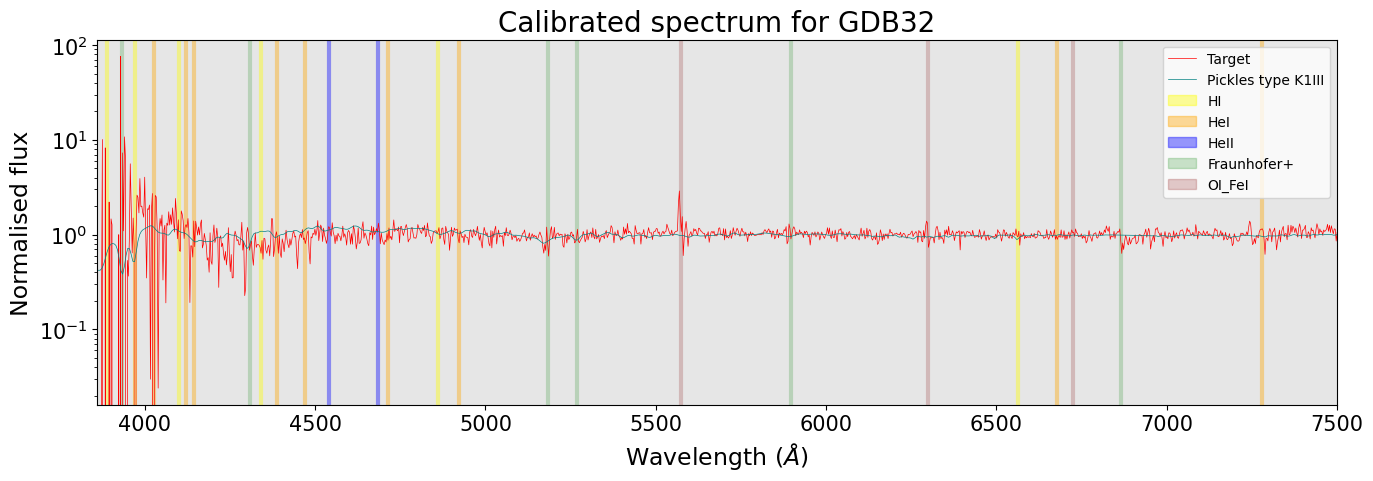

18
ZZ_GDB34.fits
Spectrum1D (length=1300)
flux:             [ 60.216 erg / (Angstrom cm2 s2), ..., 68.962 erg / (Angstrom cm2 s2) ],  mean=176.86 erg / (Angstrom cm2 s2)
spectral axis:    [ 3841.7 Angstrom, ..., 7504.6 Angstrom ],  mean=5673.1 Angstrom
s1_cal: [9.038777e-09 8.923977e-09 8.770770e-09 ... 8.427277e-10 8.235217e-10
 7.991252e-10] erg / (Angstrom cm2 s2)


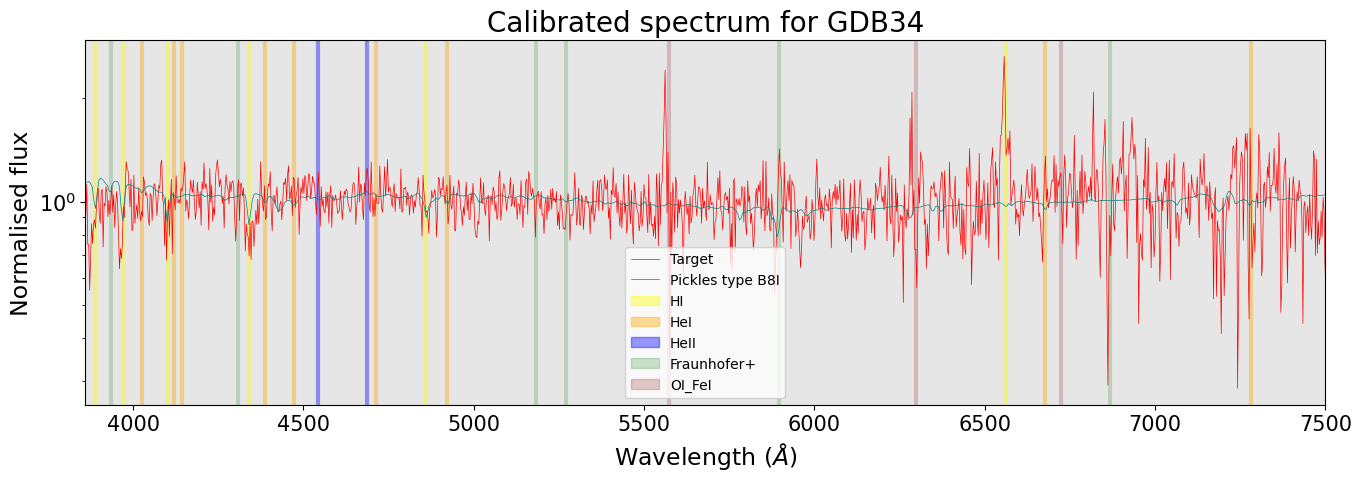

19
ZZ_GDB37.fits
Spectrum1D (length=1300)
flux:             [ 14.974 erg / (Angstrom cm2 s2), ..., 150.15 erg / (Angstrom cm2 s2) ],  mean=140.24 erg / (Angstrom cm2 s2)
spectral axis:    [ 3851.2 Angstrom, ..., 7515.7 Angstrom ],  mean=5683.5 Angstrom


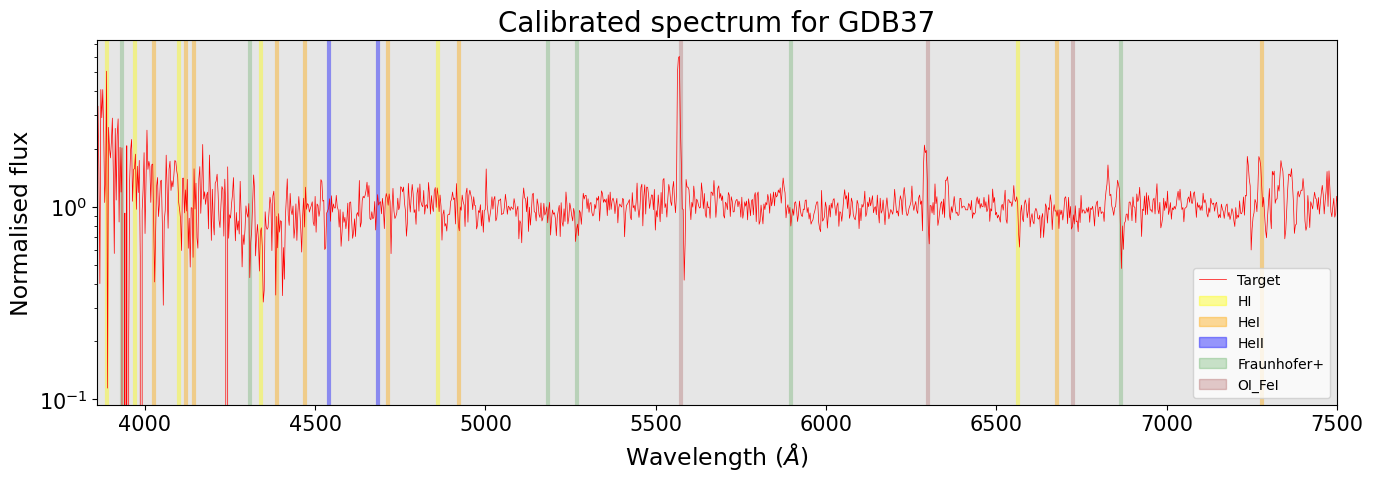

20
ZZ_GDB38.fits
Spectrum1D (length=1300)
flux:             [ 353.14 erg / (Angstrom cm2 s2), ..., 433.17 erg / (Angstrom cm2 s2) ],  mean=519.68 erg / (Angstrom cm2 s2)
spectral axis:    [ 3836.3 Angstrom, ..., 7511.7 Angstrom ],  mean=5674.0 Angstrom


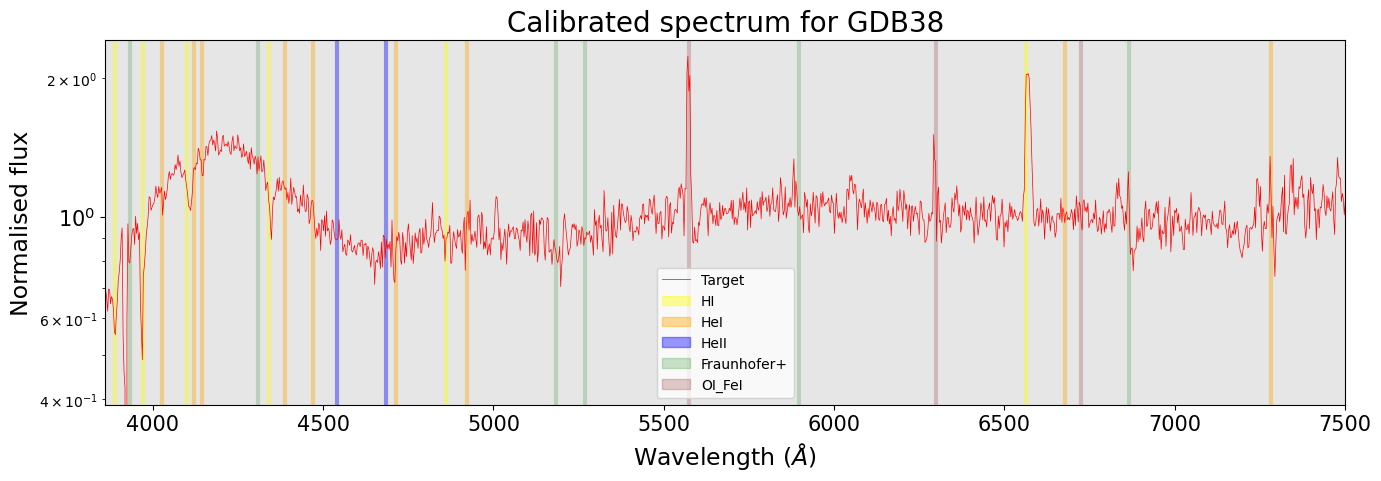

21
ZZ_GDB40.fits
Spectrum1D (length=1300)
flux:             [ 29.652 erg / (Angstrom cm2 s2), ..., 52.517 erg / (Angstrom cm2 s2) ],  mean=74.95 erg / (Angstrom cm2 s2)
spectral axis:    [ 3836.6 Angstrom, ..., 7507.9 Angstrom ],  mean=5672.3 Angstrom


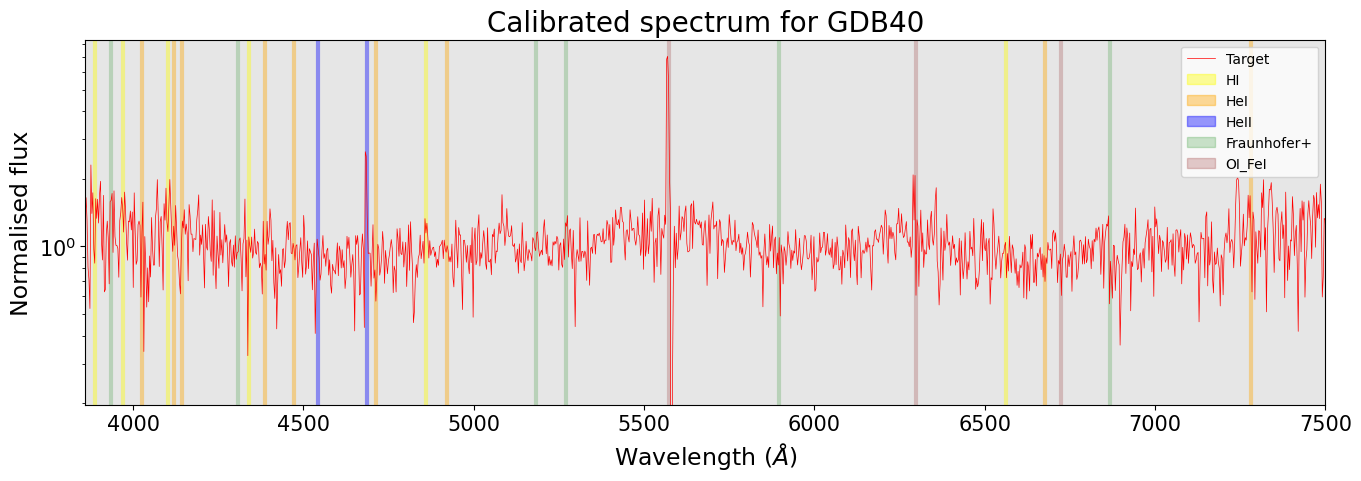

22
ZZ_GDB41.fits
Spectrum1D (length=1300)
flux:             [ 85.847 erg / (Angstrom cm2 s2), ..., 457.72 erg / (Angstrom cm2 s2) ],  mean=571.78 erg / (Angstrom cm2 s2)
spectral axis:    [ 3829.7 Angstrom, ..., 7507.9 Angstrom ],  mean=5668.8 Angstrom
s1_cal: [3.0079350e-09 3.0290874e-09 3.0268179e-09 ... 1.5723689e-09 1.5428010e-09
 1.5282180e-09] erg / (Angstrom cm2 s2)


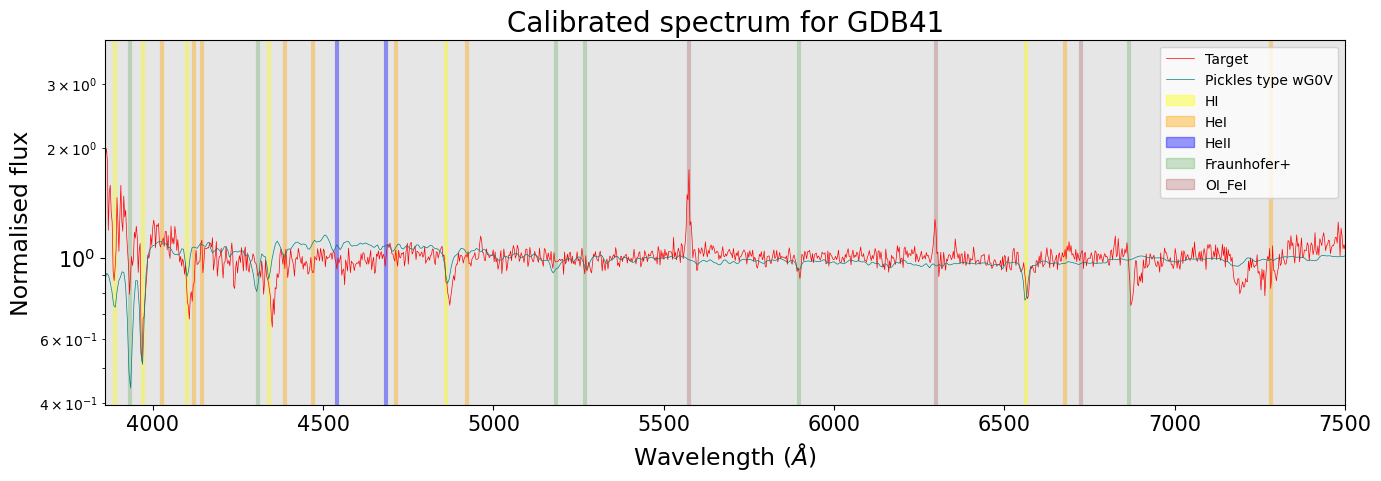

23
ZZ_LTT1020_21112023.fits
Spectrum1D (length=1300)
flux:             [ 1517.7 erg / (Angstrom cm2 s2), ..., 8593.9 erg / (Angstrom cm2 s2) ],  mean=1.0514e+04 erg / (Angstrom cm2 s2)
spectral axis:    [ 3854.7 Angstrom, ..., 7505.0 Angstrom ],  mean=5679.9 Angstrom
s1_cal: [2.2050519e-09 2.1211588e-09 2.0420077e-09 ... 1.7459250e-09 1.7308933e-09
 1.7262403e-09] erg / (Angstrom cm2 s2)


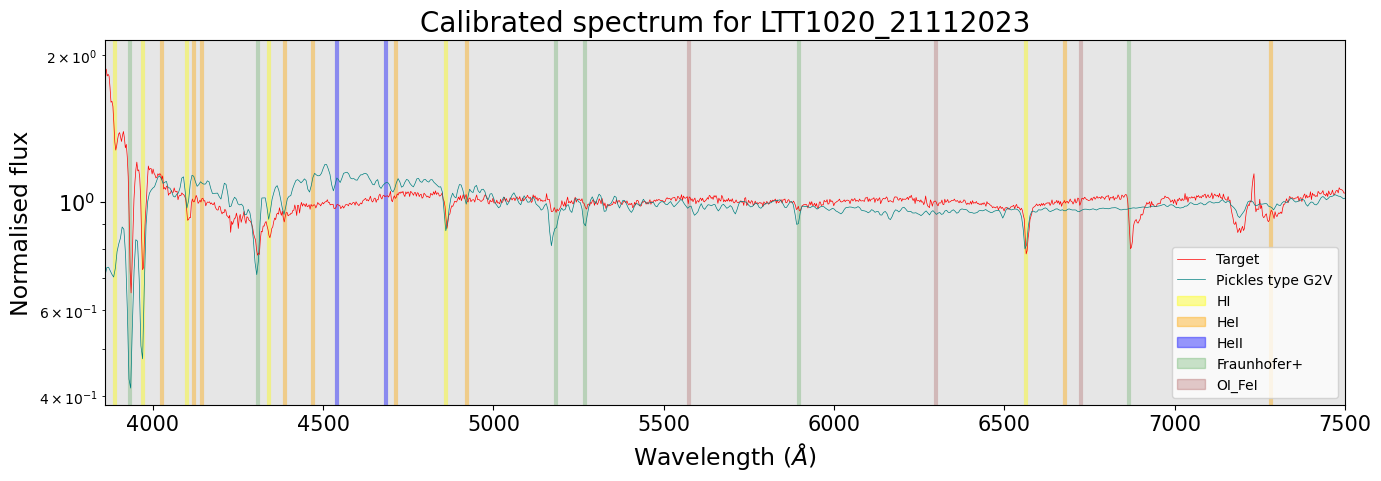

merges happened



In [138]:

#Get the pdf merger ready for later
merger = PdfMerger()
Merge_files=[]

# Load data from CSV for the line locations to identify HI, HeI and HeII with
f_lines=open("Be_line_list(copy).txt", "r")

Be_name= []
Be_line= []
Be_color= []
count=0
for line in f_lines:
    row_data = line.strip("\n").split(',')
    Be_name.append(row_data[0])
    Be_line.append(float(row_data[1]))
    Be_color.append(row_data[2])
f_lines.close()

# Load data from CSV for the Fraunhofer lines
f_lines=open("Be_Fraunhofer_line_list.txt", "r")

FH_name= []
FH_line= []
FH_color= []
count=0
for line in f_lines:
    row_data = line.strip("\n").split(',')
    FH_name.append(row_data[0])
    FH_line.append(float(row_data[1]))
    FH_color.append(row_data[2])
f_lines.close()

f = open("all.csv", "r")
f_c = open("My_cal_files.csv", "r")

# Instansiate lists for file names of unclaibrated (files) and calibrated (files_cali) files.
files=[]
files_cali=[]

# Read first line for files and populate list
line=f.readline()
while line!='':
    files.append(line[0:-1])
    line=f.readline()
f.close()

# Read first line for files_cali and populate list
line=f_c.readline()
Smooth_Fac=[]
pickles_Match=[]
pickles_Type=[]
label_Y=[]
while line!='':
    row_data = line.strip("\n").split(',')
    
    files_cali.append(row_data[0])
    Smooth_Fac.append(row_data[1])
    pickles_Match.append(row_data[2])
    pickles_Type.append(row_data[3])
    label_Y.append(row_data[4])
    line=f_c.readline()
f_c.close()

for i in range(0,len(files)):
    print(i)
    #get the spectrum data from fits file from list of fits files
    name=files[i]
    
    fig=plt.figure(figsize=(16, 5)) #create the figure

    ax = fig.add_subplot(1, 1, 1) #this is for background color formating
    ax.set_facecolor((0.90, 0.90, 0.90))
    
    plt.xlim(left=3860,right=7500) #Set x axis limits, max to 7500 if wish is to cut off section with no identifyable lines due to high noise
    plt.yticks(fontsize=15)
    plt.xticks(fontsize=15)
    
    #plot the lines for ID Hydrogen and Helium lines
    handles, labels = plt.gca().get_legend_handles_labels()
    
    for j in range(0,len(Be_line)):

        plt.axvline(x = Be_line[j], color = Be_color[j], linewidth=3, alpha=0.4)

    #plot the lines for ID Fraunhofer lines

    for j in range(0,len(FH_line)):

        plt.axvline(x = FH_line[j], color = FH_color[j], linewidth=3, alpha=0.2)

    #Plot the calibrated spectra
    My_Plot=Plot_Cont_Norm_MrKT(name)
    
    #Plot the pickles spectrum if matched to one:
    if(pickles_Match[i]!=''):
        Pickles_Plot=Plot_Cont_Norm_Pic(pickles_Match[i])
    
    handles, labels = plt.gca().get_legend_handles_labels()
    plt.xlabel('Wavelength ($\AA$)', fontsize=17)
    plt.ylabel('Continuum normalised flux', fontsize=17)
    

    HydrogenI_patch = mpatches.Patch(color='yellow',alpha=0.4, label='HI')
    HeliumI_patch = mpatches.Patch(color='orange',alpha=0.4, label='HeI')
    HeliumII_patch = mpatches.Patch(color='blue',alpha=0.4, label='HeII')
    Fraunhofer_patch = mpatches.Patch(color='green',alpha=0.2, label='Fraunhofer+')
    FeO_patch = mpatches.Patch(color='maroon',alpha=0.2, label='OI_FeI')
    
    handles.extend([HydrogenI_patch, HeliumI_patch, HeliumII_patch, Fraunhofer_patch, FeO_patch])
    labels.extend([HydrogenI_patch, HeliumI_patch, HeliumII_patch, Fraunhofer_patch, FeO_patch])

    plt.legend(handles=handles,loc='best')
    plt.subplots_adjust(bottom=0.15) #Because the plt.savefig crops the bottom for some reason.

    plt.yscale("log") #set y scale to log to correctly display the spectra

    plt.title("Calibrated spectrum for "+str(name[3:-5]), size=20)
    
    Merge_files.append("./spectra_pdfs/"+str(name[3:-5])+'.pdf')
    
    plt.savefig(r"./spectra_pdfs_TEST/"+str(name[3:-5])+'.pdf', dpi=1600, orientation='landscape')
    plt.show()
    plt.close()
    
#     break

# now merge all pdfs into one pdf for conveniece
for pdf in Merge_files:
    merger.append(pdf)
merger.write("./spectra_pdfs_TEST/"+'All_Spectra.pdf')
merger.close()
print("merges happened")
   
print()